# settings

In [1]:
import sys
sys.path.append('../../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
# %config InlineBackendfigure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
# from scripts.variable_local import AutoAdjustmentTransactionMulti
from scripts.exec_simulator import ExecuteAutoAdjustmentTransactionSingle, ExecuteAutoAdjustmentTransactionMulti
from scripts.price_data.get_price import GetPriceData
from scripts.visualizer import LogVisualizer
from scripts.types import PortfolioItem, PortfolioWithPriorityItem, TransactionOption

price_getter = GetPriceData()

from pprint import pprint

In [2]:
# Relative path to save data
from pathlib import Path

data_dir = Path('./data0322/')
data_dir.mkdir(parents=True, exist_ok=True)
data_relative_path = './data0322/'

In [3]:
def plt_all_price_diff(date_list, price_diff_lists, filename):
    _fig, ax1 = plt.subplots(figsize=(30, 15))
    color_list = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink'][:len(price_diff_lists.keys())]
    
    for i, item in enumerate(price_diff_lists.items()):
        if i == 0:
            ax1.plot(date_list, item[1], label=item[0], marker='o', markersize=6, linewidth=1.5, linestyle='dashed', color=color_list[i])
        else:
            ax1.plot(date_list, item[1], label=item[0], marker='o', markersize=6, linewidth=3, color=color_list[i])
    
    ax1.legend(prop={"size": 24, "family": "Hiragino Sans"})
    ax1.set_ylabel('実質差入担保価値と必要担保価値の価格差(円)', fontsize=28, fontname="Hiragino Sans")
    ax1.tick_params(labelsize=24)
    ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.xaxis.offsetText.set_fontsize(24)
    ax1.yaxis.offsetText.set_fontsize(24)
    plt.savefig(f'./data0322/{filename}_price_diff_all')

# Price Raw Data

In [45]:
start_date_0 = date(2008, 9, 1)
end_date_0 = date(2009, 9, 1)

In [49]:
price_getter.get_close_price_all('8306.T', start_date_0, end_date_0).to_csv(f'{data_relative_path}8306.csv', header=False)
price_getter.get_close_price_all('8604.T', start_date_0, end_date_0).to_csv(f'{data_relative_path}8604.csv', header=False)
price_getter.get_close_price_all('4901.T', start_date_0, end_date_0).to_csv(f'{data_relative_path}4901.csv', header=False)
price_getter.get_close_price_all('7013.T', start_date_0, end_date_0).to_csv(f'{data_relative_path}7013.csv',　header=False)
price_getter.get_close_price_all('8031.T', start_date_0, end_date_0).to_csv(f'{data_relative_path}8031.csv', header=False)


SyntaxError: invalid non-printable character U+3000 (2774860491.py, line 4)

In [55]:
price_getter.get_close_price_all('7013.T', start_date_0, end_date_0).to_csv(f'{data_relative_path}7013.csv', header=False)

In [7]:
price_getter.get_close_price('8306.T', date(2008, 10, 11))

810.0

# Visualization

## 概観

### リーマンショック前後

Log Visualizer initialized.


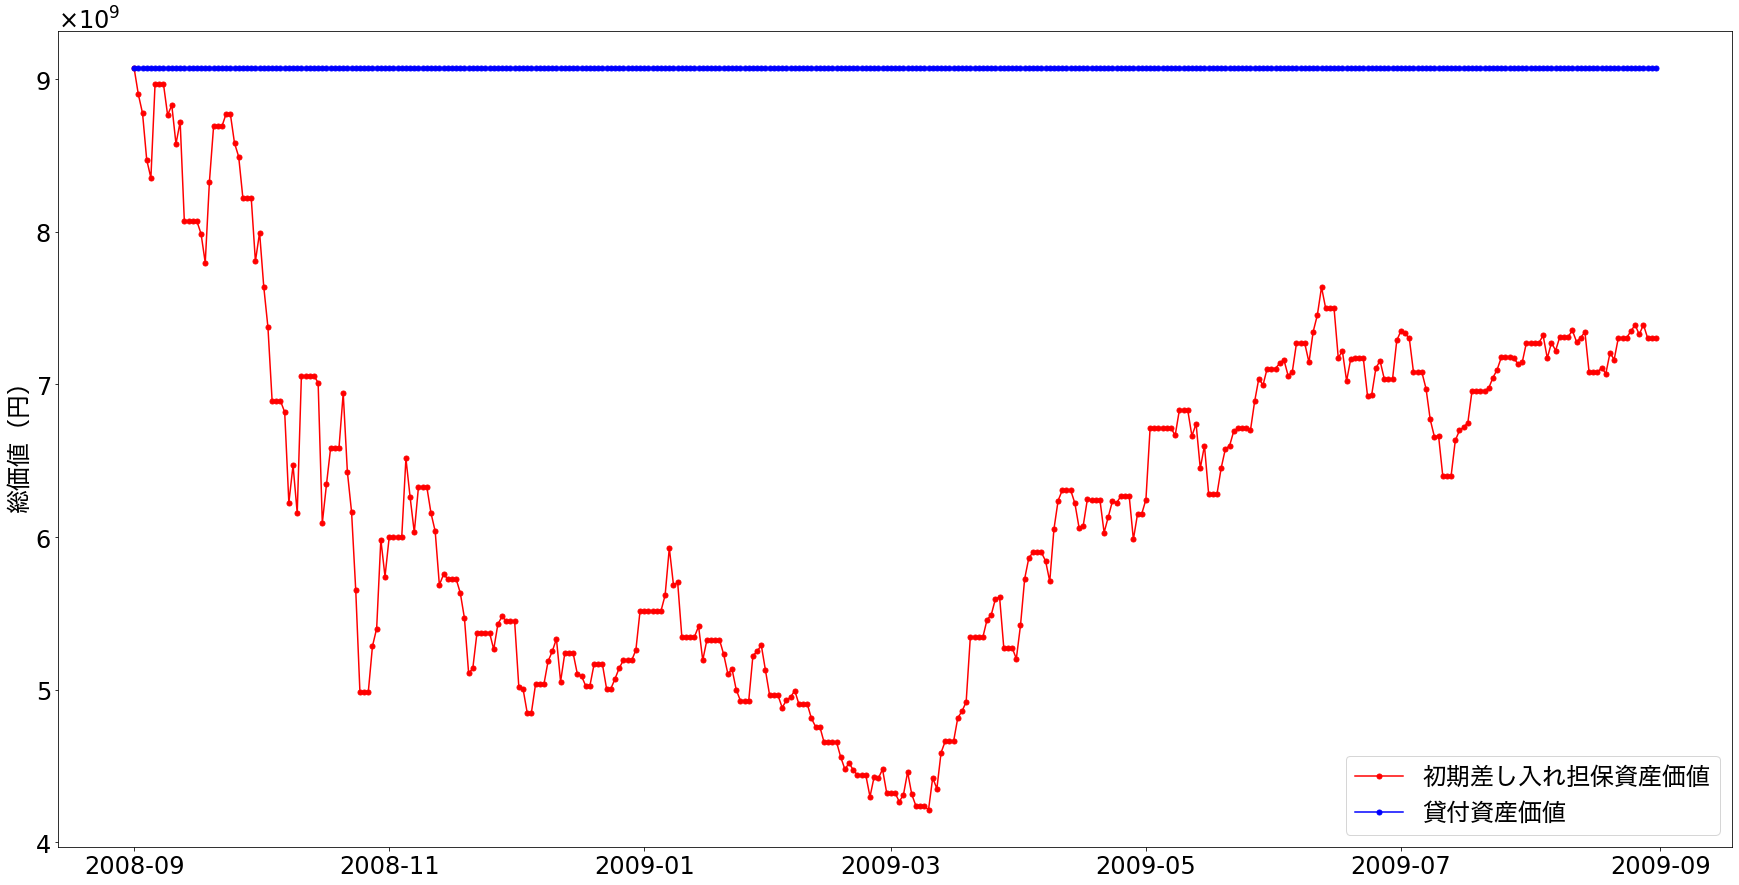

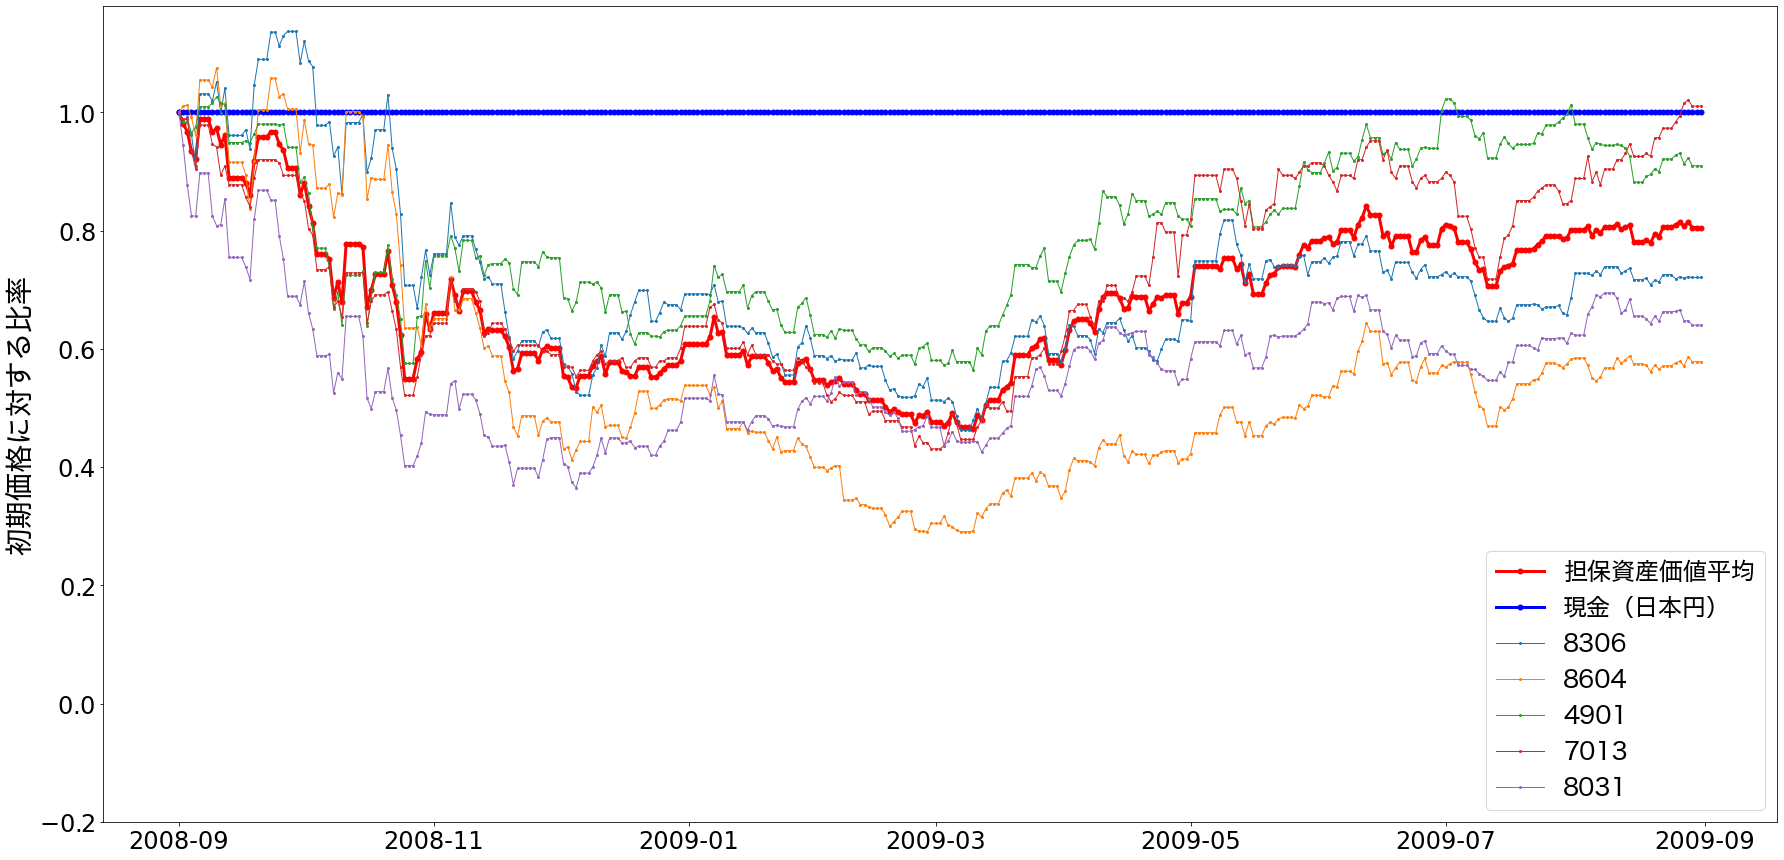

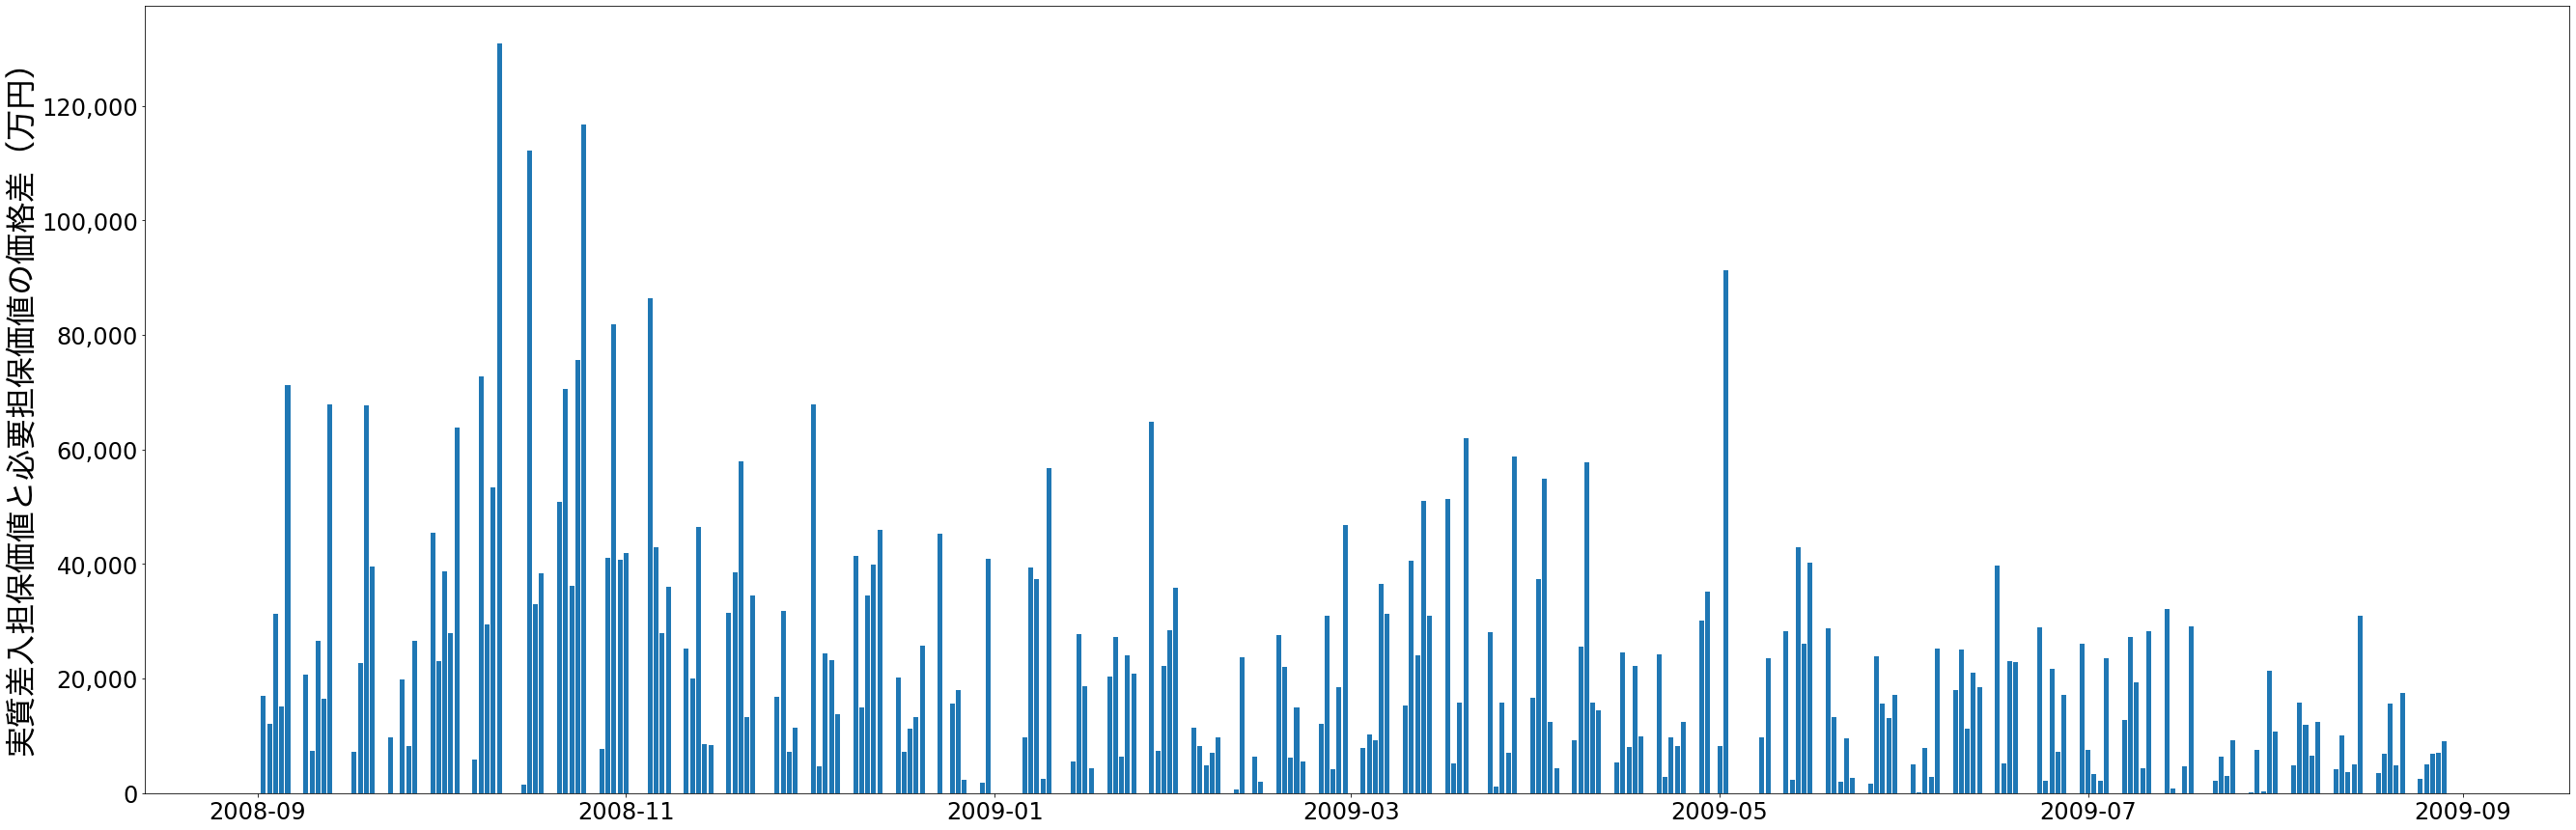

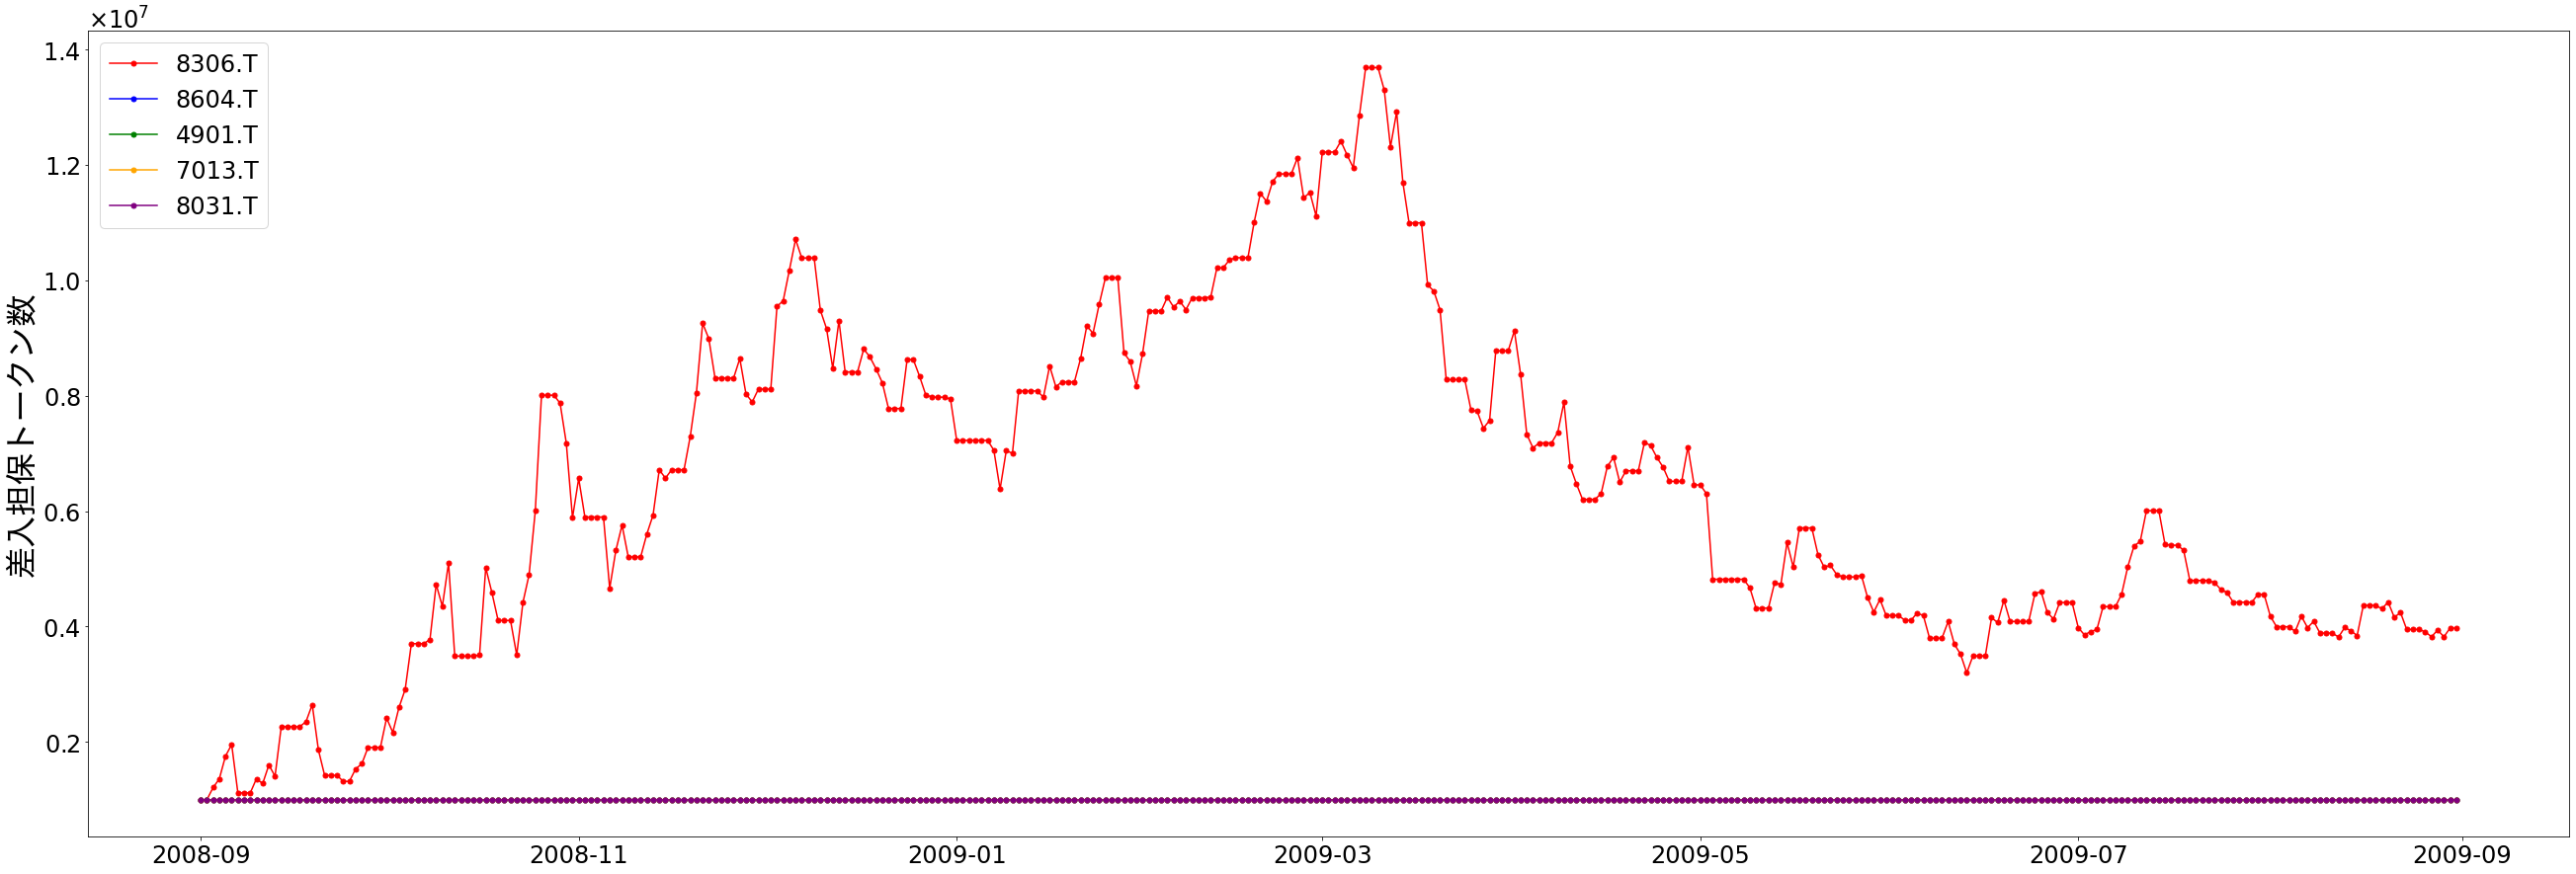

In [4]:
saved_logs_0 = np.load('./data0322/all_term.npy', allow_pickle=True).item()
visualizer_0 = LogVisualizer(saved_logs_0)
visualizer_0.compare_initial_collateral_portfolio()
visualizer_0.compare_initial_collateral_portfolio_ratio()
visualizer_0.bar_collateral_price_diff()
visualizer_0.plt_collateral_num(ymin=0, ymax=7.0e+6, show_additional_issue=False)
result_0 = visualizer_0.calc_price_diff_result()
# result_0

In [5]:
min([log['8604.T']['price'] for log in saved_logs_0['collateral_portfolio']]) / [log['8604.T']['price'] for log in saved_logs_0['collateral_portfolio']][0]


0.29093464511595224

### シナリオ1: 平常時

#### model1-1

Log Visualizer initialized.


(92071394.68852459, 600706400.0)

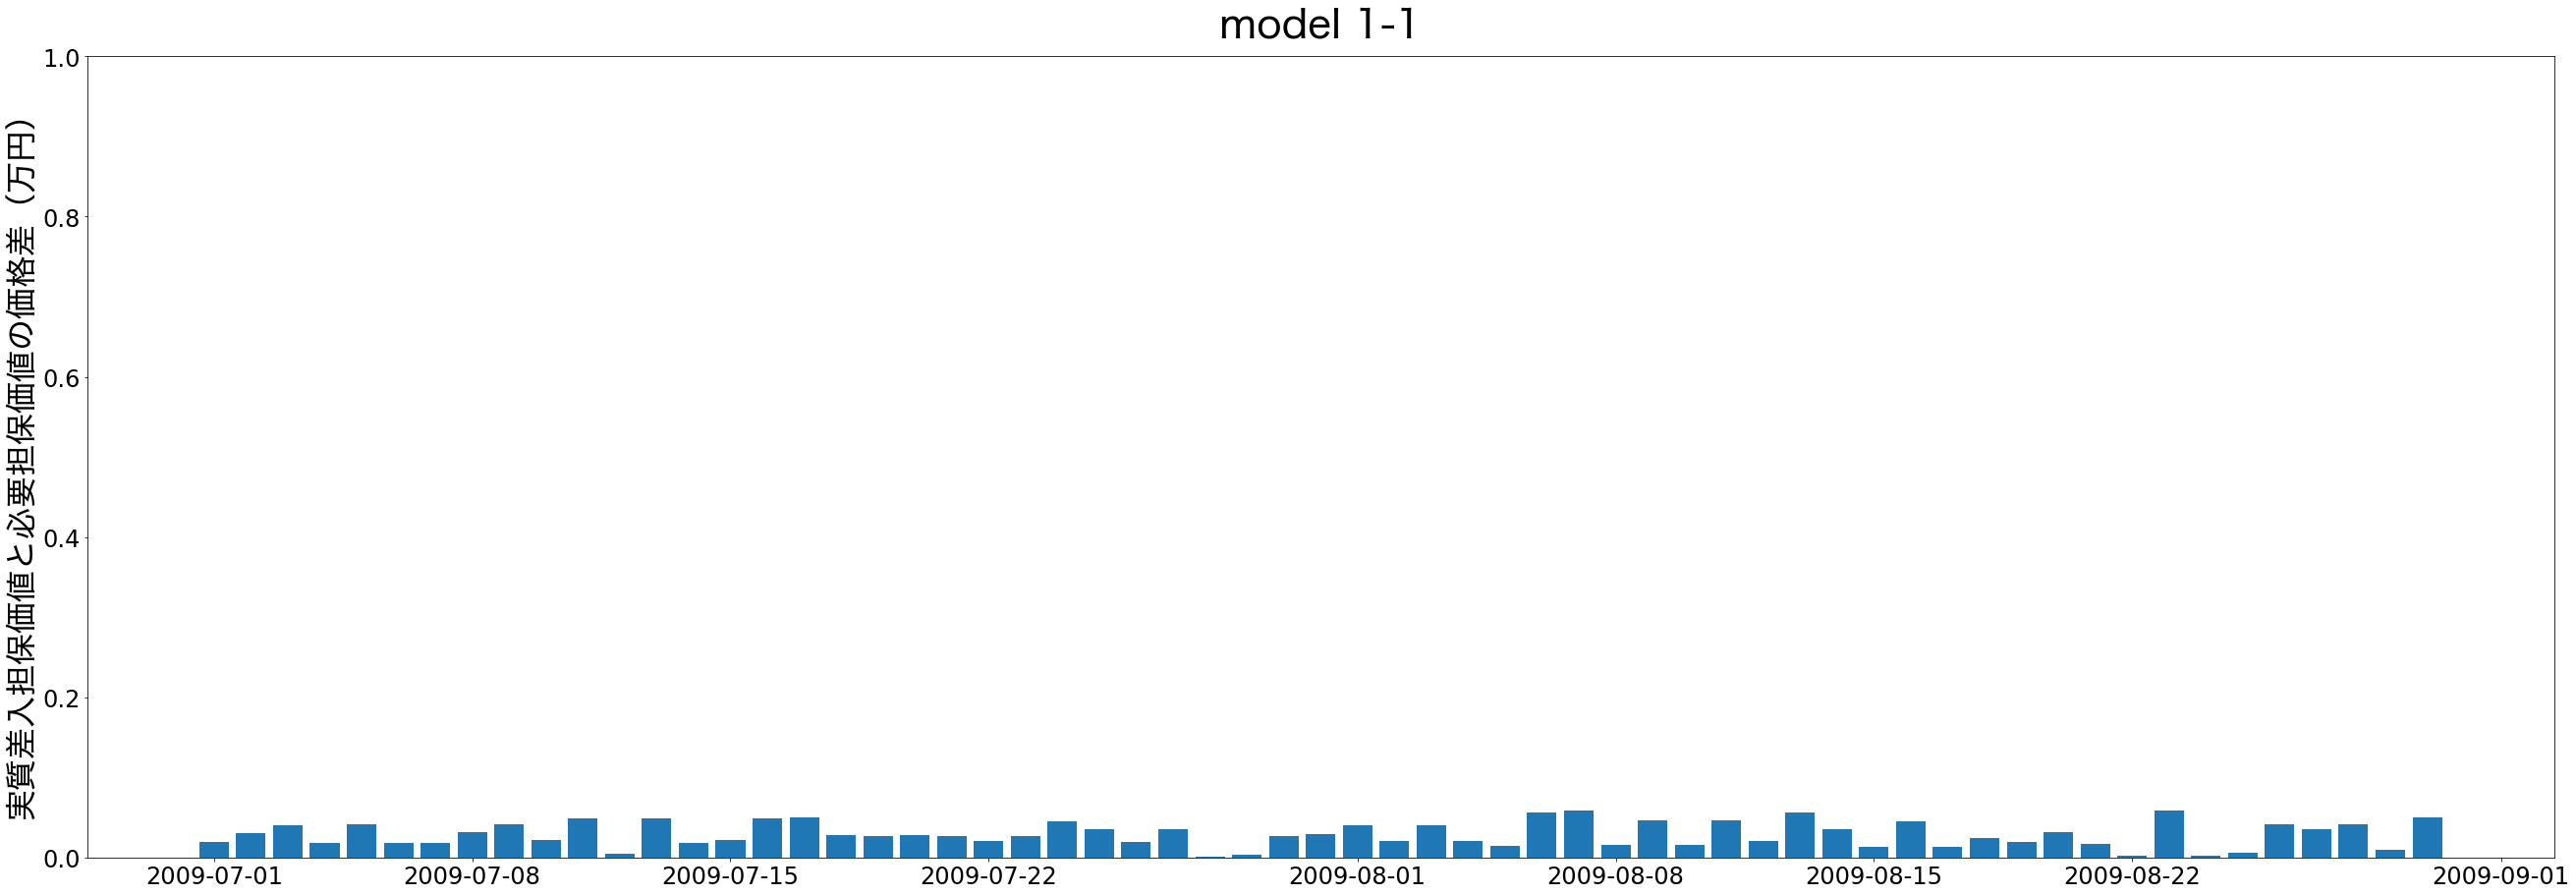

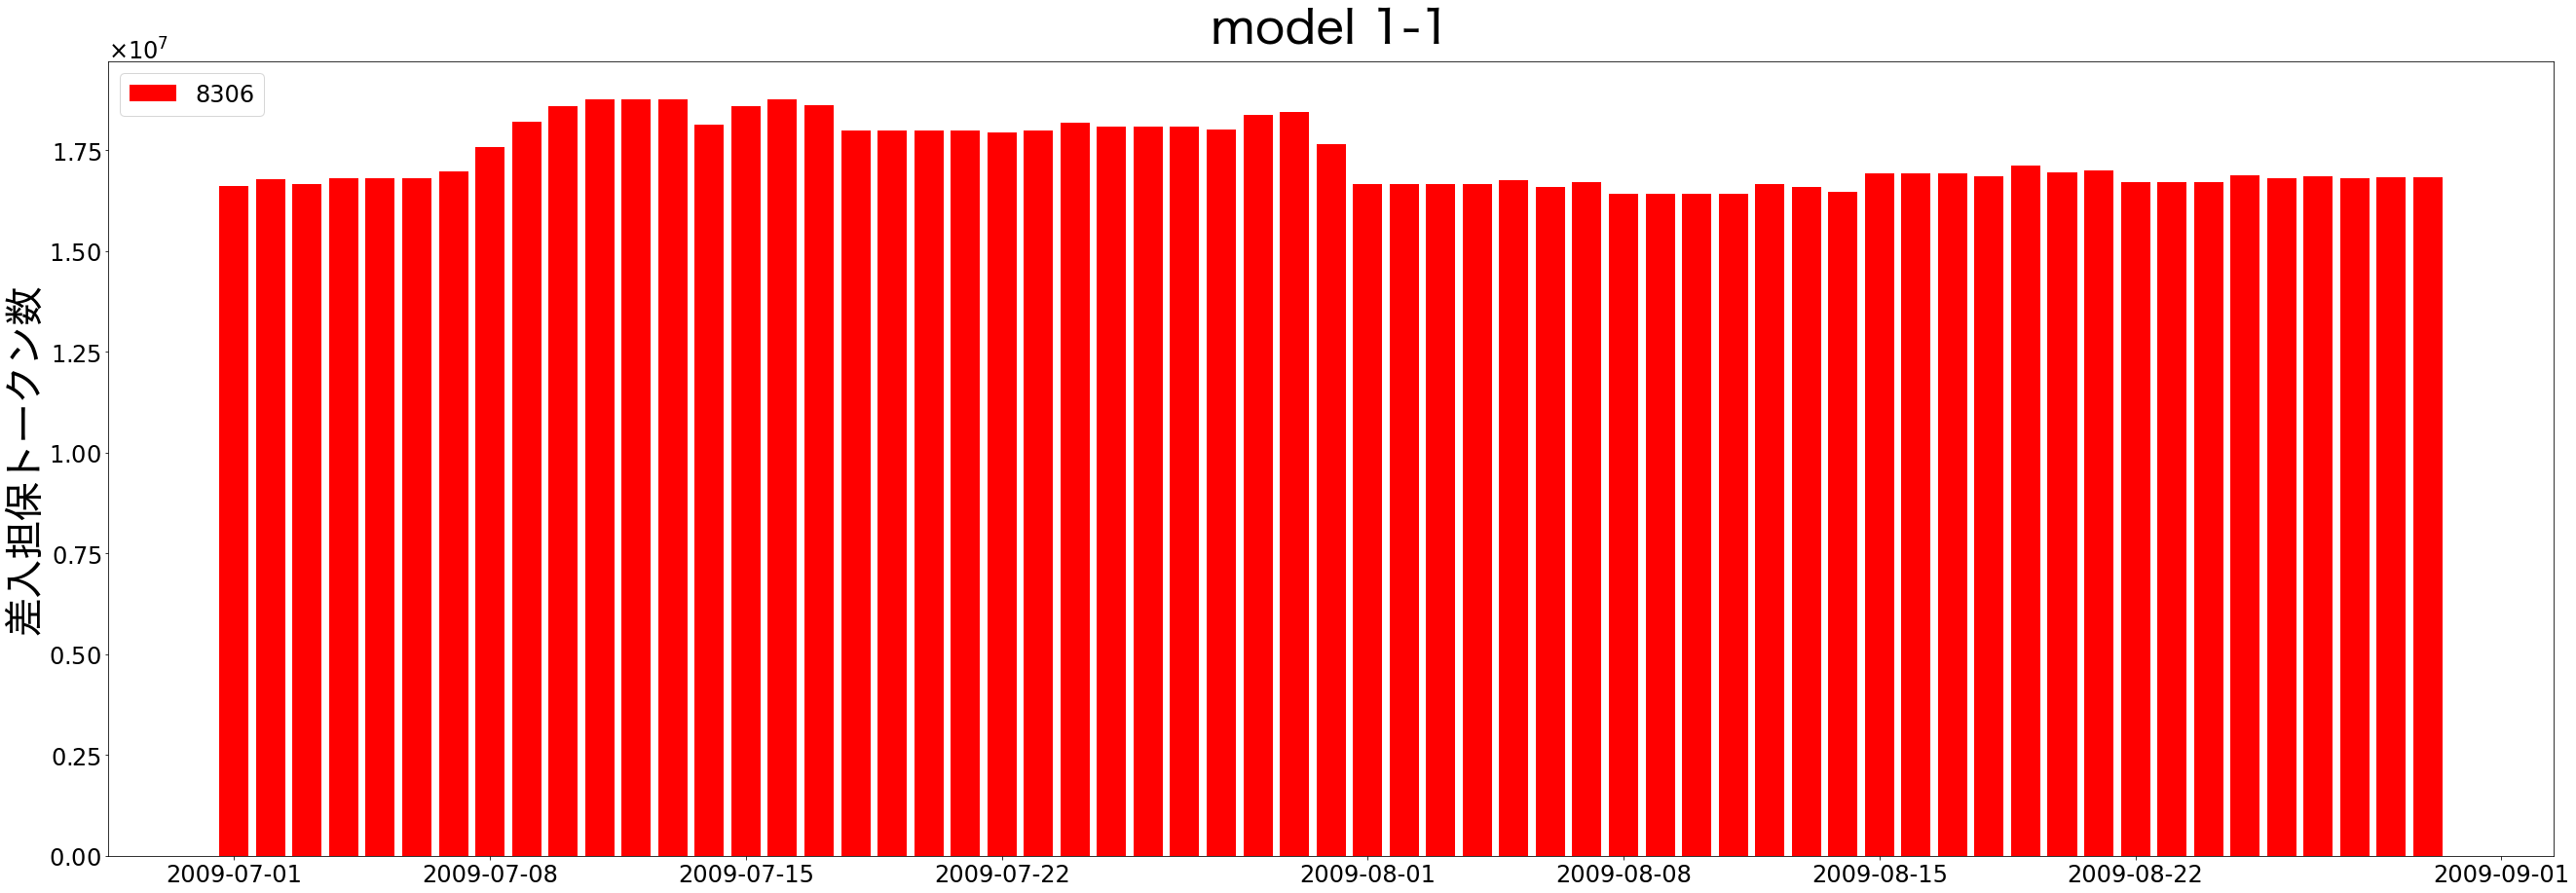

In [4]:
saved_logs_s1_m1_1 = np.load('./data0322/s1_m1_1.npy', allow_pickle=True).item()
visualizer_s1_m1_1 = LogVisualizer(saved_logs_s1_m1_1)
visualizer_s1_m1_1.bar_collateral_price_diff(1, title='model 1-1', is_decimal=True)
visualizer_s1_m1_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-1')
result_s1_m1_1 = visualizer_s1_m1_1.calc_price_diff_result()
diff_result_s1_m１_1 = visualizer_s1_m1_1.calc_token_diff()
diff_result_s1_m1_1
visualizer_s1_m1_1.calc_portfolio_credit_diff()

# saved_logs_s1_m1_1['lender_additional_issue'].count(True)
# saved_logs_s1_m1_1['has_done_margincall'].count(True)

#### model1-2

Log Visualizer initialized.


(113399818.04918033, 600706400.0)

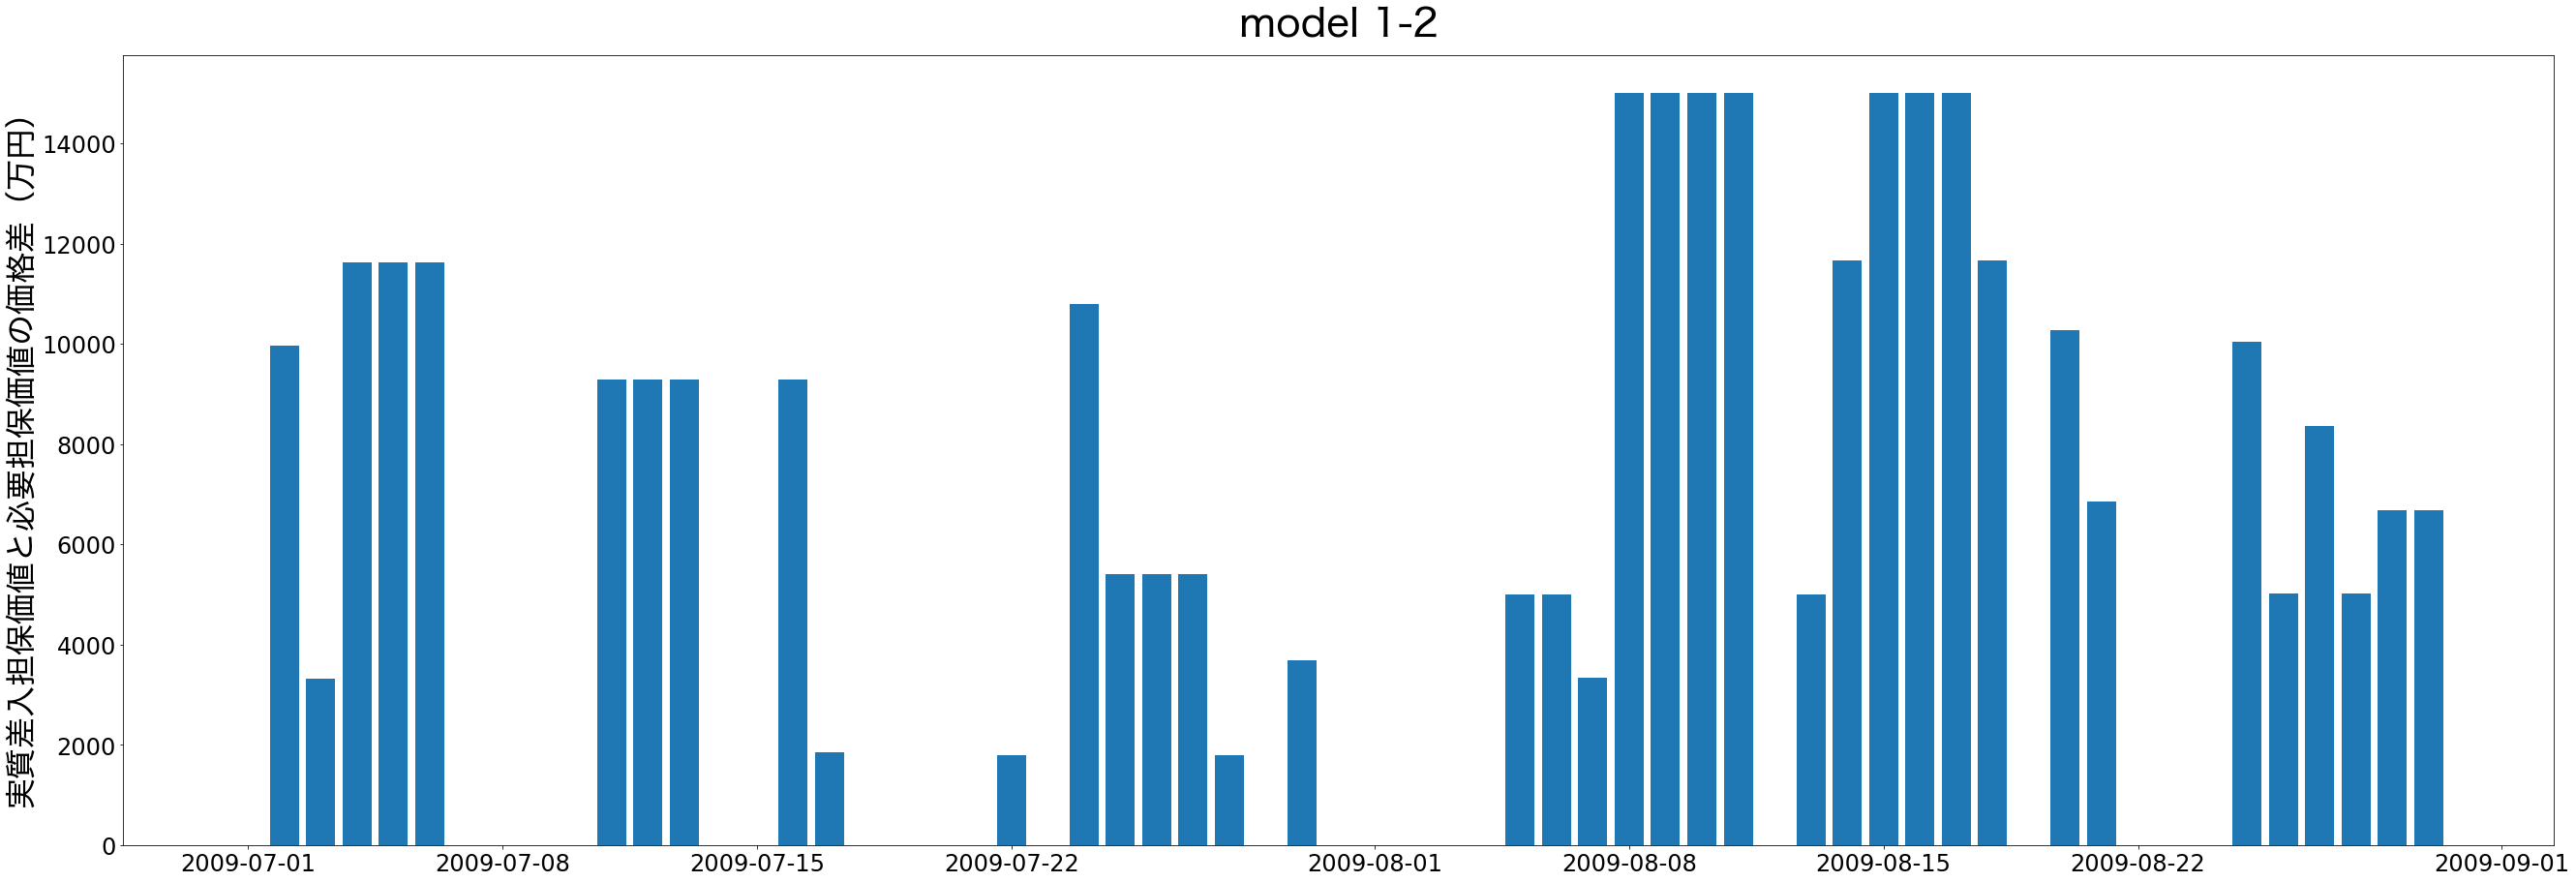

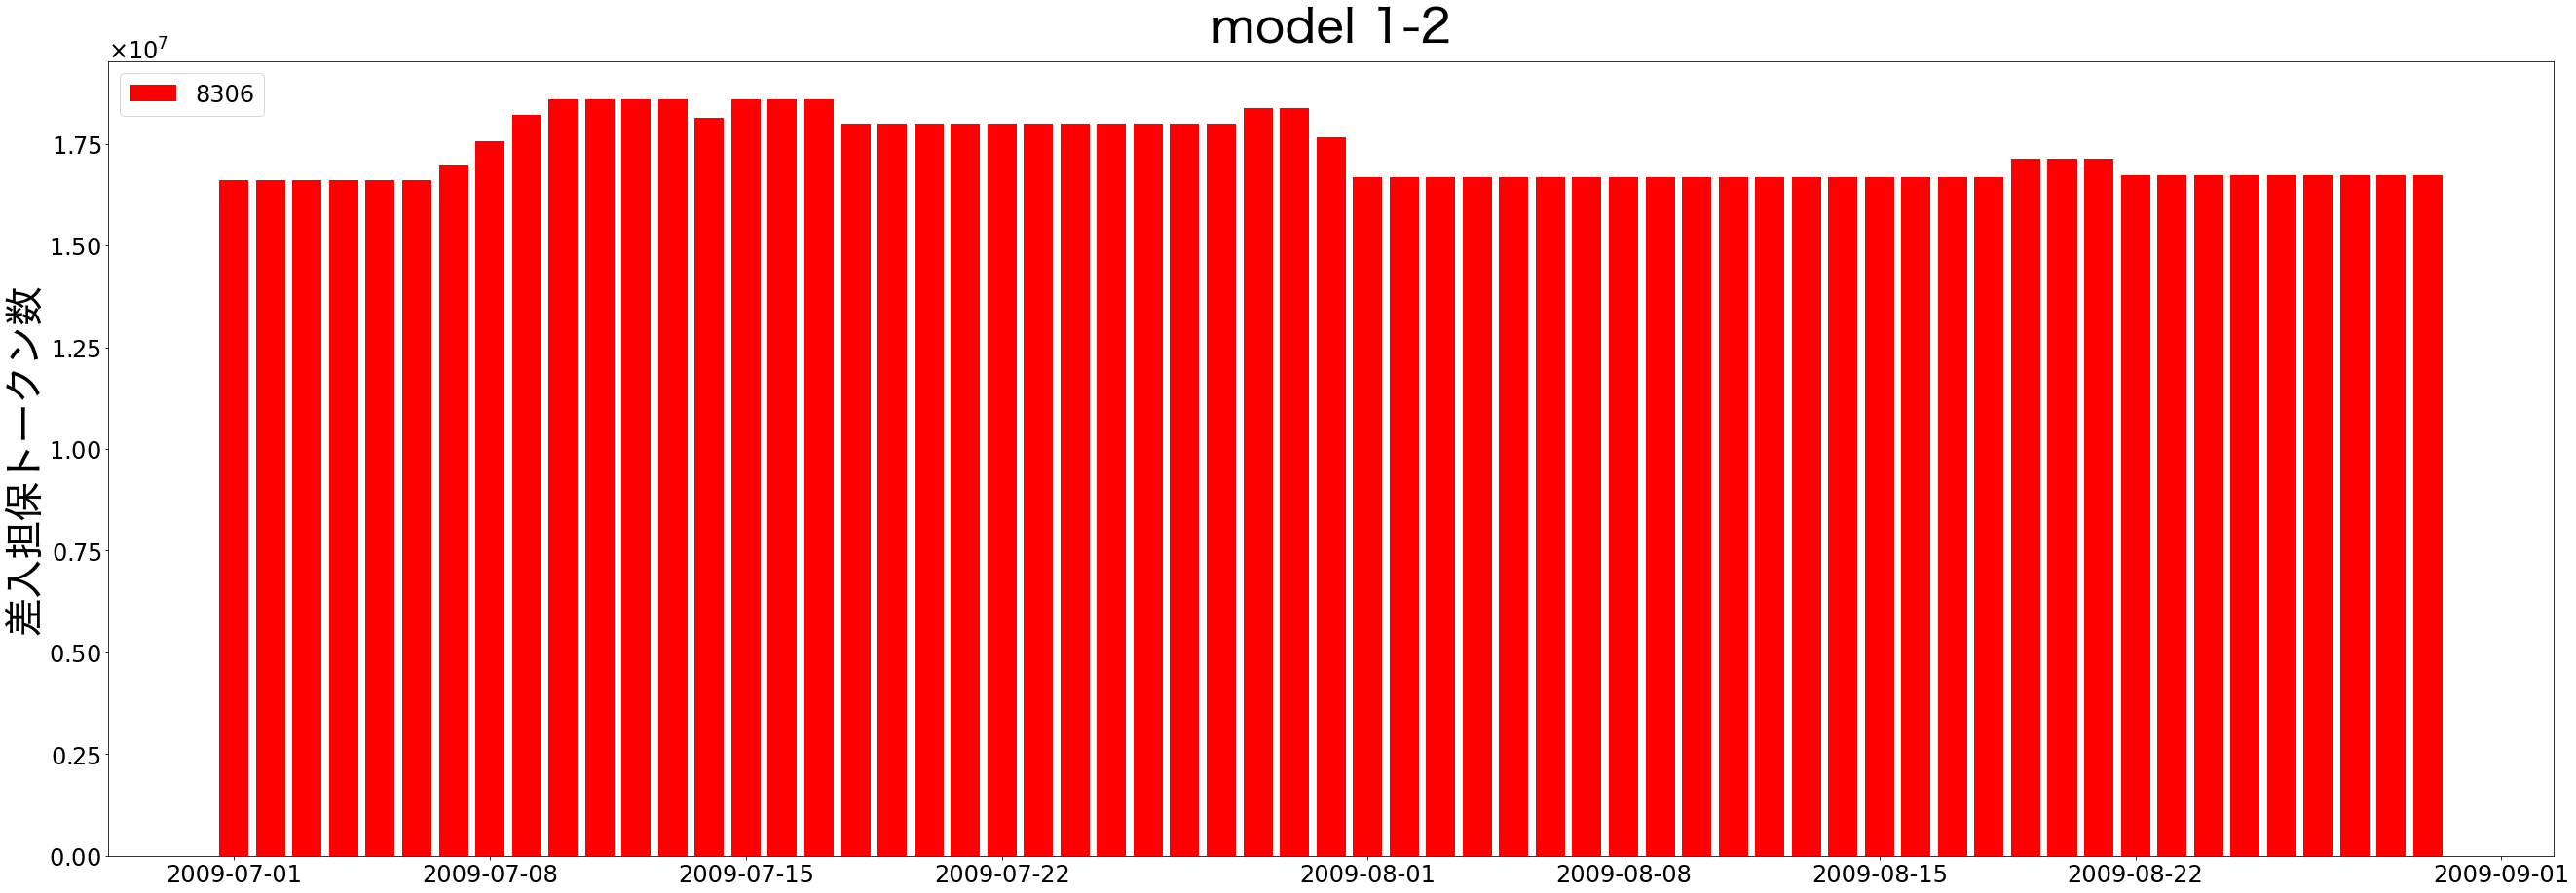

In [7]:
saved_logs_s1_m1_2 = np.load('./data0322/s1_m1_2.npy', allow_pickle=True).item()
visualizer_s1_m1_2 = LogVisualizer(saved_logs_s1_m1_2)
visualizer_s1_m1_2.bar_collateral_price_diff(title='model 1-2', is_decimal=True)
visualizer_s1_m1_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-2')
result_s1_m1_2 = visualizer_s1_m1_2.calc_price_diff_result()
diff_result_s1_m１_2 = visualizer_s1_m1_2.calc_token_diff()
diff_result_s1_m1_2
visualizer_s1_m1_2.calc_portfolio_credit_diff()

# saved_logs_s1_m1_2['lender_additional_issue'].count(True)
# saved_logs_s1_m1_2['has_done_margincall'].count(True)

#### model2-1

Log Visualizer initialized.


(88119122.44262294, 396091298.0)

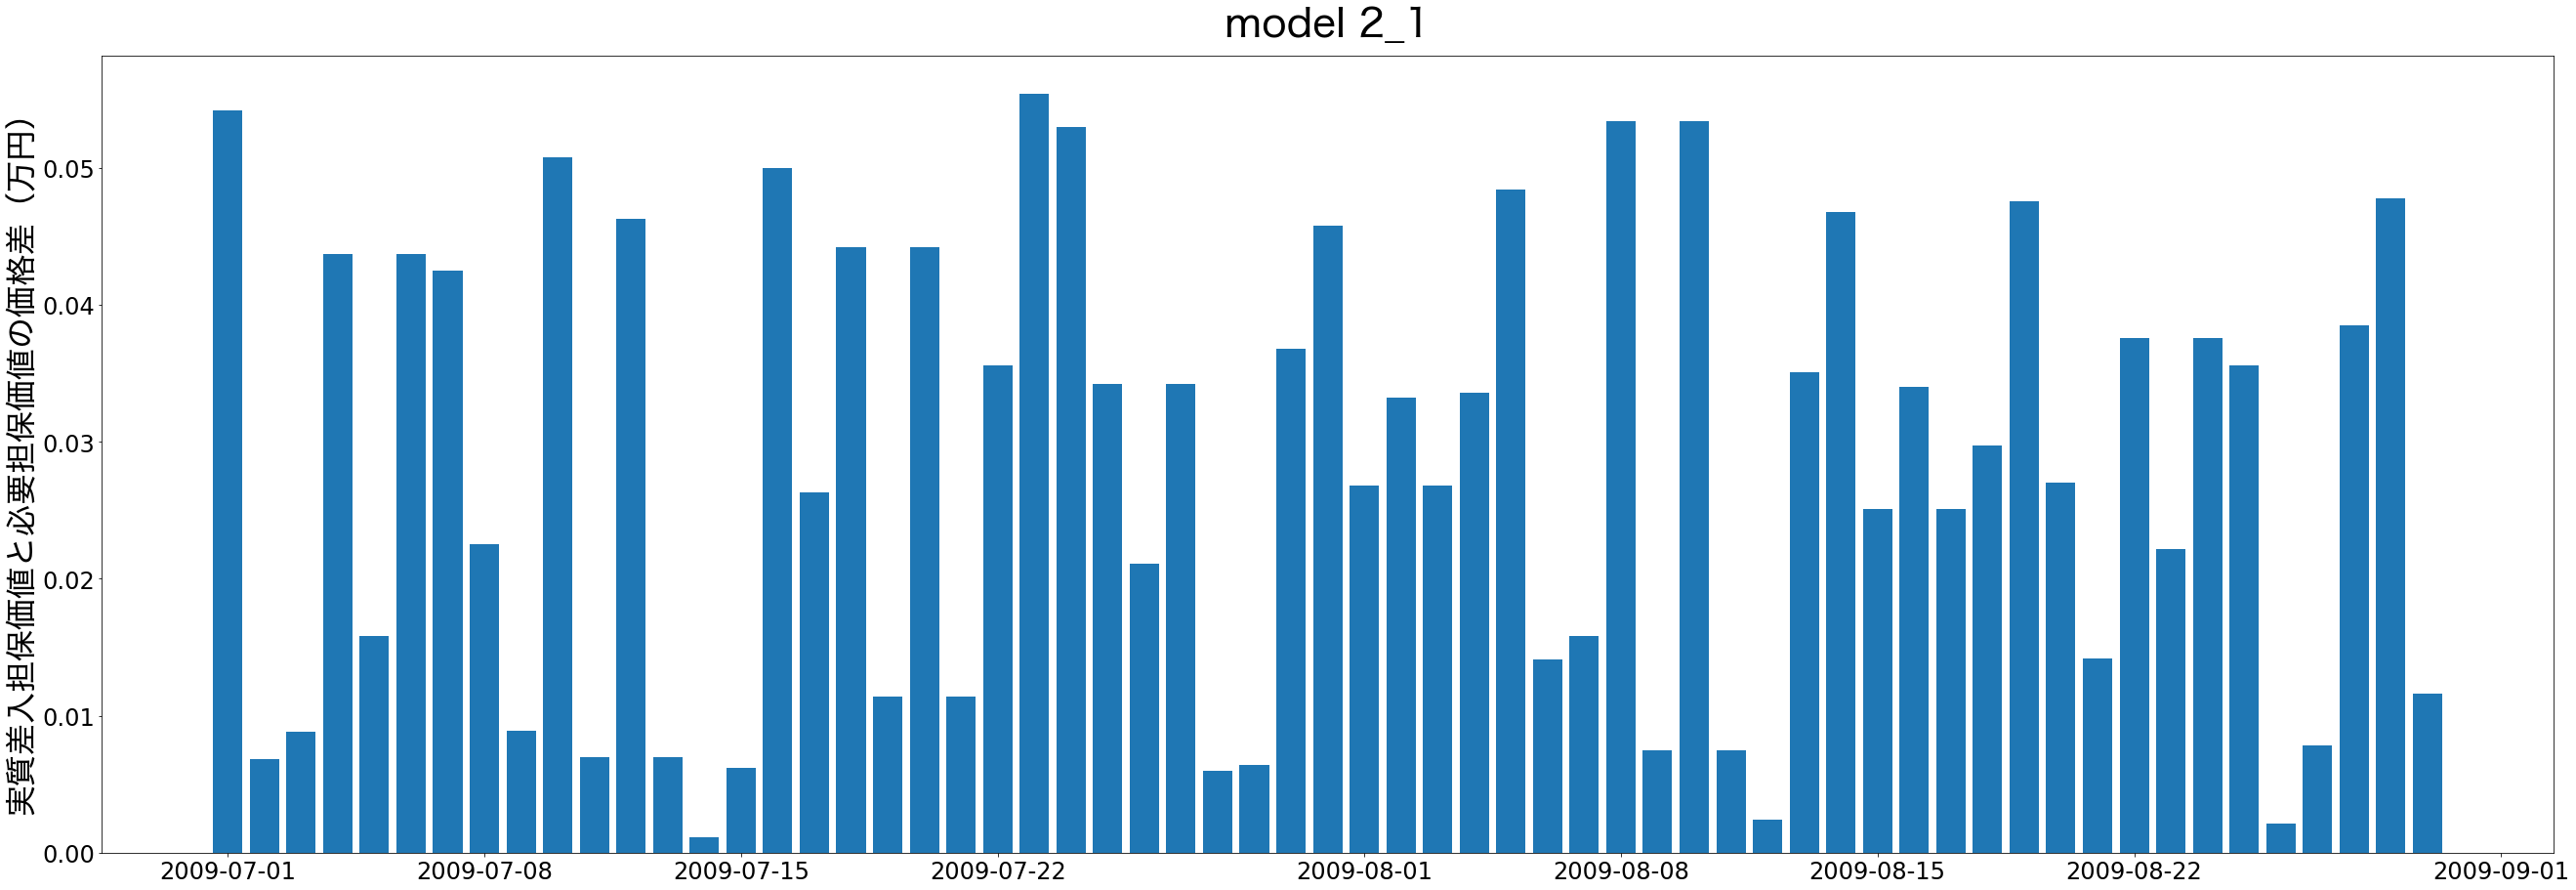

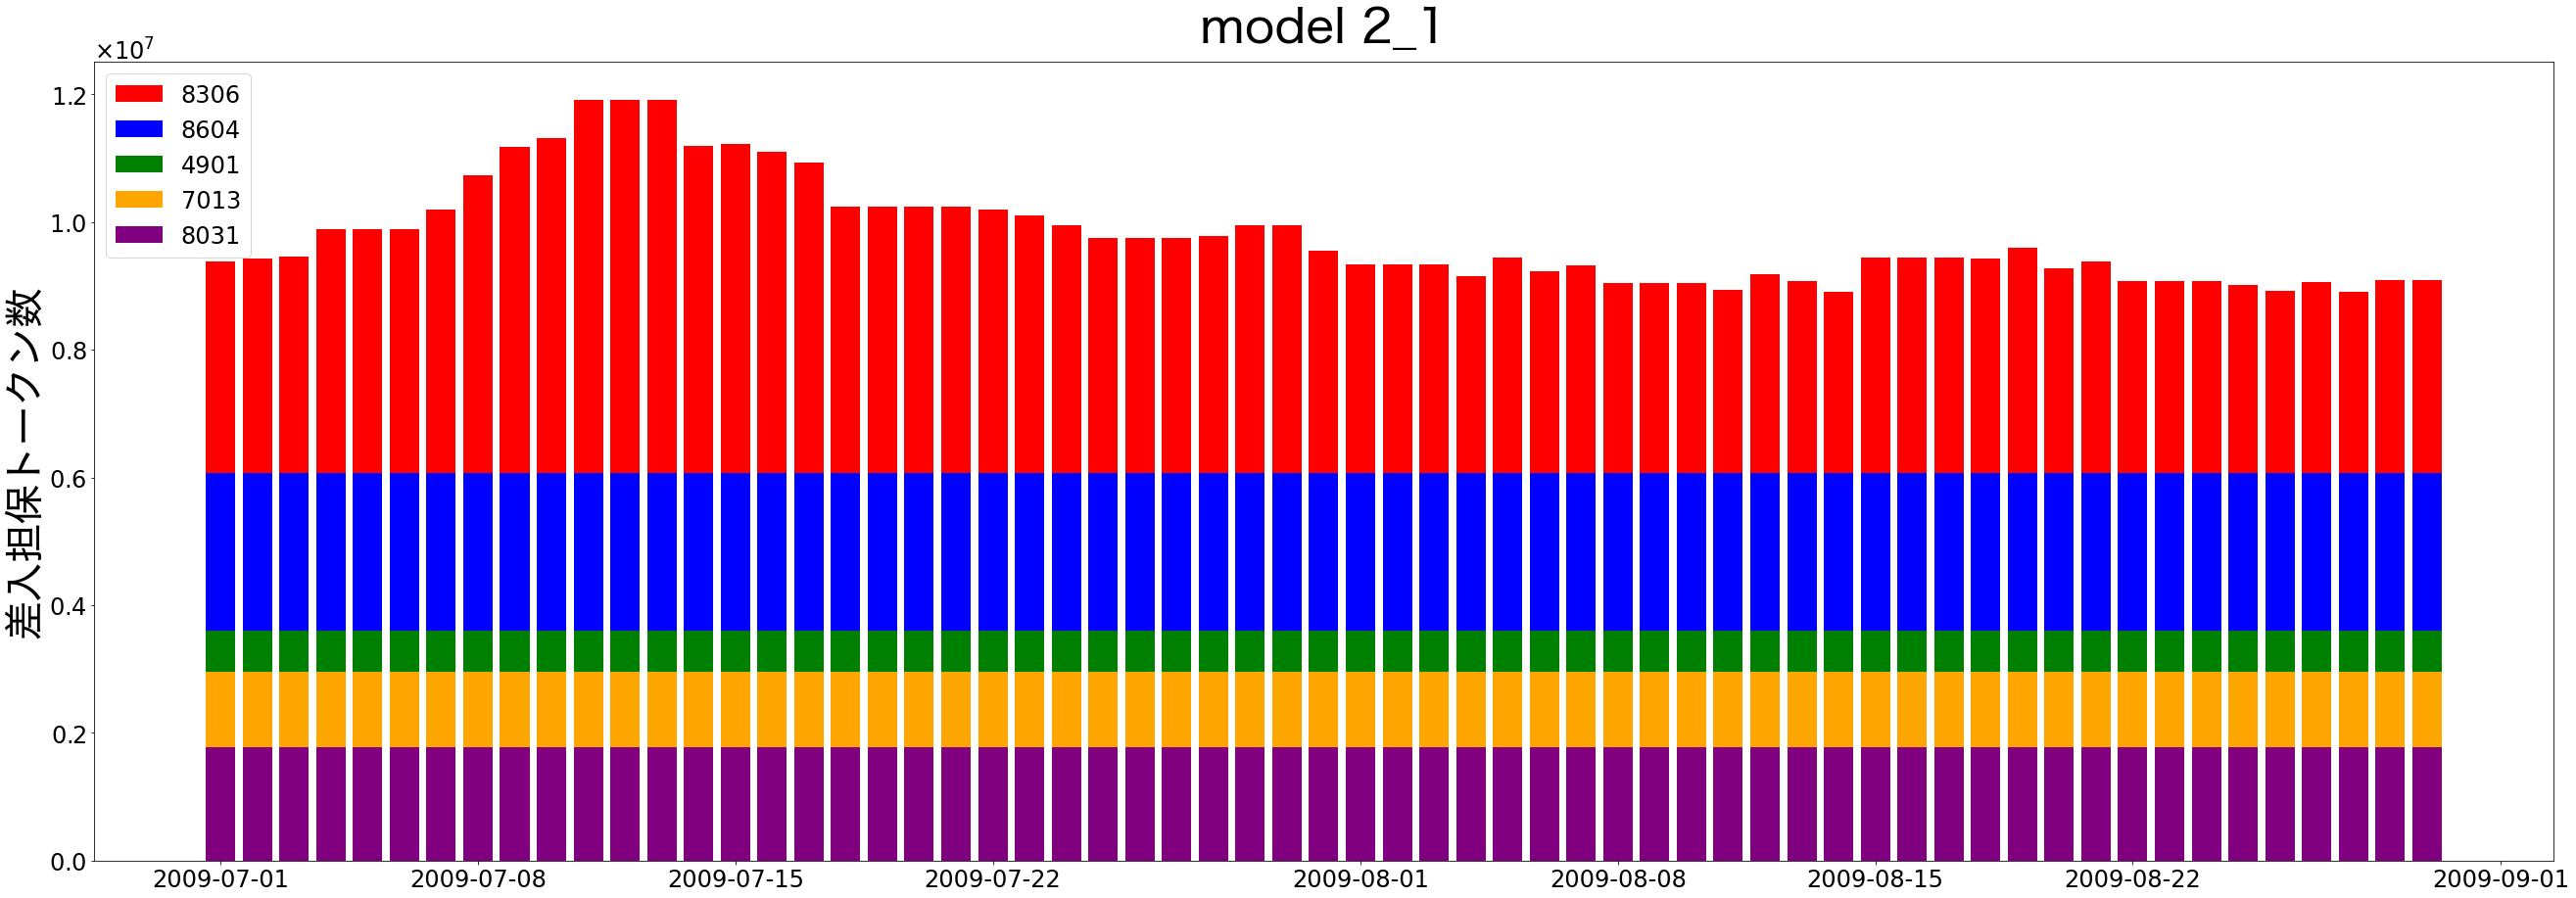

In [8]:
saved_logs_s1_m2_1 = np.load('./data0322/s1_m2_1.npy', allow_pickle=True).item()
visualizer_s1_m2_1 = LogVisualizer(saved_logs_s1_m2_1)
visualizer_s1_m2_1.bar_collateral_price_diff(title='model 2_1', is_decimal=True)
visualizer_s1_m2_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_1')
result_s1_m2_1 = visualizer_s1_m2_1.calc_price_diff_result()
diff_result_s1_m2_1 = visualizer_s1_m2_1.calc_token_diff()
diff_result_s1_m2_1
visualizer_s1_m2_1.calc_portfolio_credit_diff()

# saved_logs_s1_m2_1['lender_additional_issue'].count(True)
# saved_logs_s1_m2_1has_done_margincallas_done_margincall'].count(True)

#### model2-2

Log Visualizer initialized.


(102510391.80327868, 525720910.0)

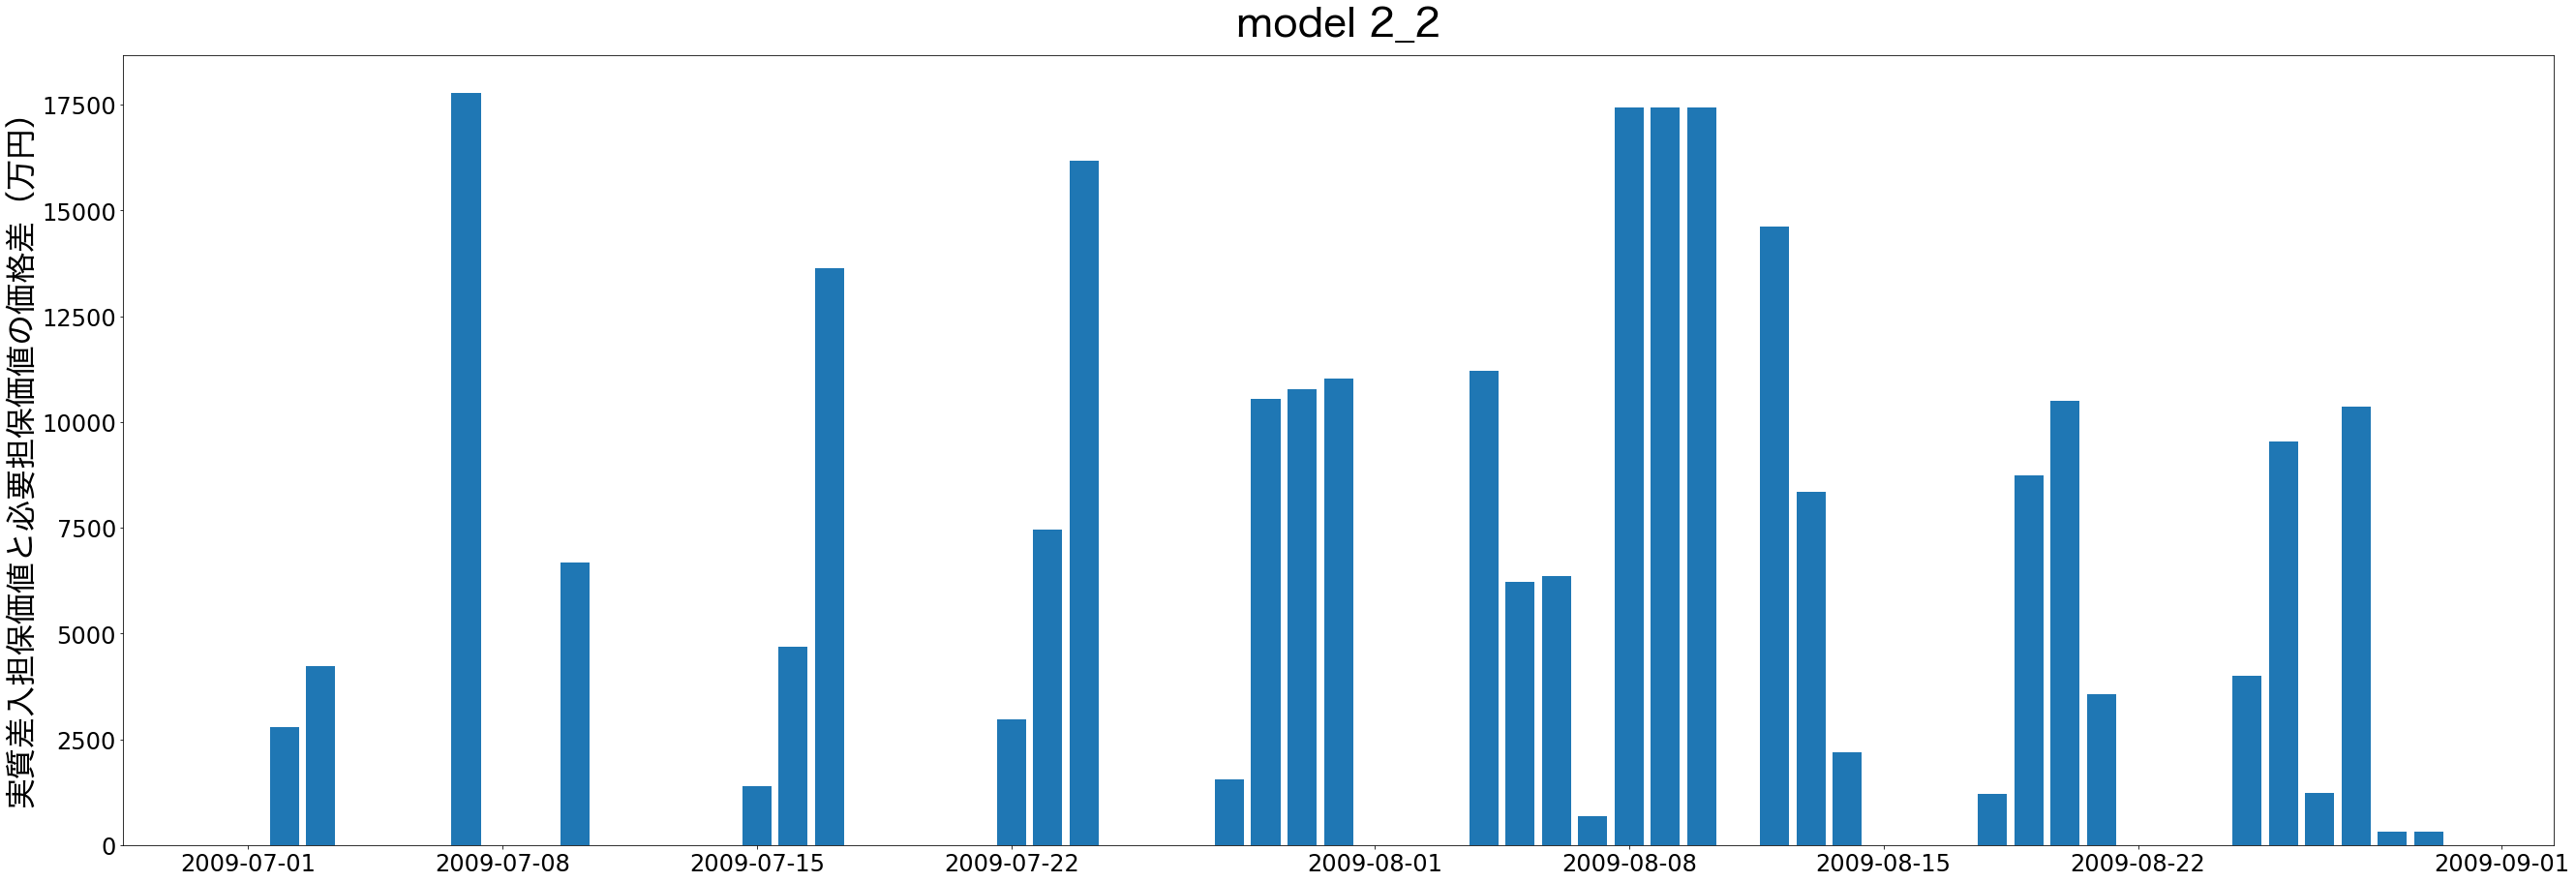

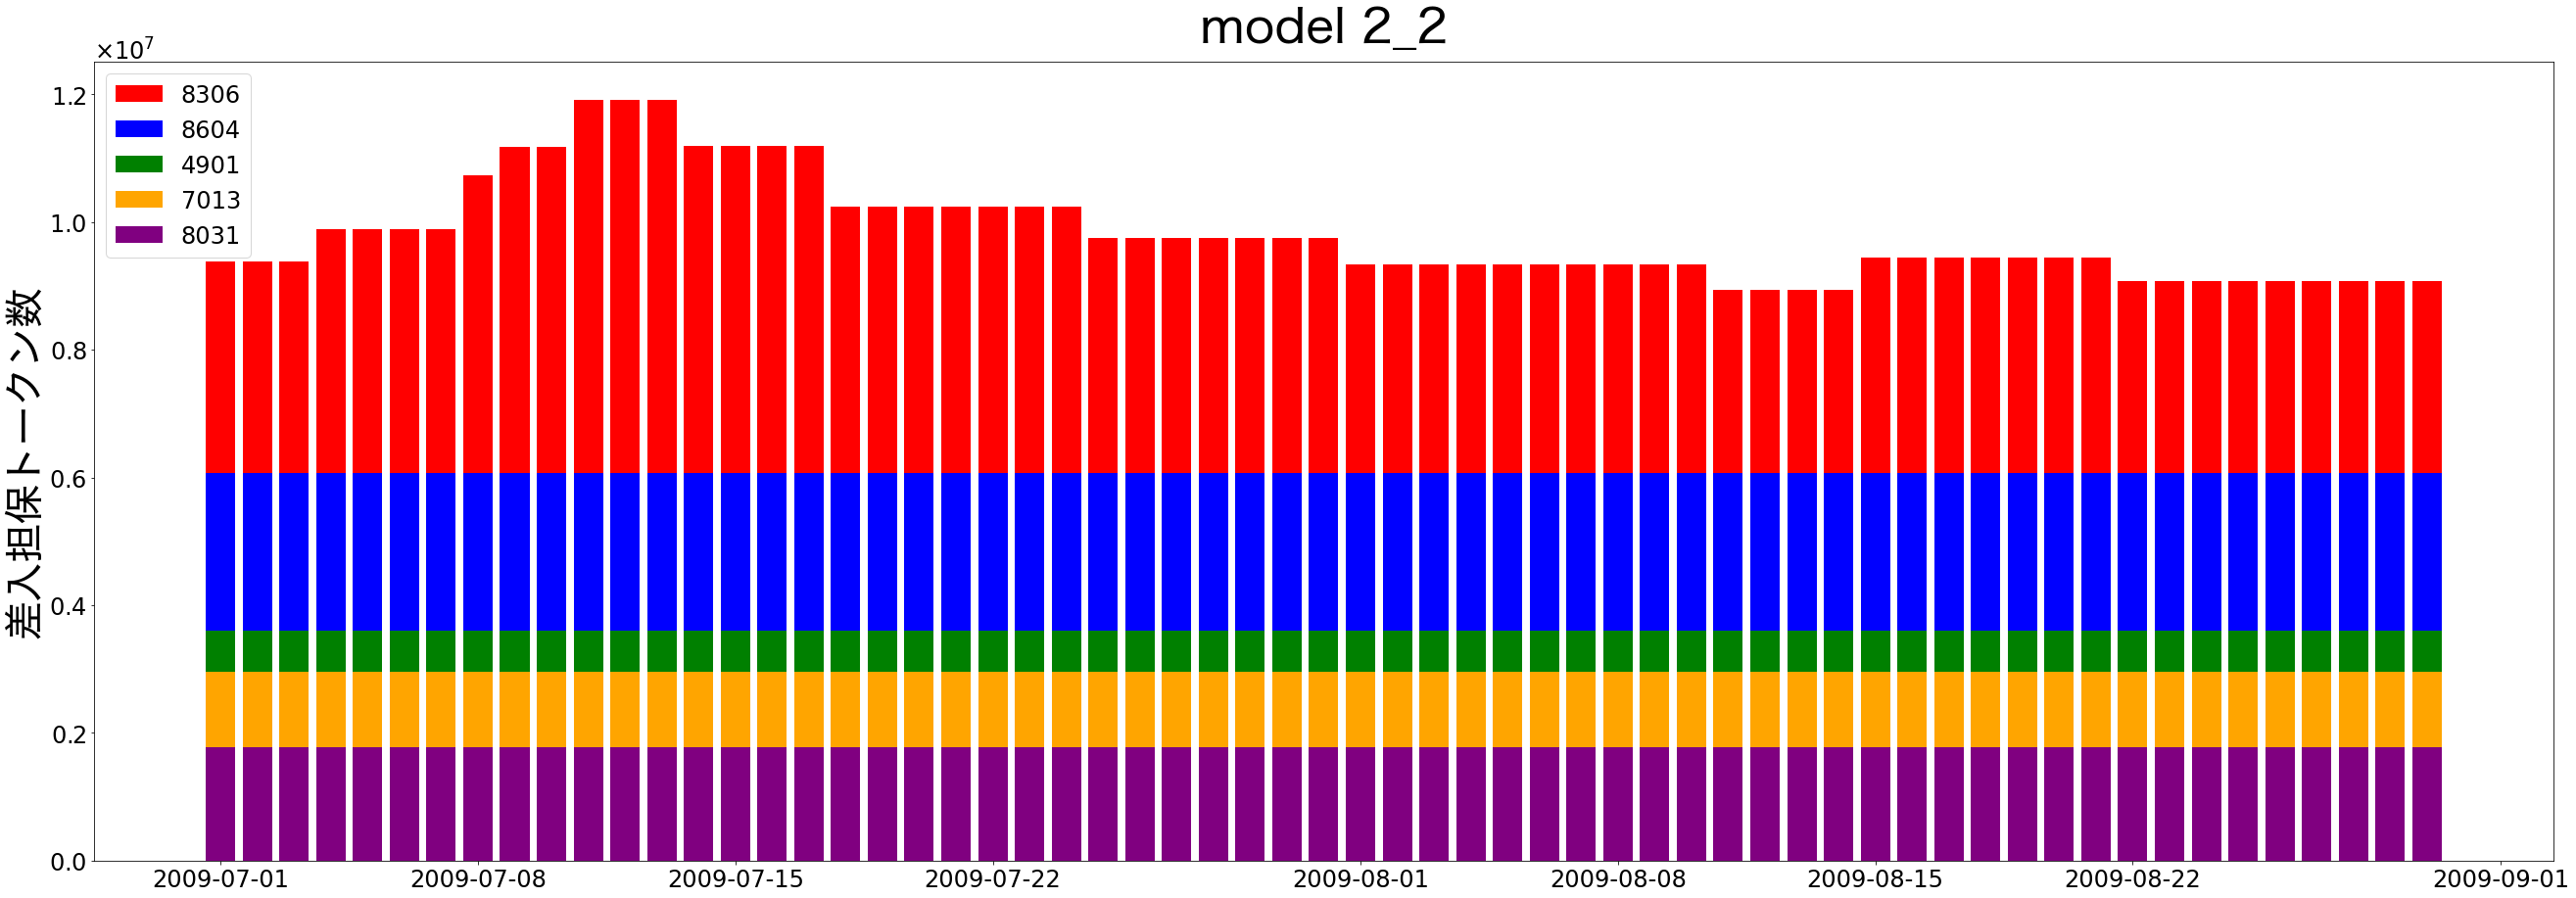

In [9]:
saved_logs_s1_m2_2 = np.load('./data0322/s1_m2_2.npy', allow_pickle=True).item()
visualizer_s1_m2_2 = LogVisualizer(saved_logs_s1_m2_2)
visualizer_s1_m2_2.bar_collateral_price_diff(title='model 2_2', is_decimal=True)
visualizer_s1_m2_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_2')
result_s1_m2_2 = visualizer_s1_m2_2.calc_price_diff_result()
diff_result_s1_m2_2 = visualizer_s1_m2_2.calc_token_diff()
diff_result_s1_m2_2
visualizer_s1_m2_2.calc_portfolio_credit_diff()

# saved_logs_s1_m2_2['lender_additional_issue'].count(True)
# saved_logs_s1_m2_2['has_done_margincall'].count(True)

#### model3-1

Log Visualizer initialized.


(88768524.96721311, 412813638.0)

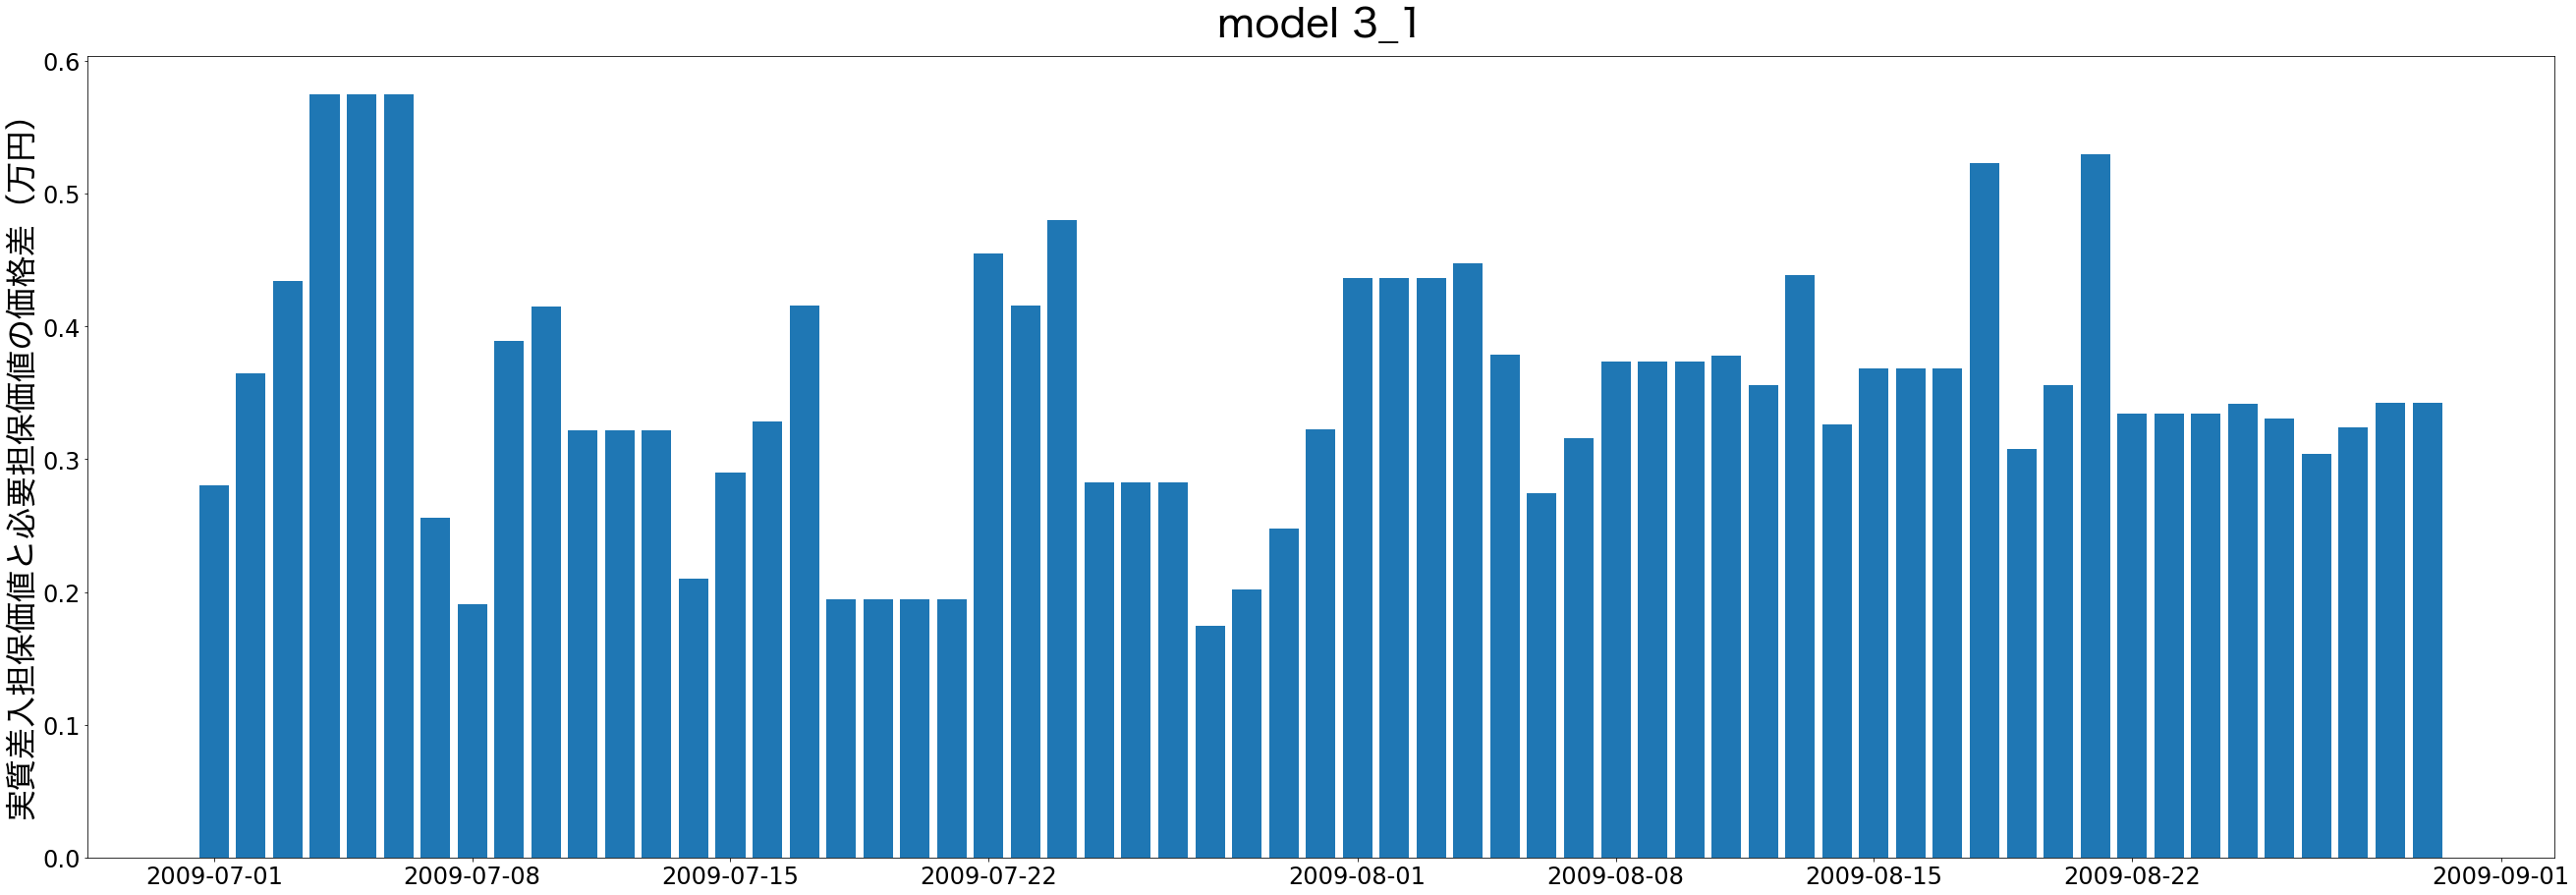

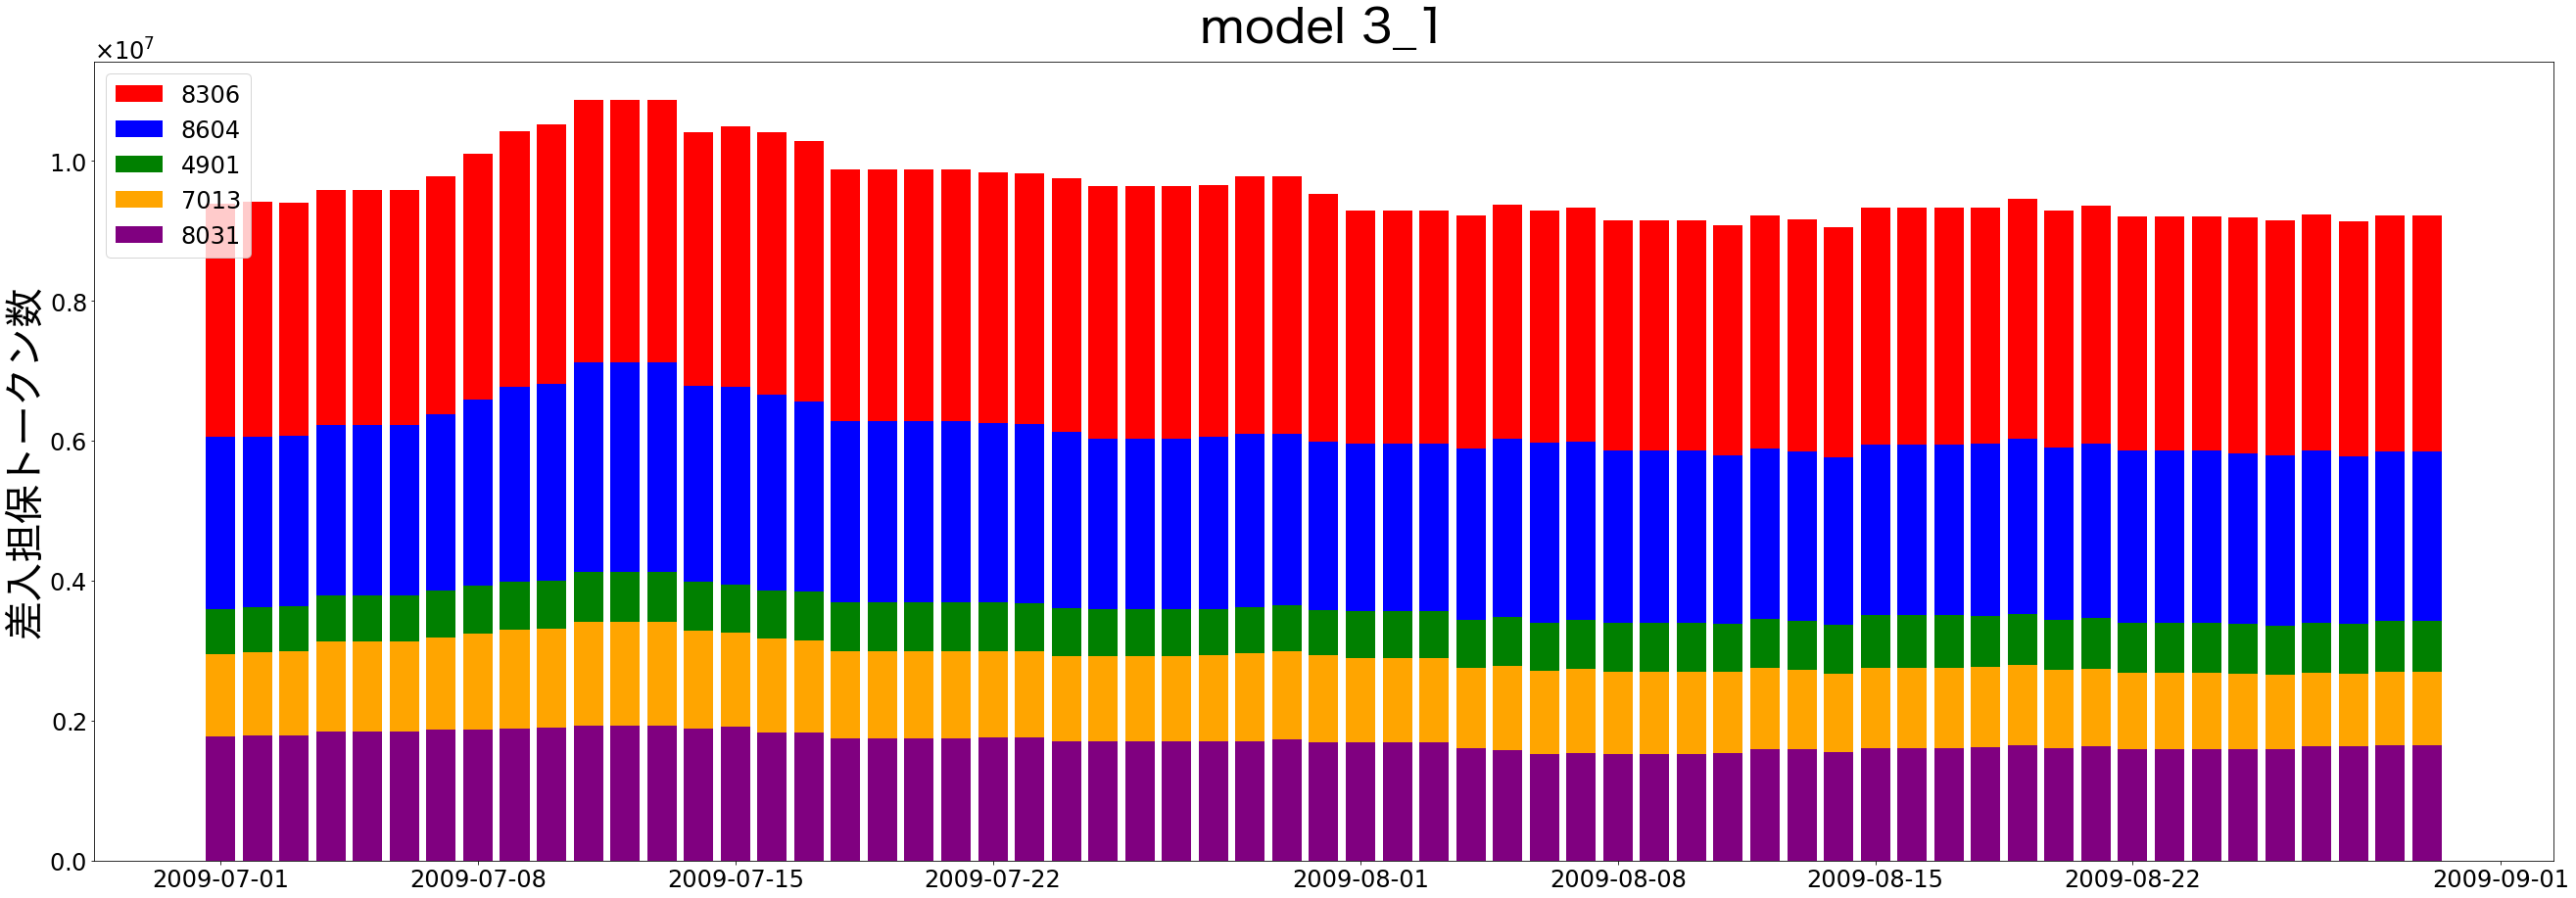

In [10]:
saved_logs_s1_m3_1 = np.load('./data0322/s1_m3_1.npy', allow_pickle=True).item()
visualizer_s1_m3_1 = LogVisualizer(saved_logs_s1_m3_1)
visualizer_s1_m3_1.bar_collateral_price_diff(title='model 3_1', is_decimal=True)
visualizer_s1_m3_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_1')
result_s1_m3_1 = visualizer_s1_m3_1.calc_price_diff_result()
diff_result_s1_m3_1 = visualizer_s1_m3_1.calc_token_diff()
diff_result_s1_m3_1
visualizer_s1_m3_1.calc_portfolio_credit_diff()

# saved_logs_s1_m3_1['lender_additional_issue'].count(True)
# saved_logs_s1_m3_1['has_done_margincall'].count(True)

#### model3-2

Log Visualizer initialized.


(104817372.55737706, 586578191.0)

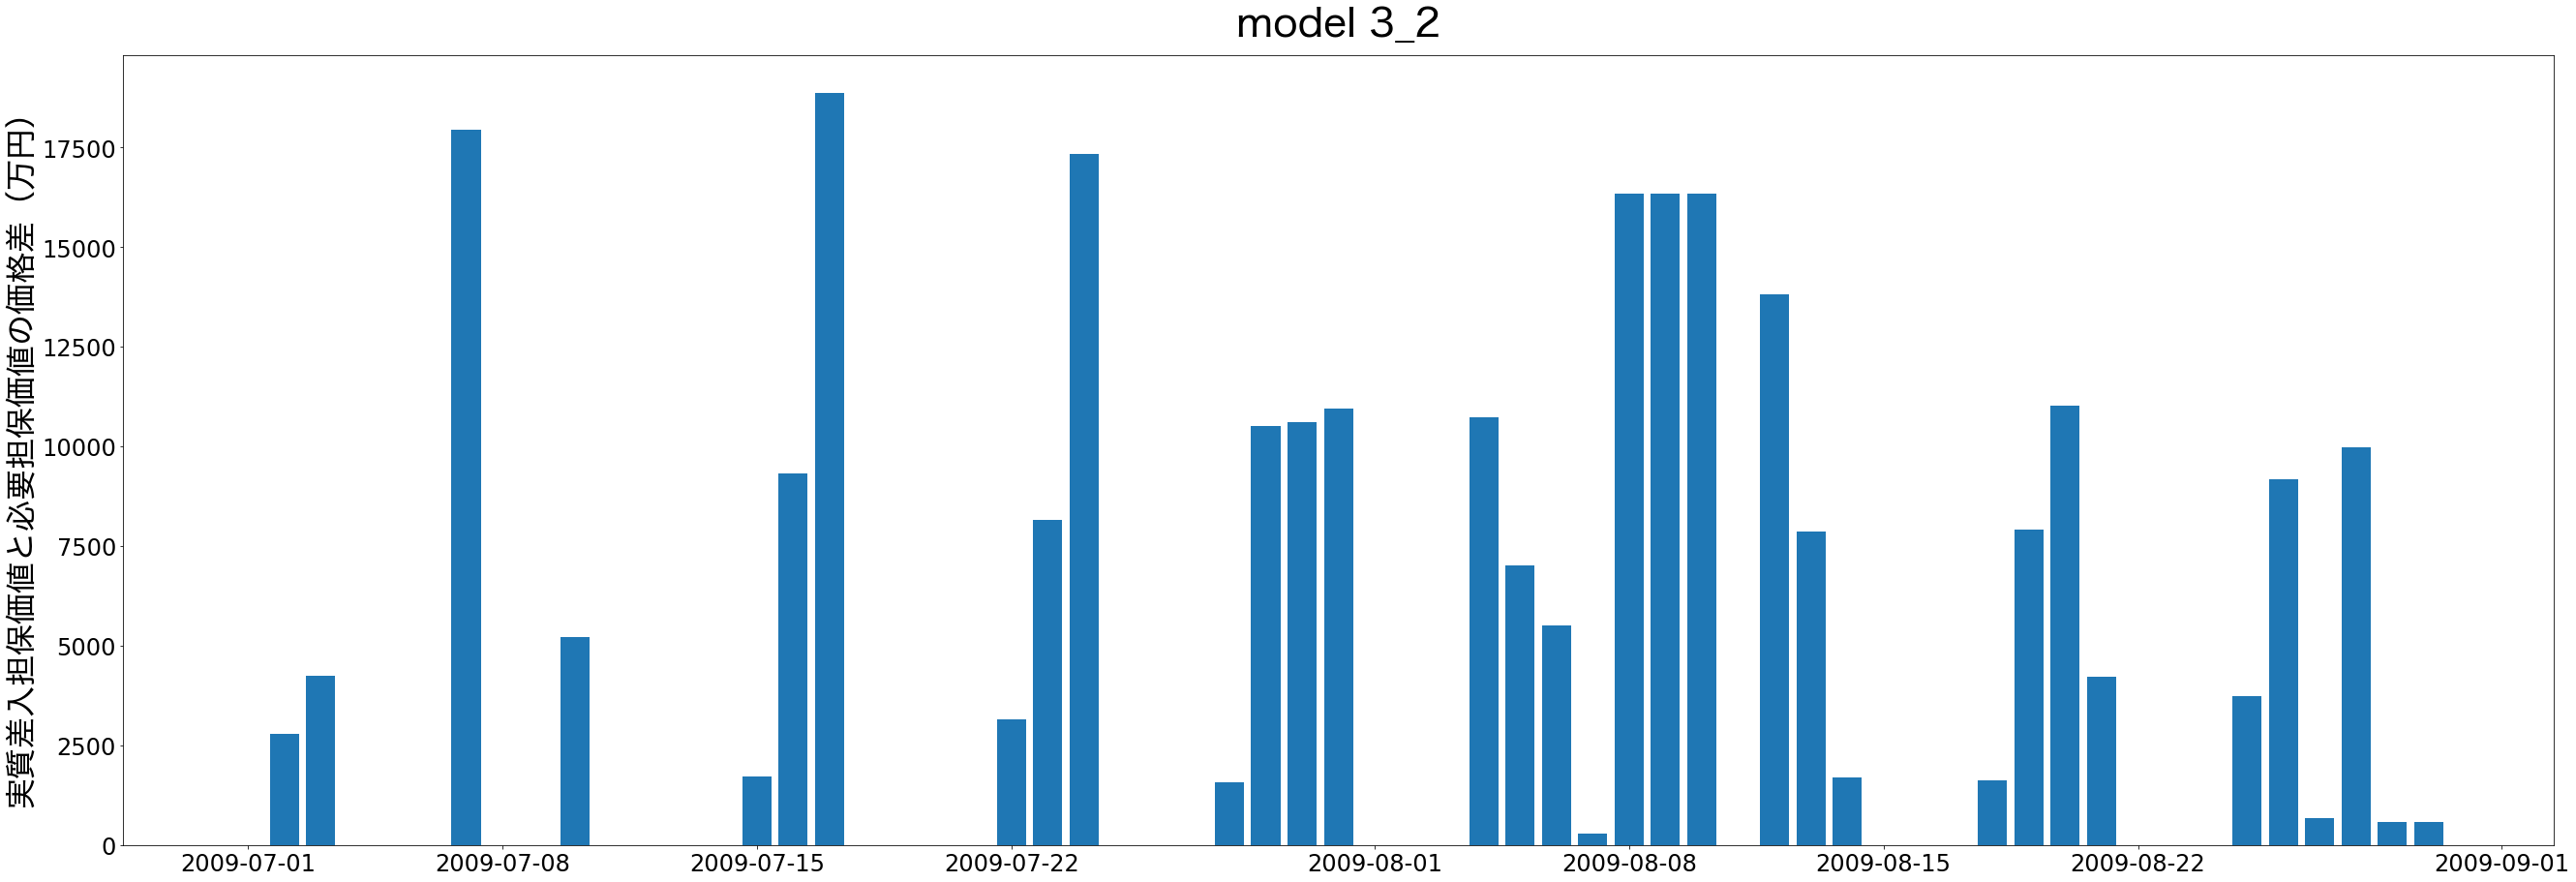

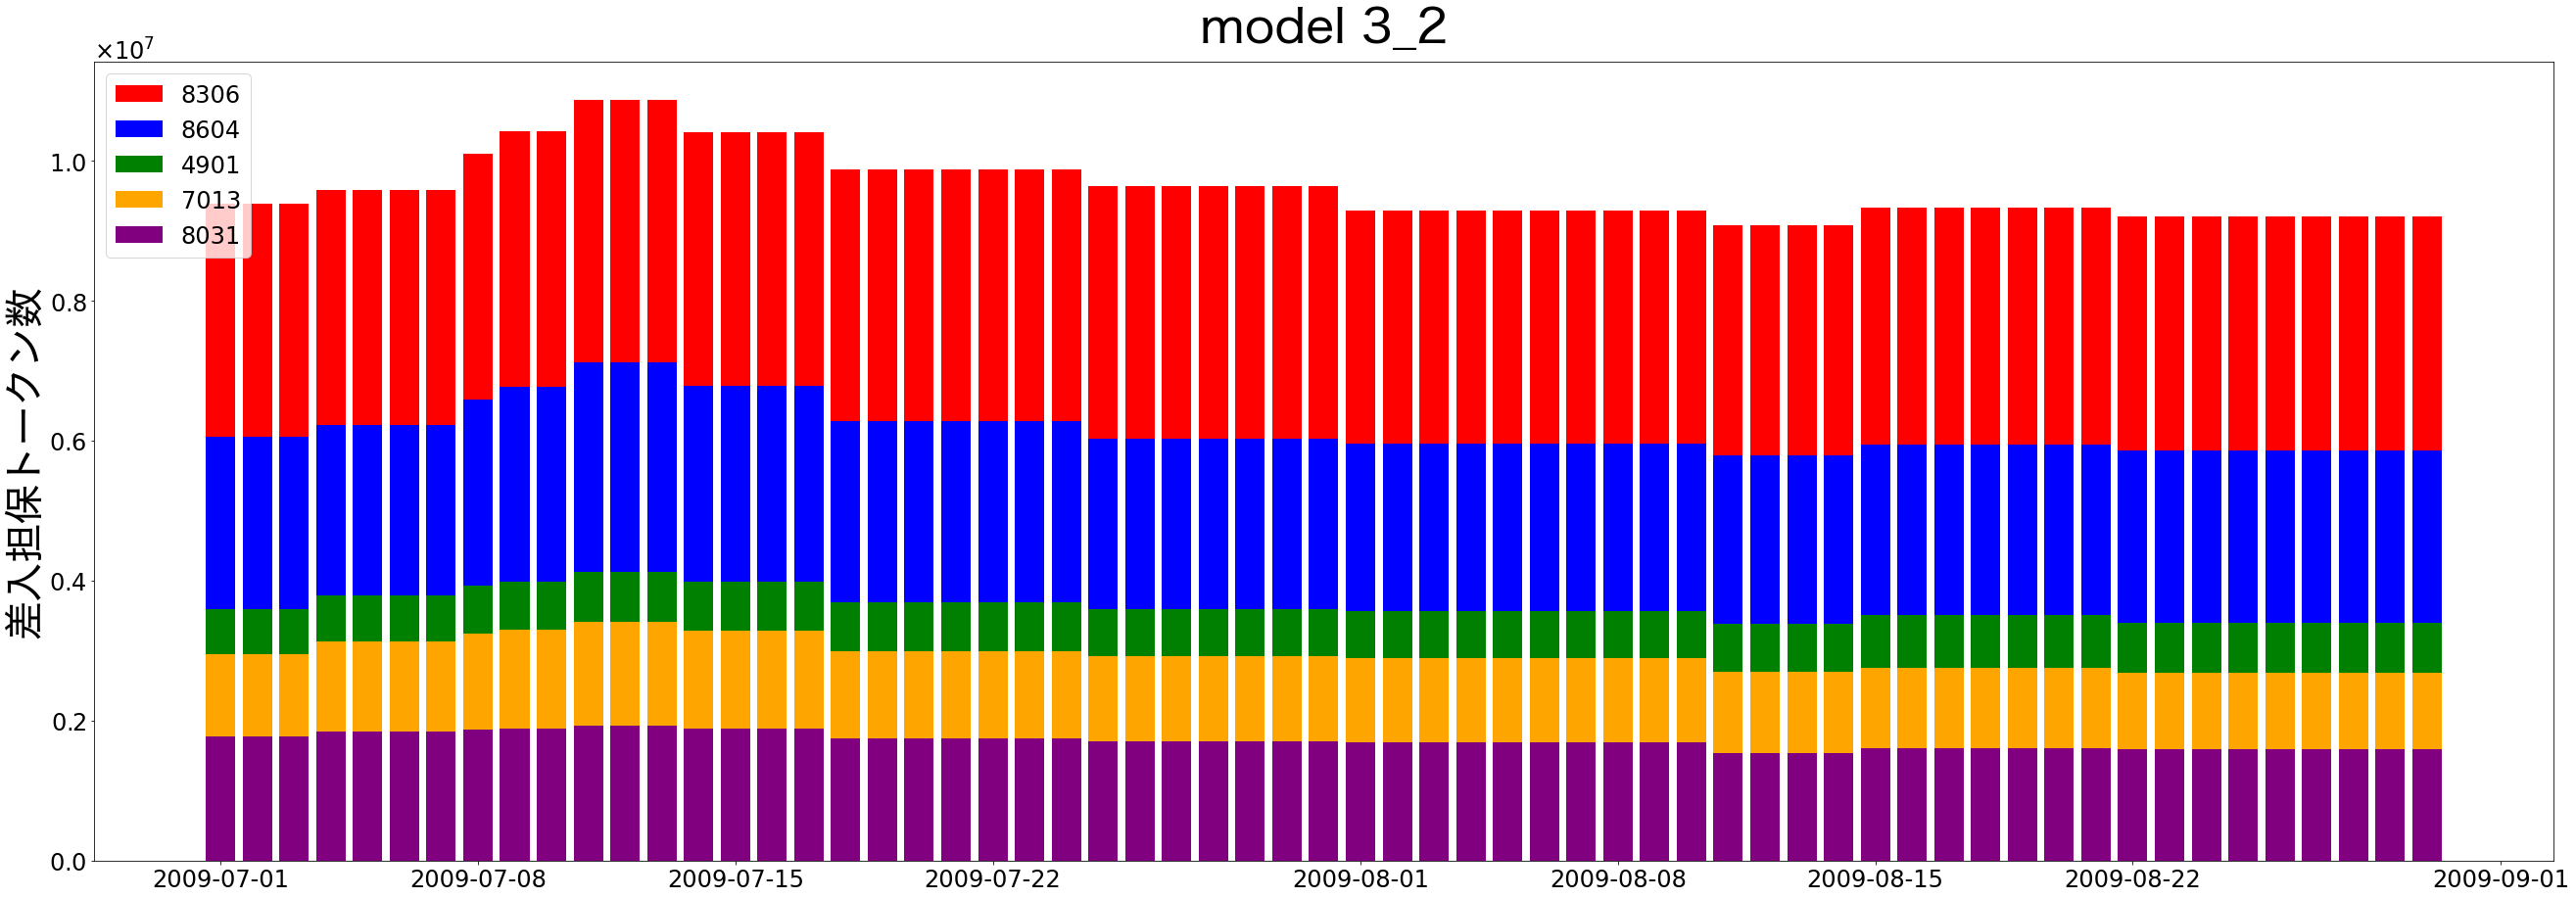

In [11]:
saved_logs_s1_m3_2 = np.load('./data0322/s1_m3_2.npy', allow_pickle=True).item()
visualizer_s1_m3_2 = LogVisualizer(saved_logs_s1_m3_2)
visualizer_s1_m3_2.bar_collateral_price_diff(title='model 3_2', is_decimal=True)
visualizer_s1_m3_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_2')
result_s1_m3_2 = visualizer_s1_m3_2.calc_price_diff_result()
diff_result_s1_m3_2 = visualizer_s1_m3_2.calc_token_diff()
diff_result_s1_m3_2
visualizer_s1_m3_2.calc_portfolio_credit_diff()

# saved_logs_s1_m3_2['lender_additional_issue'].count(True)
# saved_logs_s1_m3_2['has_done_margincall'].count(True)

#### 価格変動リスクケース間比較

In [111]:
price_diff_log_lists_s1 = {
    'モデル0: 現行手続き': result_s1_m0['raw_data'],
    'モデル1: 単一トークン調整, マージンコール閾値β=0': result_s1_m1['raw_data'],
    'モデル2: 複数トークン調整, マージンコール閾値β=0': result_s1_m2['raw_data'],
    'モデル3: 単一トークン調整, マージンコール閾値β=0.02': result_s1_m3['raw_data'],
    'モデル4: 複数トークン調整, マージンコール閾値β=0.02': result_s1_m4['raw_data'],
}

date_list_s1 = saved_logs_s1_m0['date']

NameError: name 'result_s1_m0' is not defined

In [ ]:
plt_all_price_diff(date_list_s1, price_diff_log_lists_s1, 's1')

### シナリオ2

#### model1-1

Log Visualizer initialized.


(329481349.75409836, 1464128513.0)

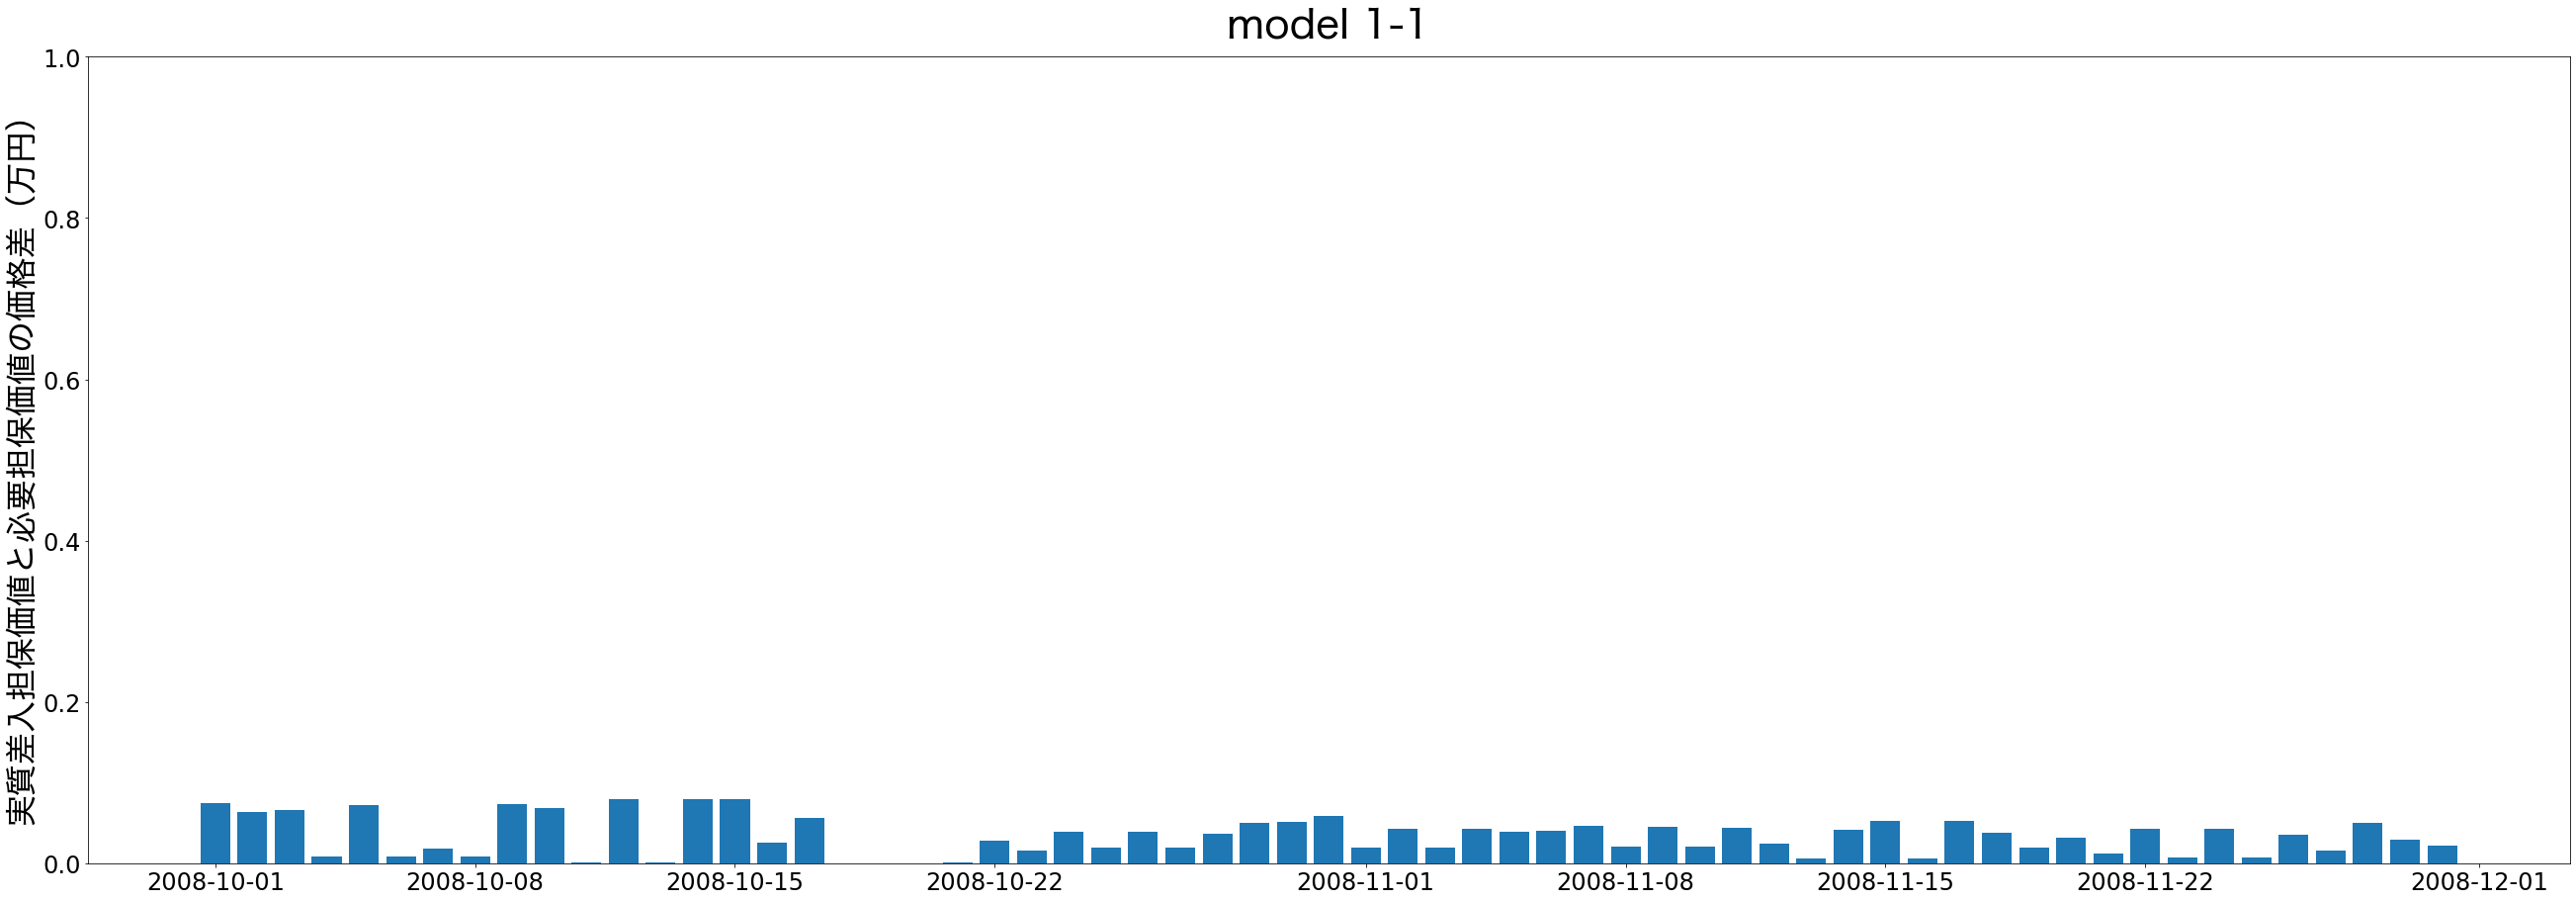

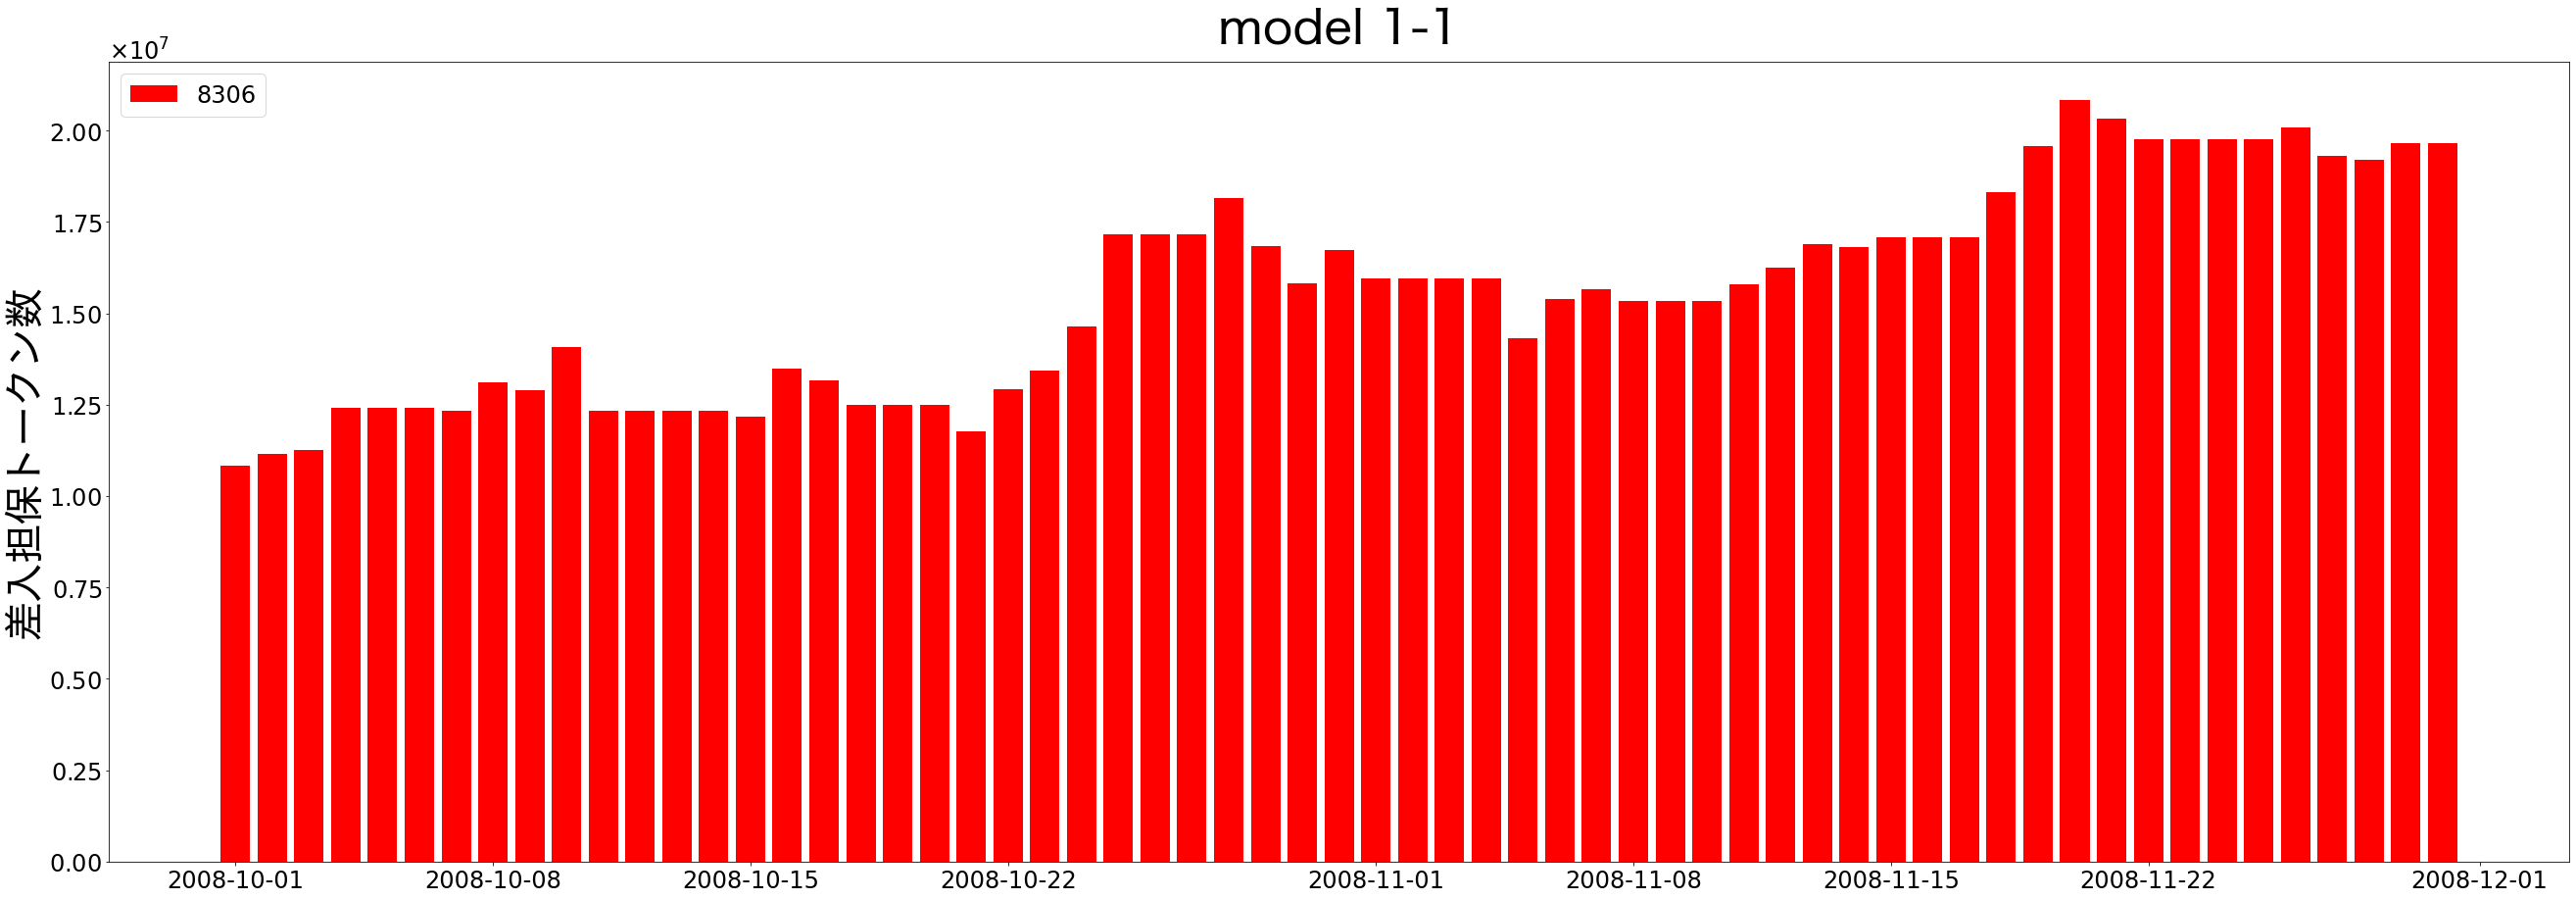

In [24]:
saved_logs_s2_m1_1 = np.load('./data0322/s2_m1_1.npy', allow_pickle=True).item()
visualizer_s2_m1_1 = LogVisualizer(saved_logs_s2_m1_1)
visualizer_s2_m1_1.bar_collateral_price_diff(1, title='model 1-1', is_decimal=True)
visualizer_s2_m1_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-1')
result_s2_m1_1 = visualizer_s2_m1_1.calc_price_diff_result()
diff_result_s2_m1_1 = visualizer_s2_m1_1.calc_token_diff()
diff_result_s2_m1_1
visualizer_s2_m1_1.calc_portfolio_credit_diff()

# saved_logs_s2_m1_1['lender_additional_issue'].count(True)
# saved_logs_s2_m1_1['has_done_margincall'].count(True)

#### model1-2

Log Visualizer initialized.


(327070518.44262296, 1464128513.0)

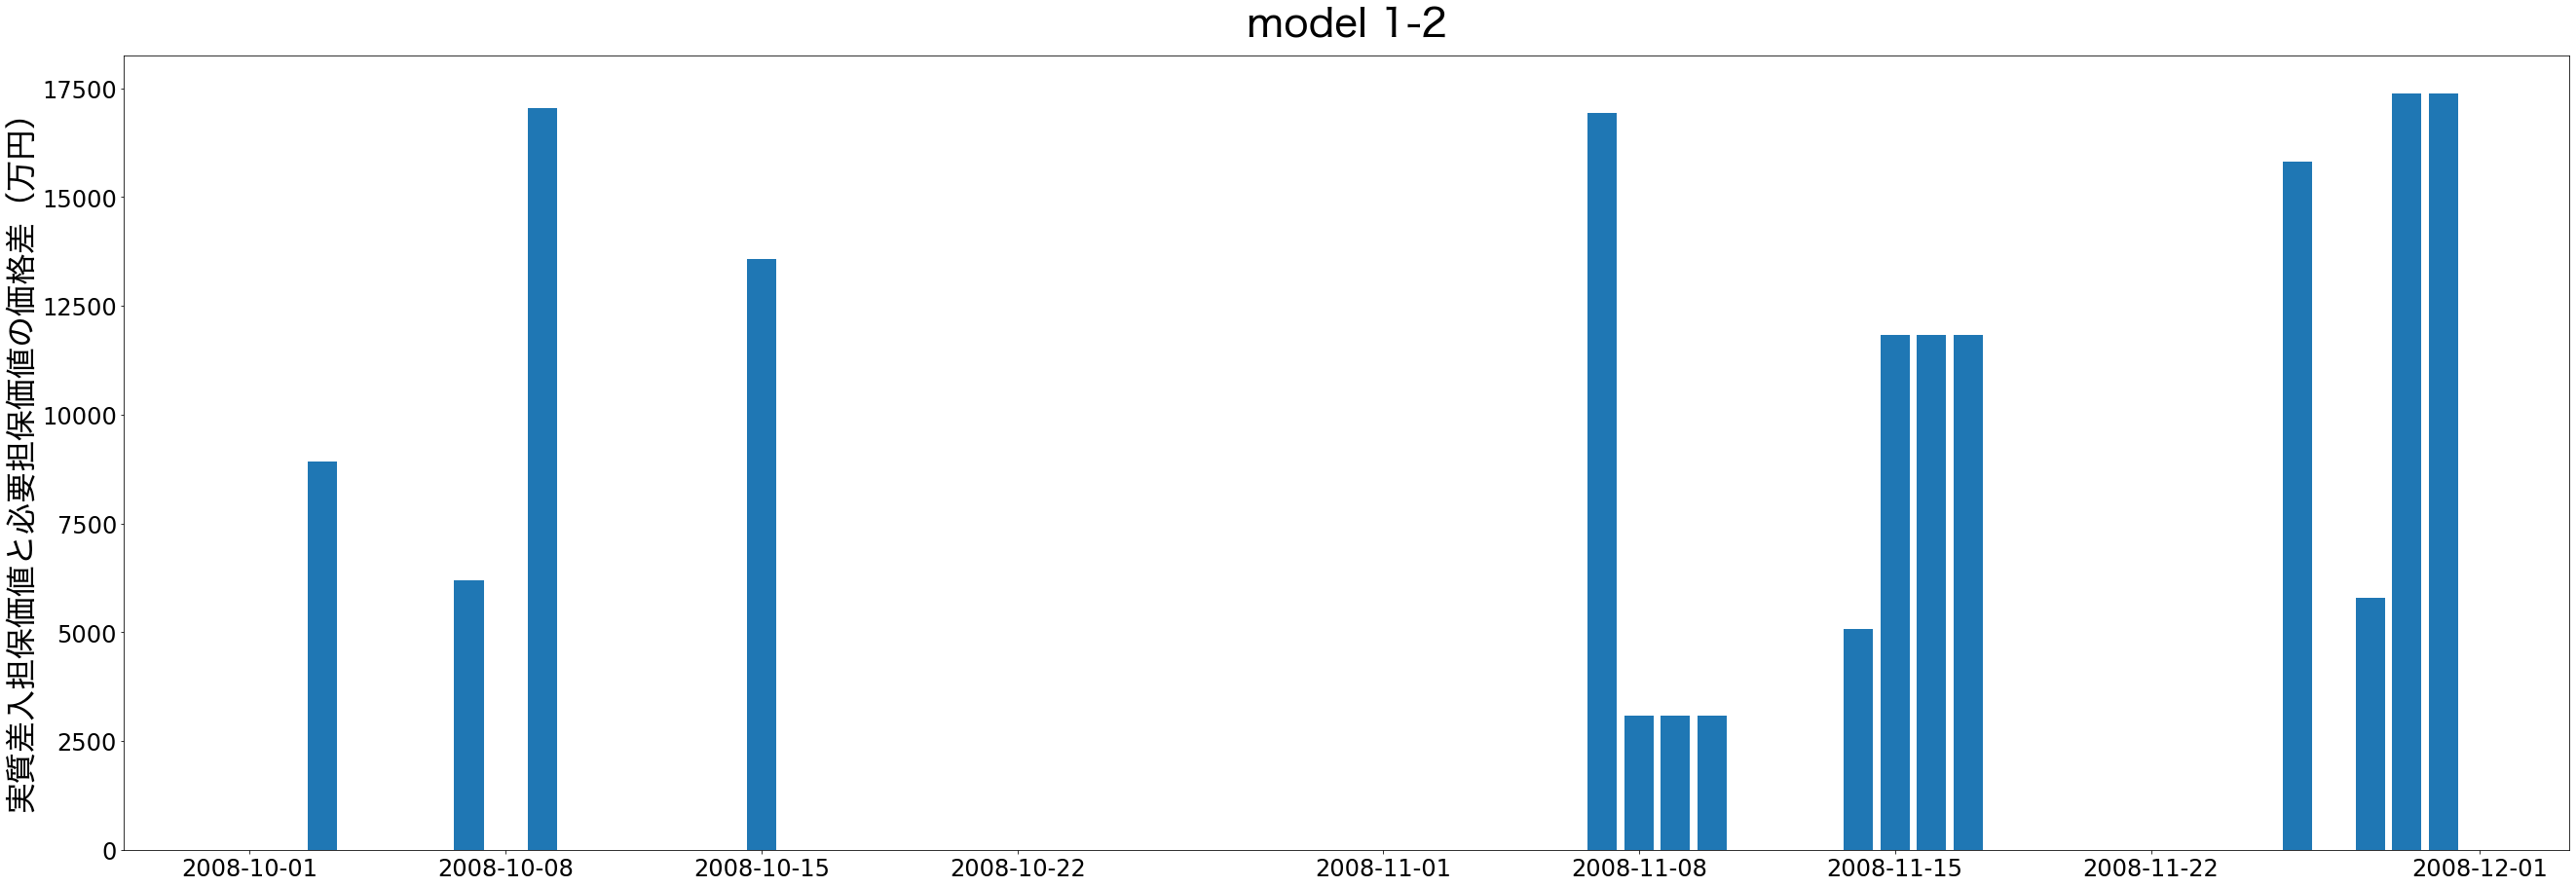

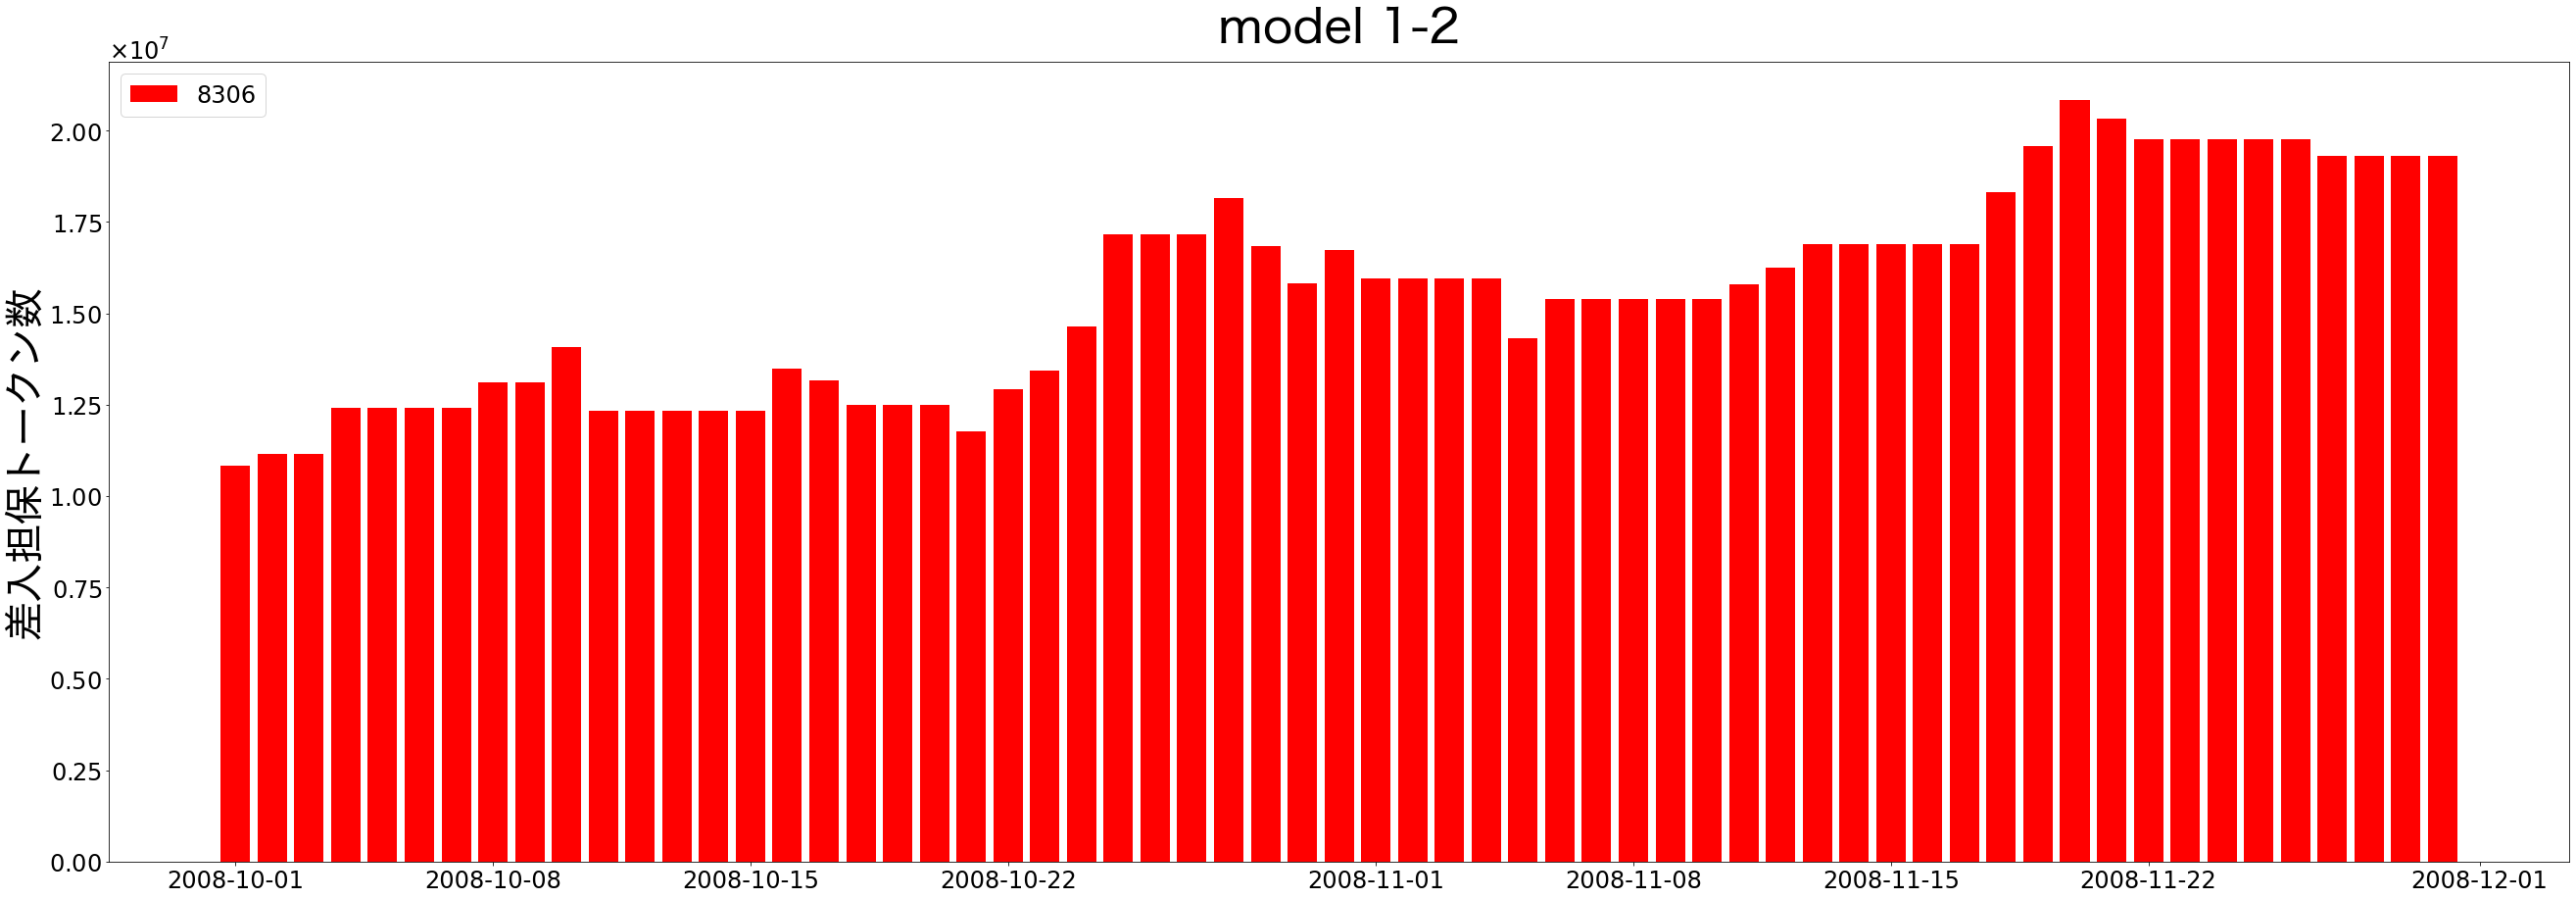

In [25]:
saved_logs_s2_m1_2 = np.load('./data0322/s2_m1_2.npy', allow_pickle=True).item()
visualizer_s2_m1_2 = LogVisualizer(saved_logs_s2_m1_2)
visualizer_s2_m1_2.bar_collateral_price_diff(title='model 1-2', is_decimal=True)
visualizer_s2_m1_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-2')
result_s2_m1_2 = visualizer_s2_m1_2.calc_price_diff_result()
diff_result_s2_m1_2 = visualizer_s2_m1_2.calc_token_diff()
diff_result_s2_m1_2
visualizer_s2_m1_2.calc_portfolio_credit_diff()

# saved_logs_s2_m1_2['lender_additional_issue'].count(True)
# saved_logs_s2_m1_2['has_done_margincall'].count(True)

#### model2-1

Log Visualizer initialized.


(310626355.3606557, 1472699520.0)

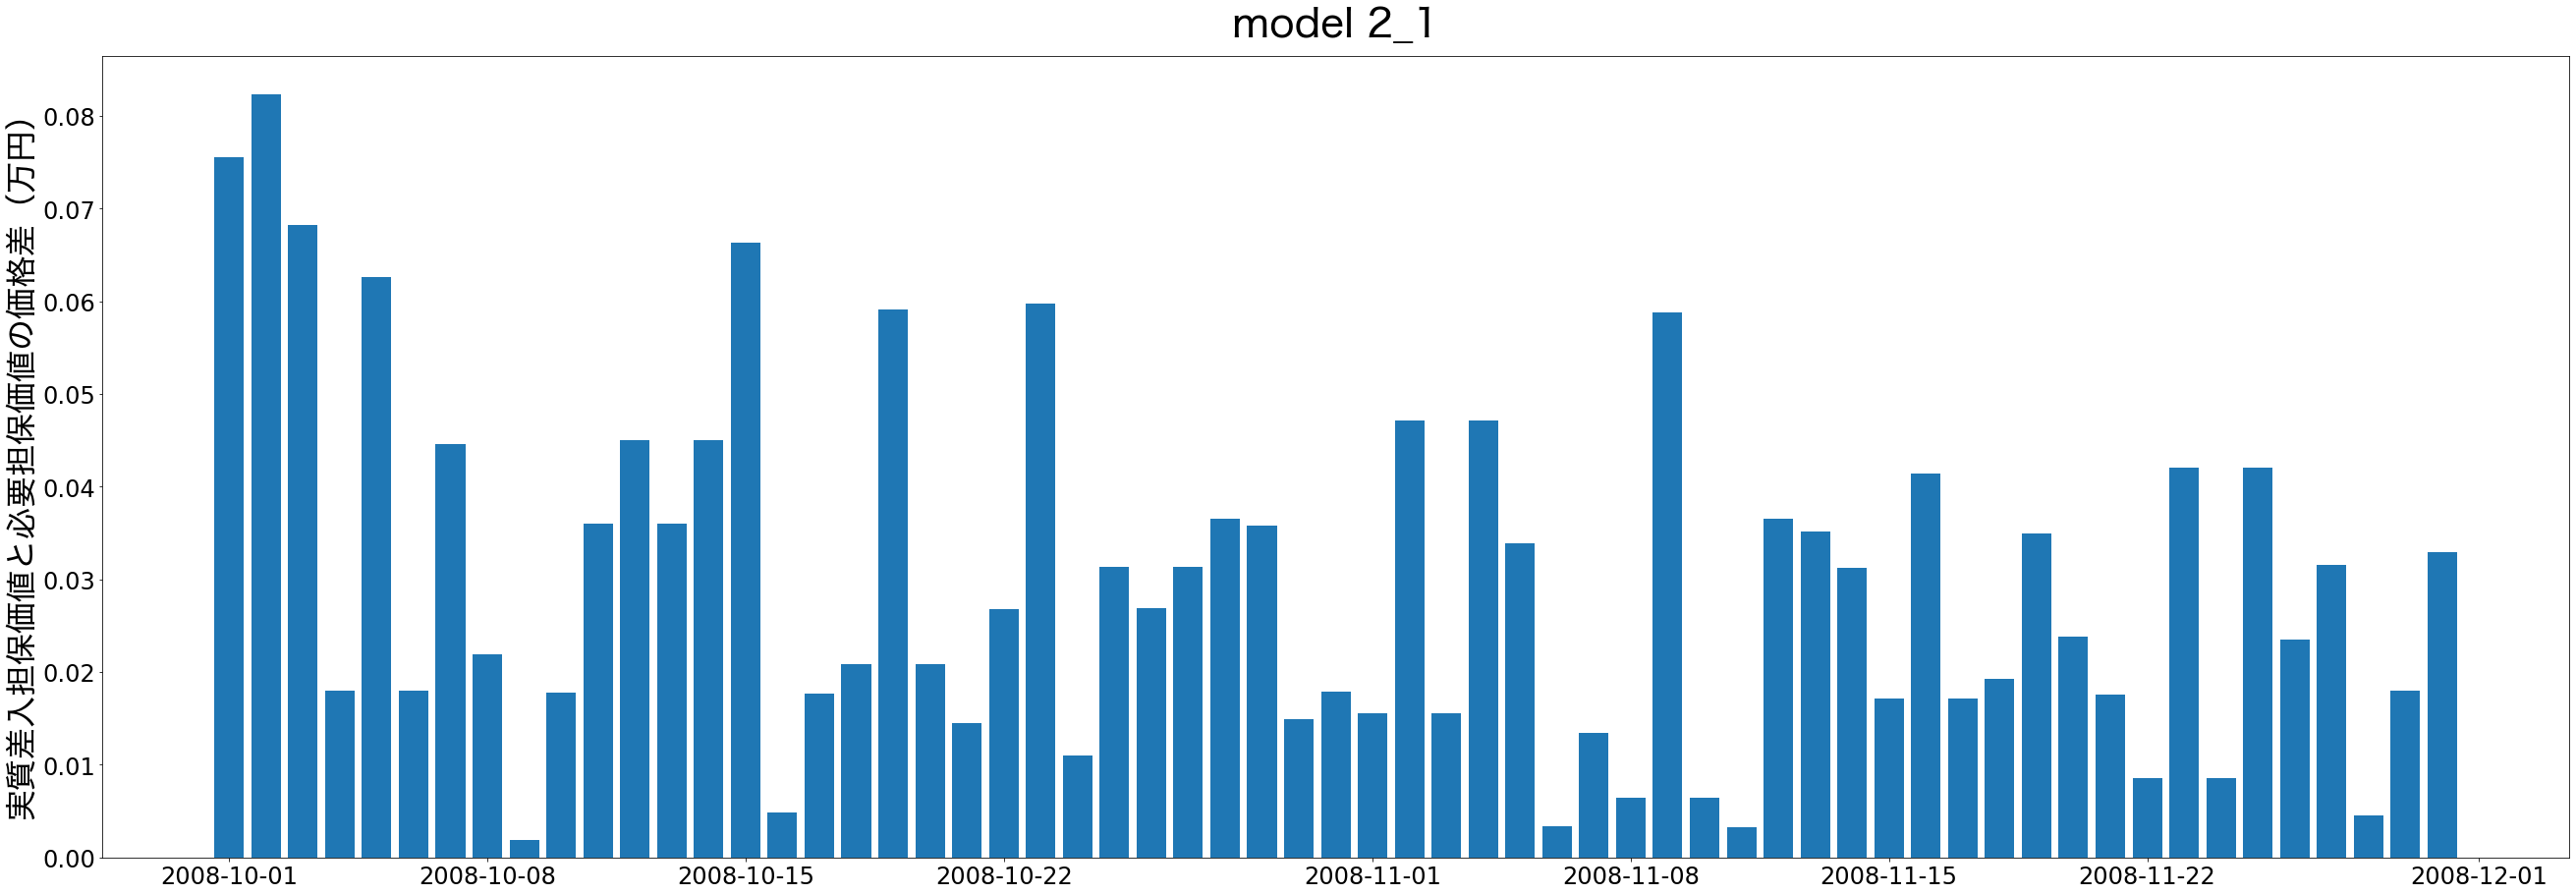

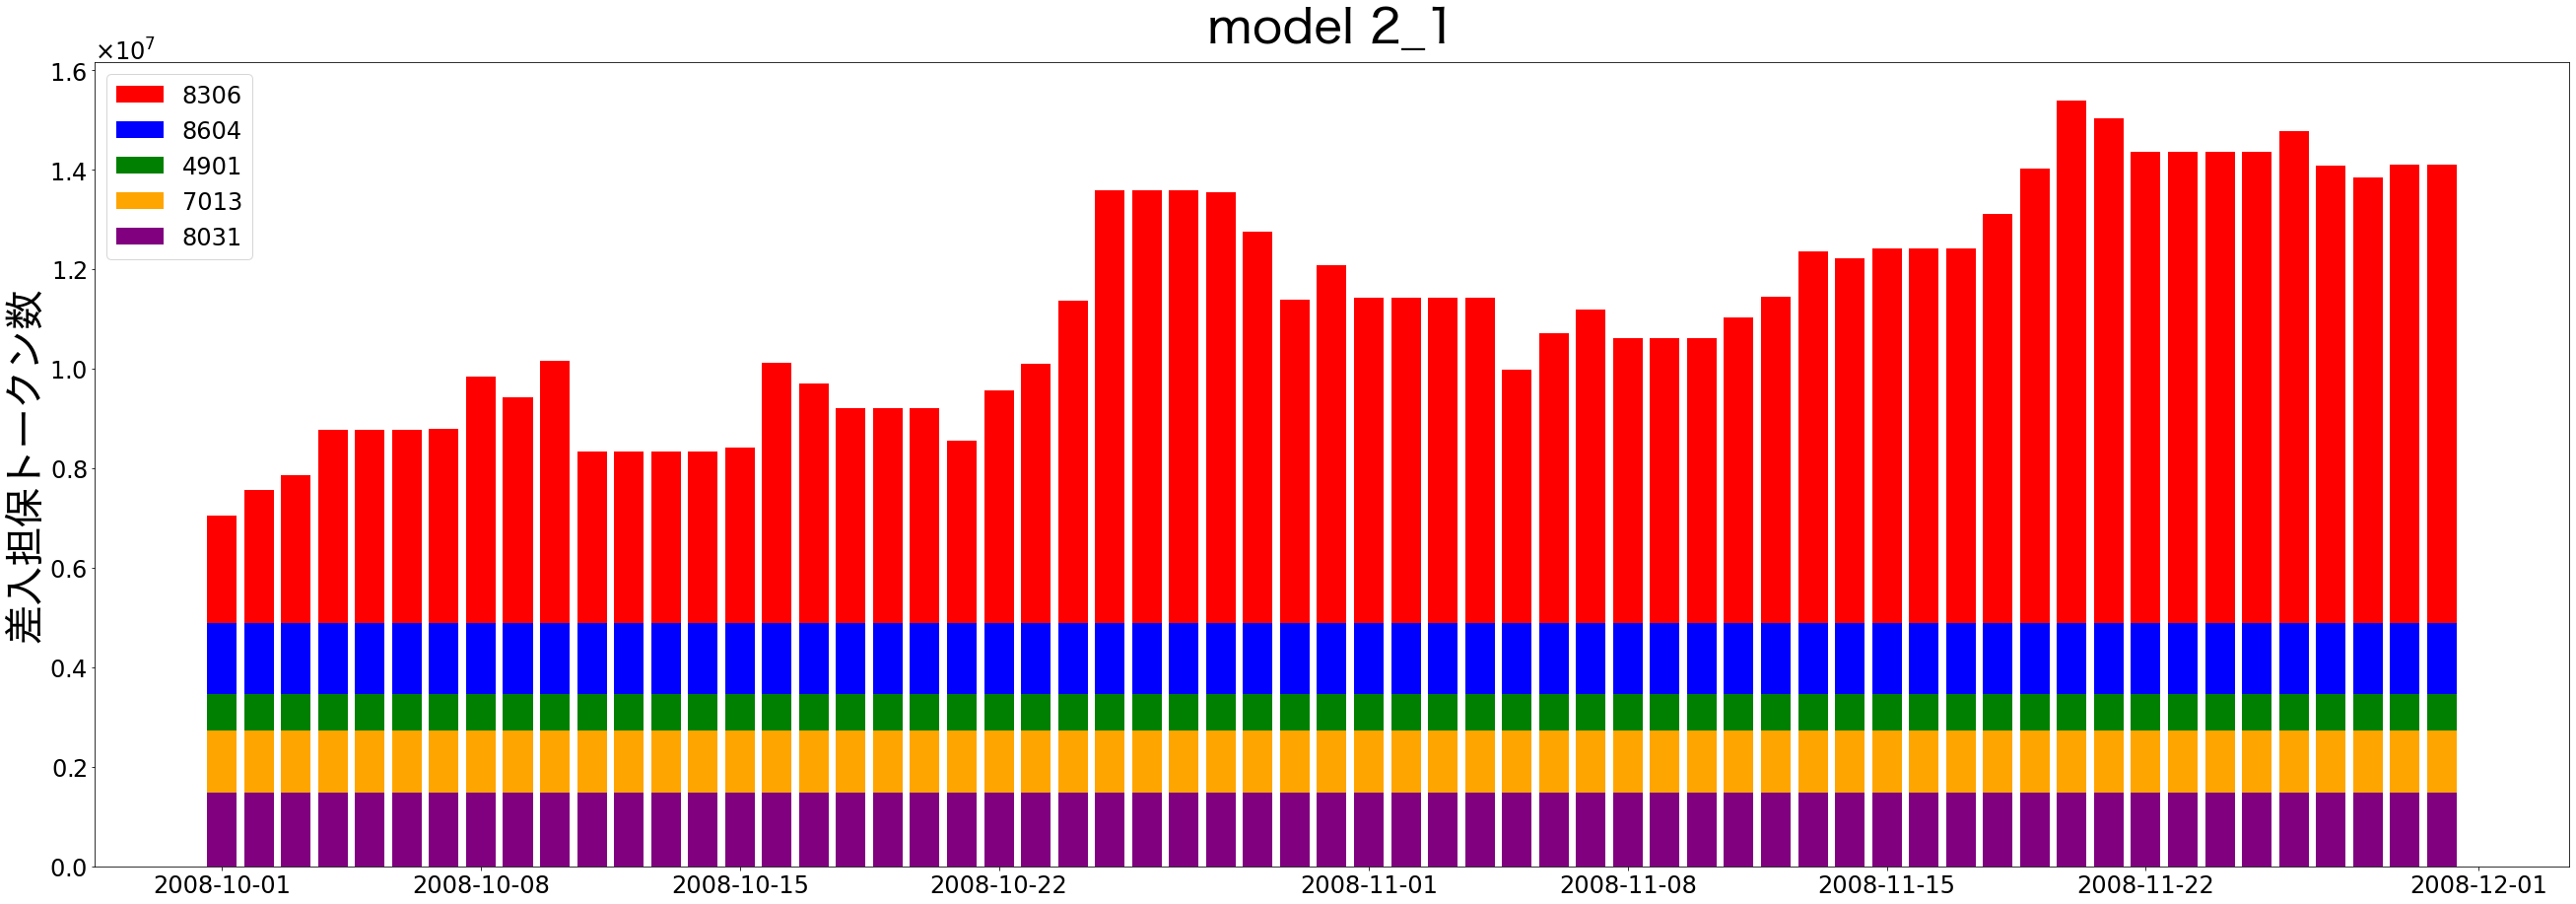

In [14]:
saved_logs_s2_m2_1 = np.load('./data0322/s2_m2_1.npy', allow_pickle=True).item()
visualizer_s2_m2_1 = LogVisualizer(saved_logs_s2_m2_1)
visualizer_s2_m2_1.bar_collateral_price_diff(title='model 2_1', is_decimal=True)
visualizer_s2_m2_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_1')
result_s2_m2_1 = visualizer_s2_m2_1.calc_price_diff_result()
diff_result_s2_m2_1 = visualizer_s2_m2_1.calc_token_diff()
diff_result_s2_m2_1
visualizer_s2_m2_1.calc_portfolio_credit_diff()

# saved_logs_s2_m2_1['lender_additional_issue'].count(True)
# saved_logs_s2_m2_1['has_done_margincall'].count(True)

#### model2-2

Log Visualizer initialized.


(314022405.21311474, 1472699520.0)

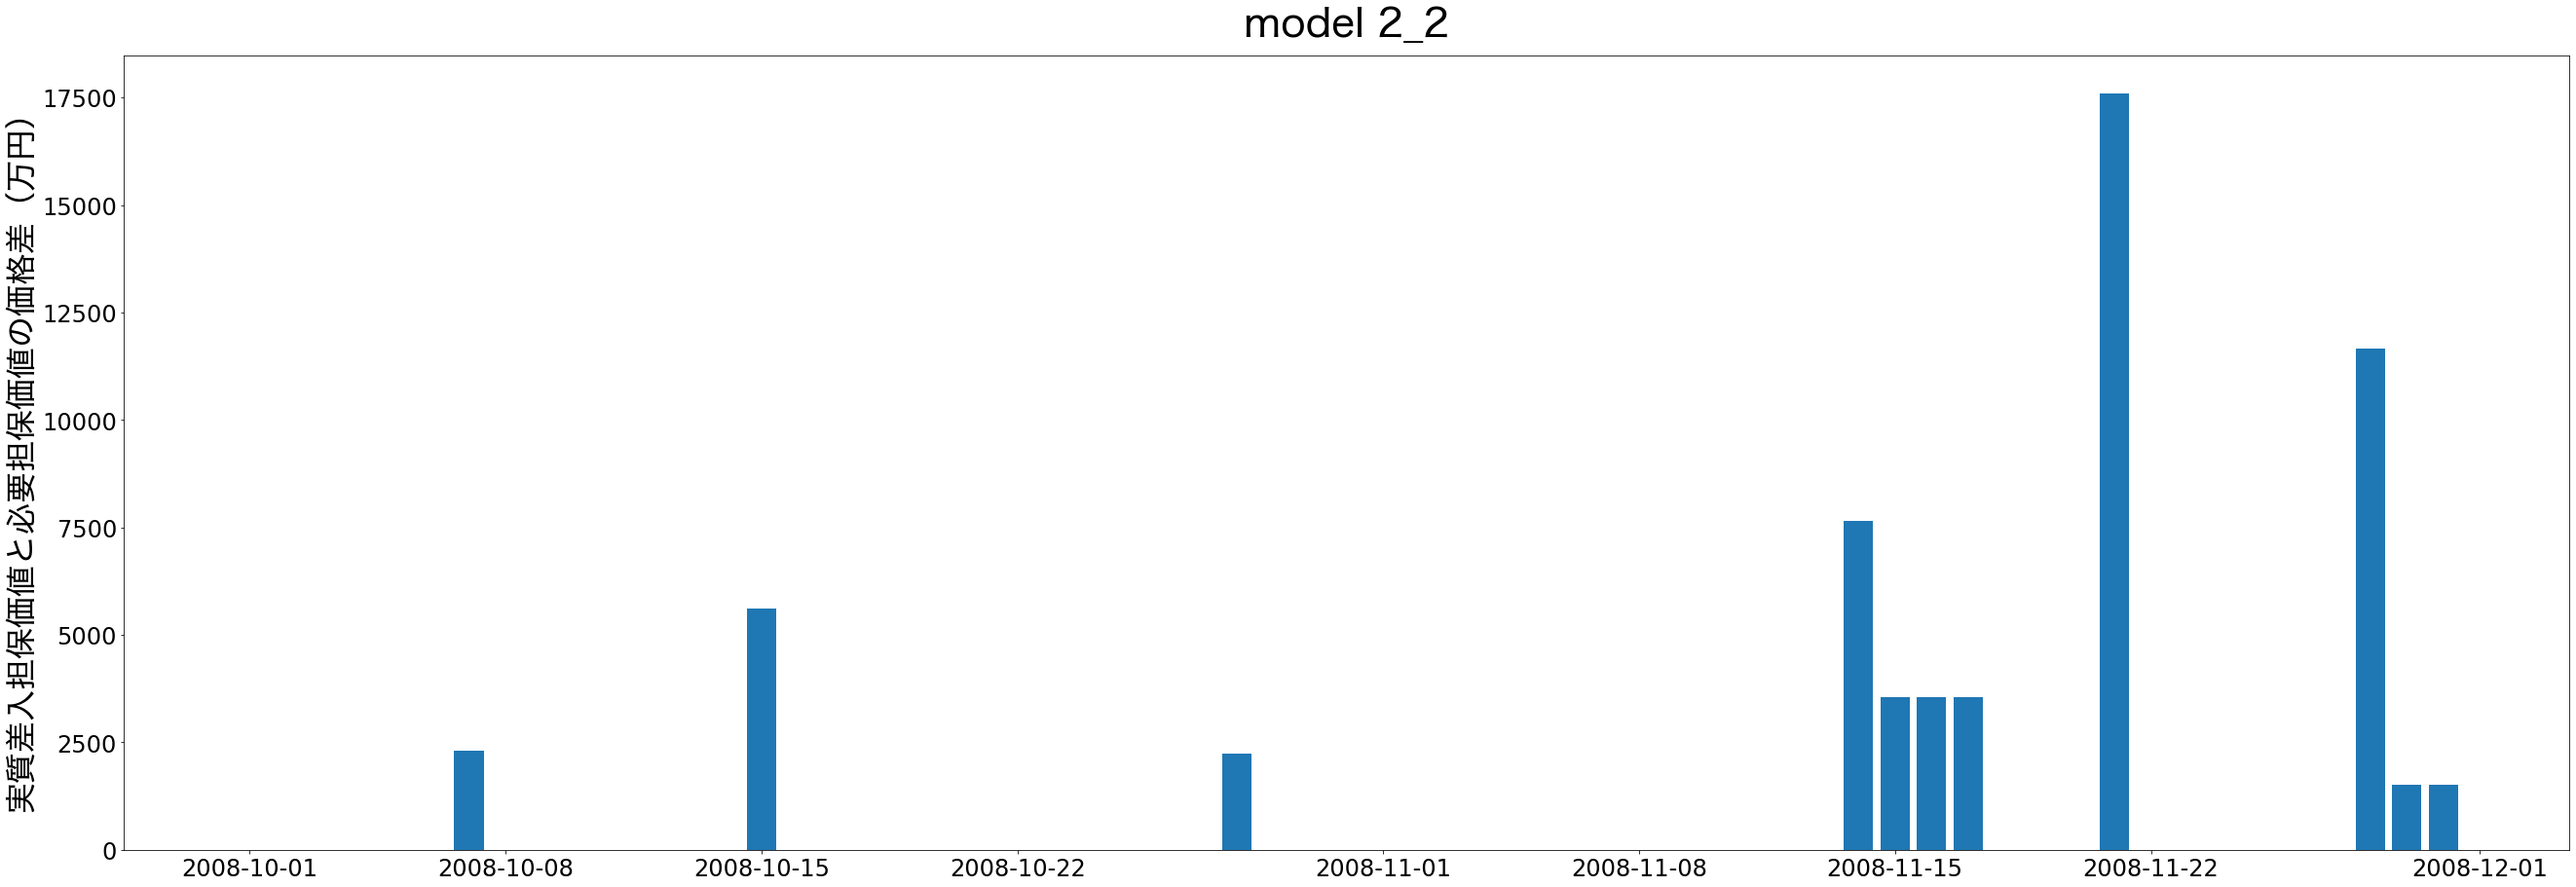

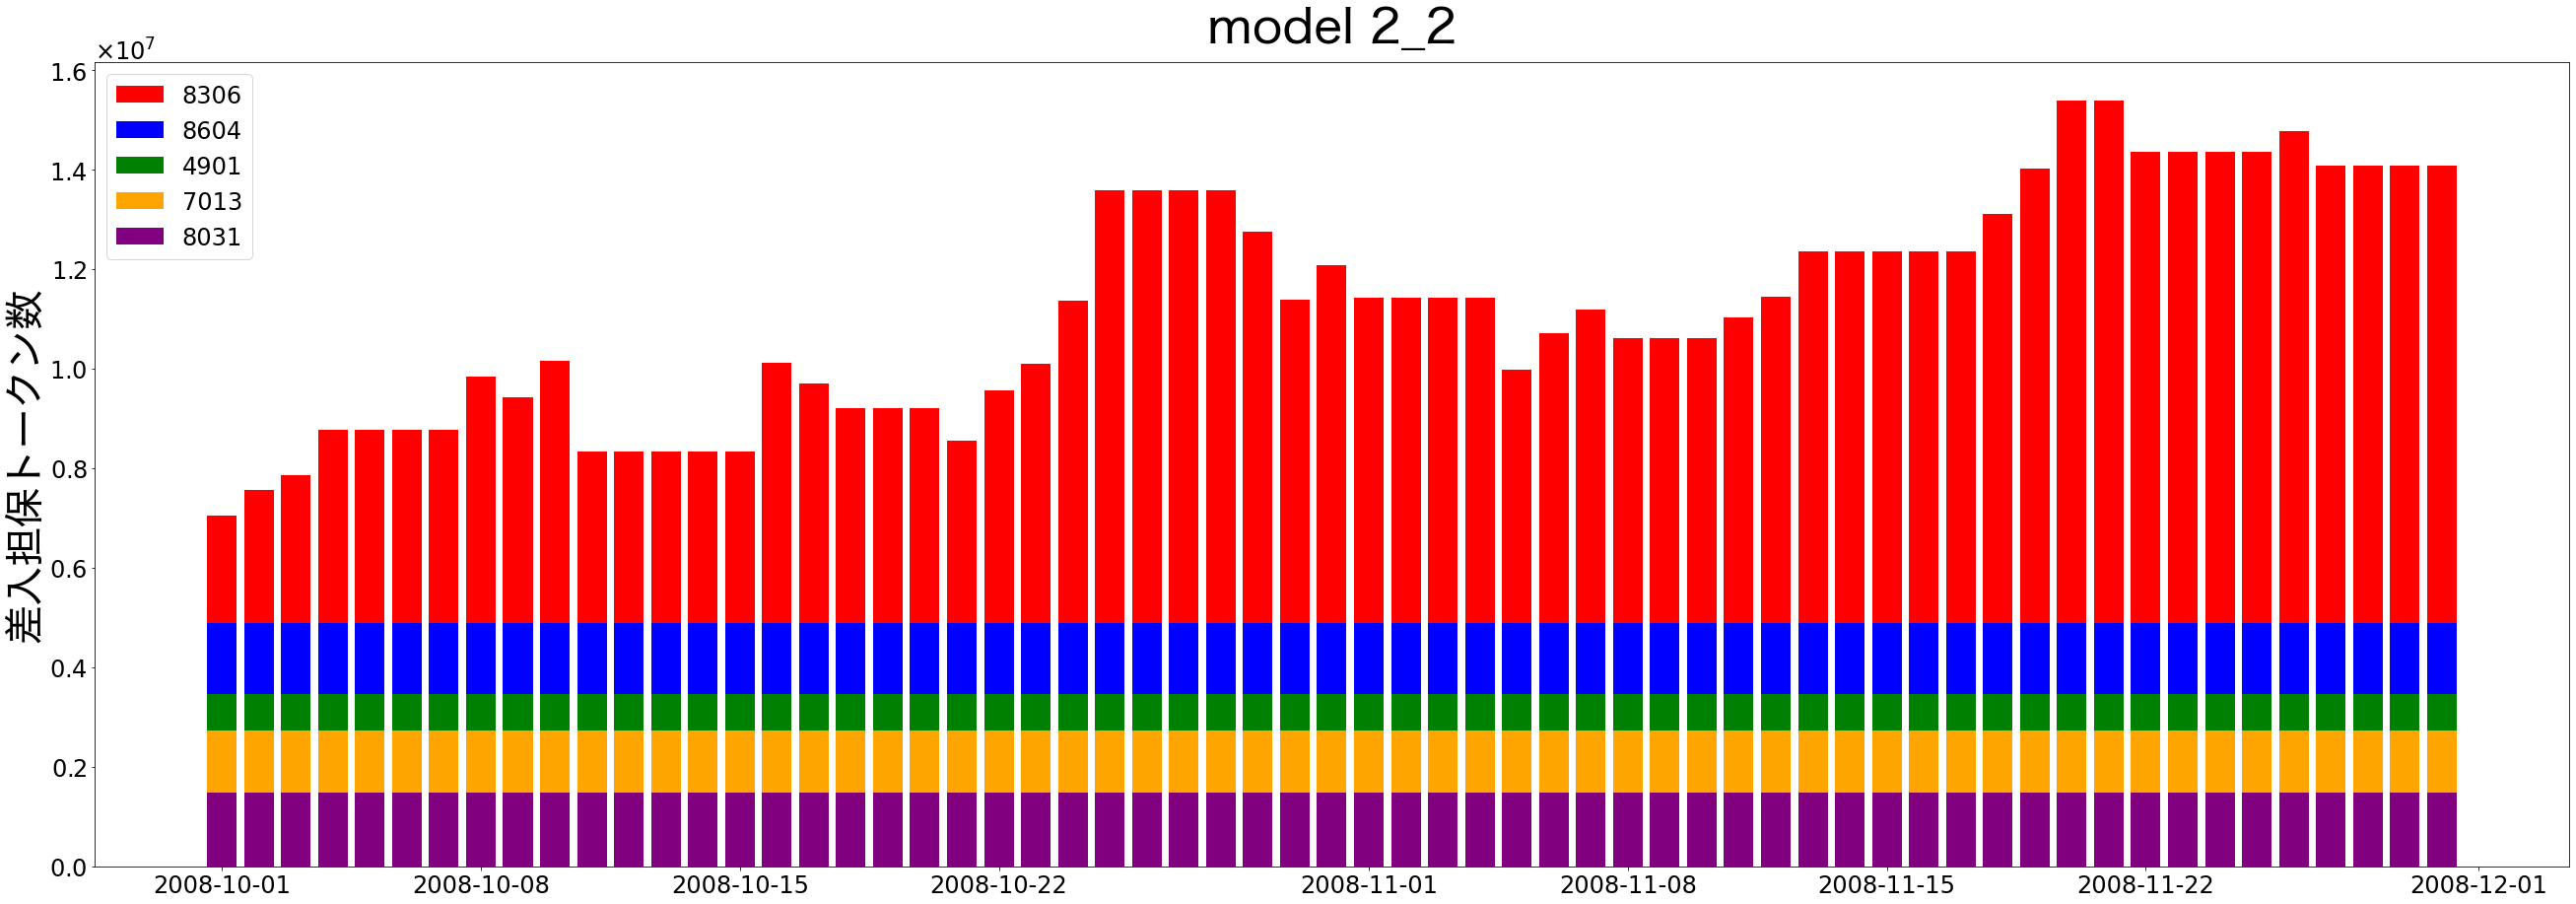

In [15]:
saved_logs_s2_m2_2 = np.load('./data0322/s2_m2_2.npy', allow_pickle=True).item()
visualizer_s2_m2_2 = LogVisualizer(saved_logs_s2_m2_2)
visualizer_s2_m2_2.bar_collateral_price_diff(title='model 2_2', is_decimal=True)
visualizer_s2_m2_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_2')
result_s2_m2_2 = visualizer_s2_m2_2.calc_price_diff_result()
diff_result_s2_m2_2 = visualizer_s2_m2_2.calc_token_diff()
diff_result_s2_m2_2
visualizer_s2_m2_2.calc_portfolio_credit_diff()

# saved_logs_s2_m2_2['lender_additional_issue'].count(True)
# saved_logs_s2_m2_2['has_done_margincall'].count(True)

#### model3-1

Log Visualizer initialized.


(314622870.21311474, 1484827450.0)

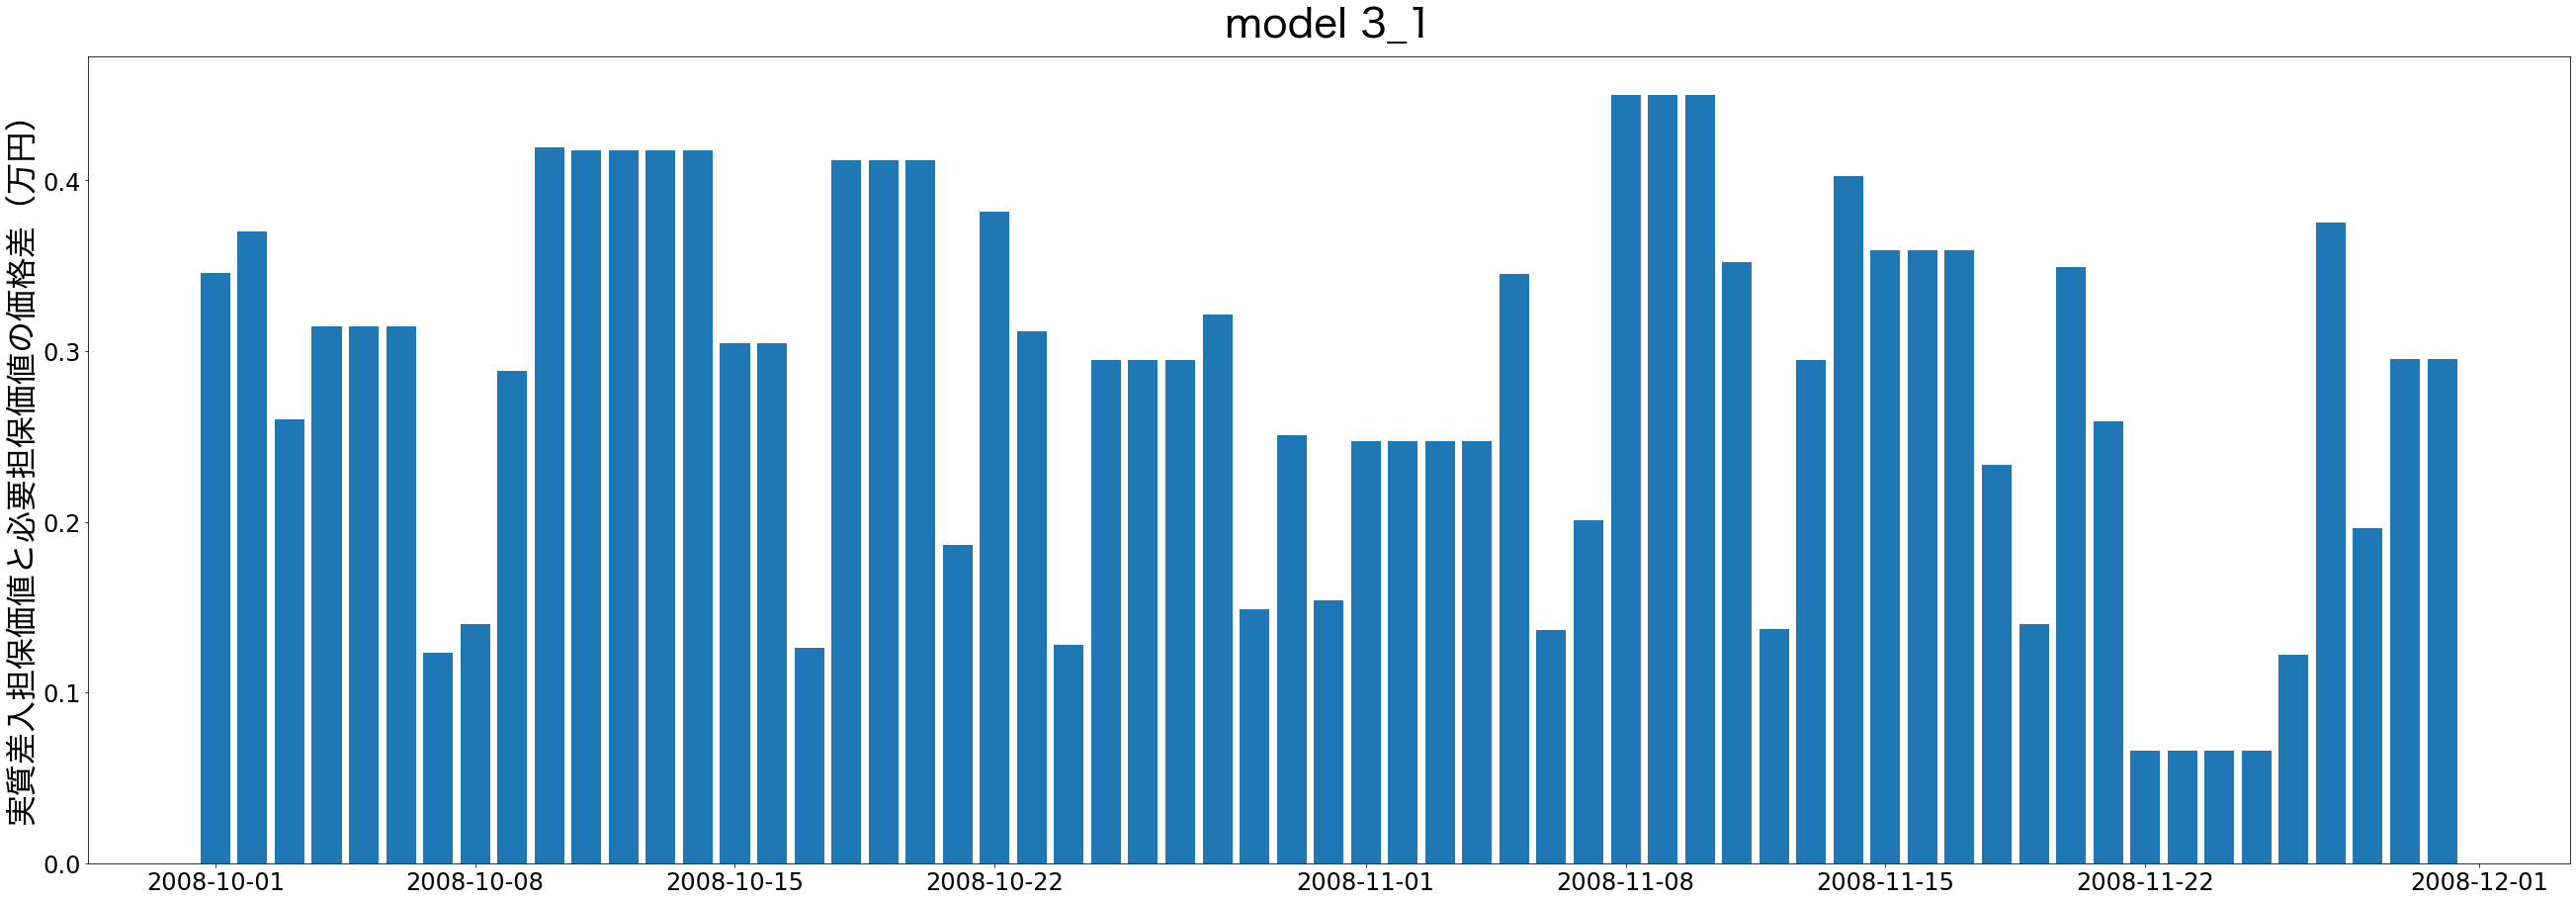

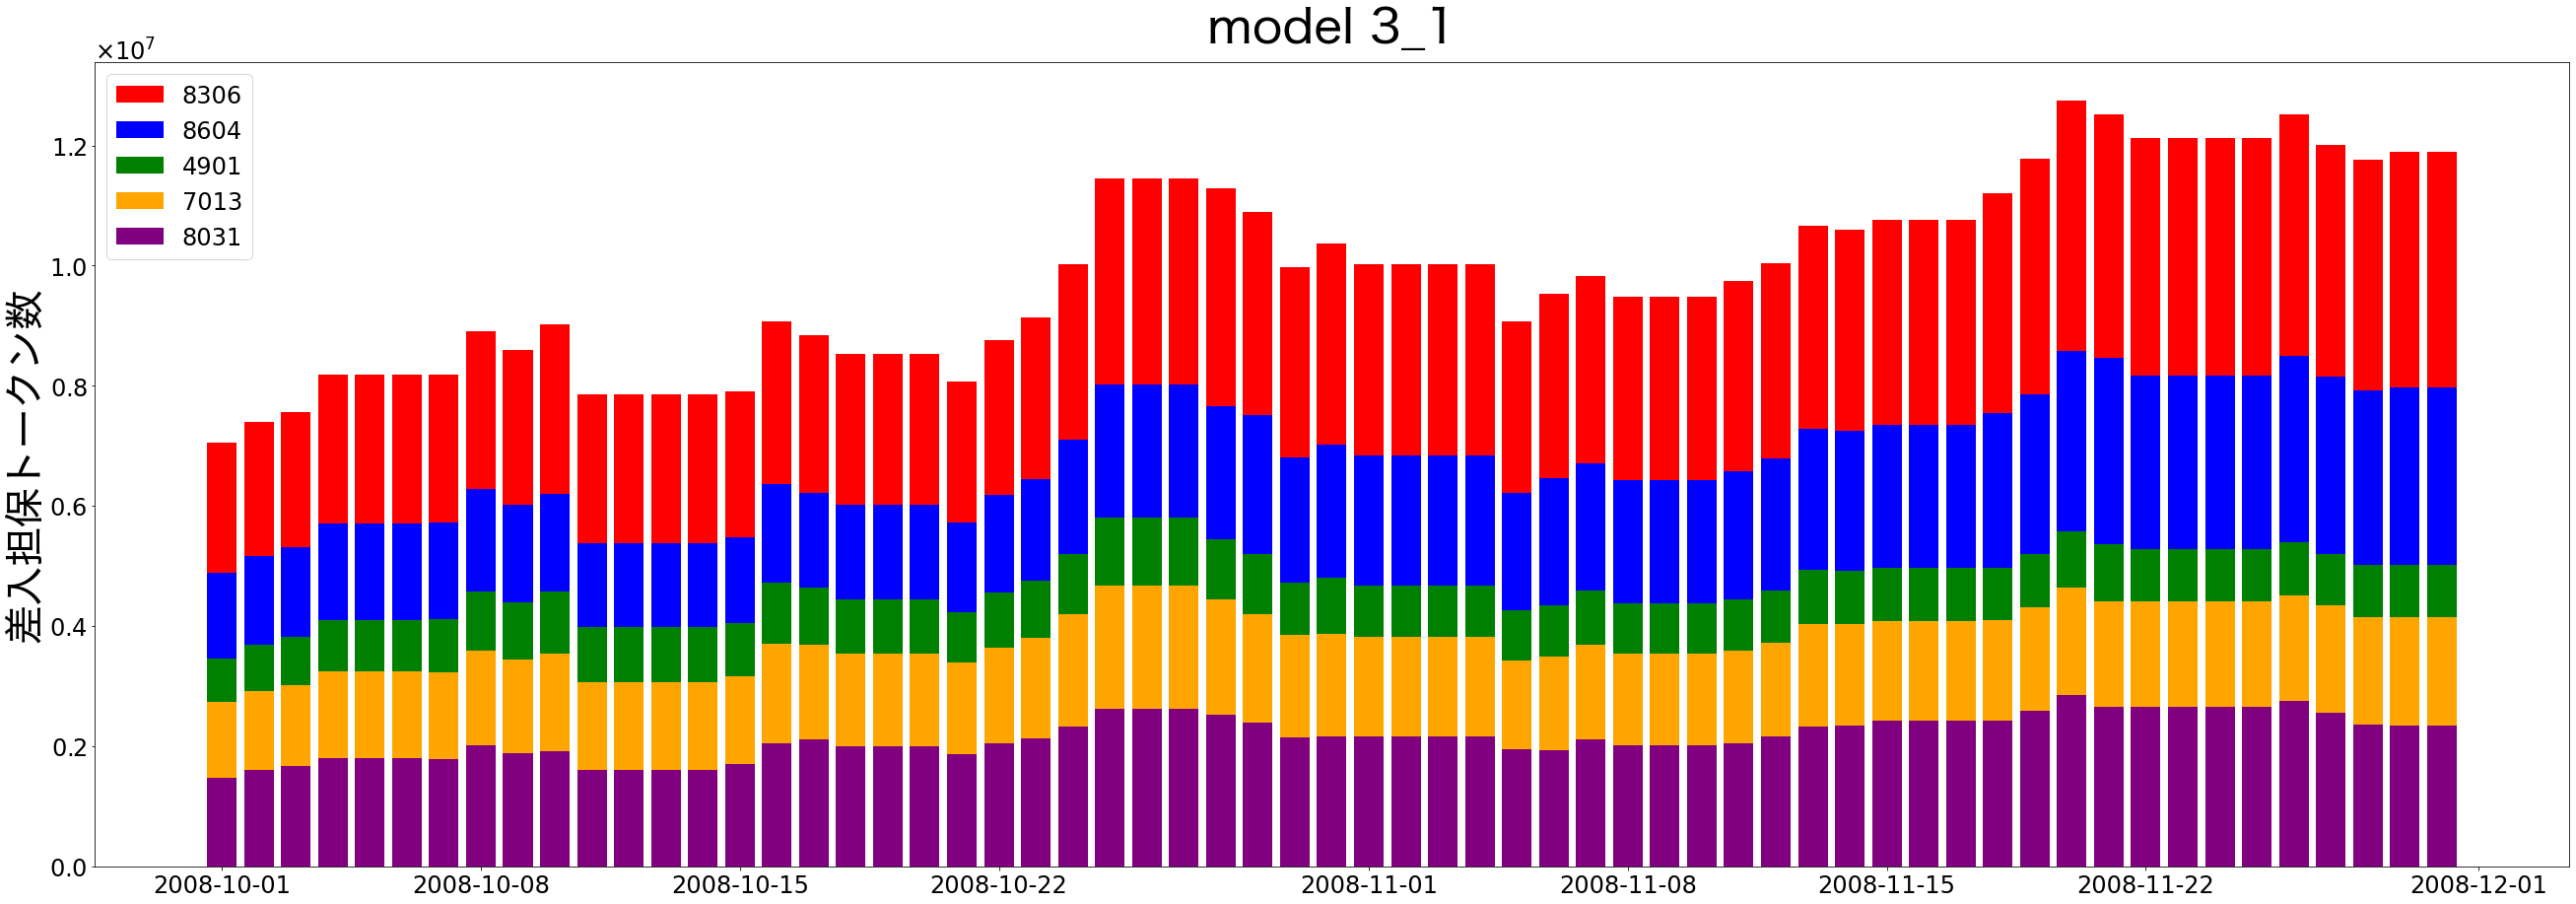

In [16]:
saved_logs_s2_m3_1 = np.load('./data0322/s2_m3_1.npy', allow_pickle=True).item()
visualizer_s2_m3_1 = LogVisualizer(saved_logs_s2_m3_1)
visualizer_s2_m3_1.bar_collateral_price_diff(title='model 3_1', is_decimal=True)
visualizer_s2_m3_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_1')
result_s2_m3_1 = visualizer_s2_m3_1.calc_price_diff_result()
diff_result_s2_m3_1 = visualizer_s2_m3_1.calc_token_diff()
diff_result_s2_m3_1
visualizer_s2_m3_1.calc_portfolio_credit_diff()

# saved_logs_s2_m3_1['lender_additional_issue'].count(True)
# saved_logs_s2_m3_1['has_done_margincall'].count(True)

#### model3-2

Log Visualizer initialized.


(320018300.6885246, 1484827450.0)

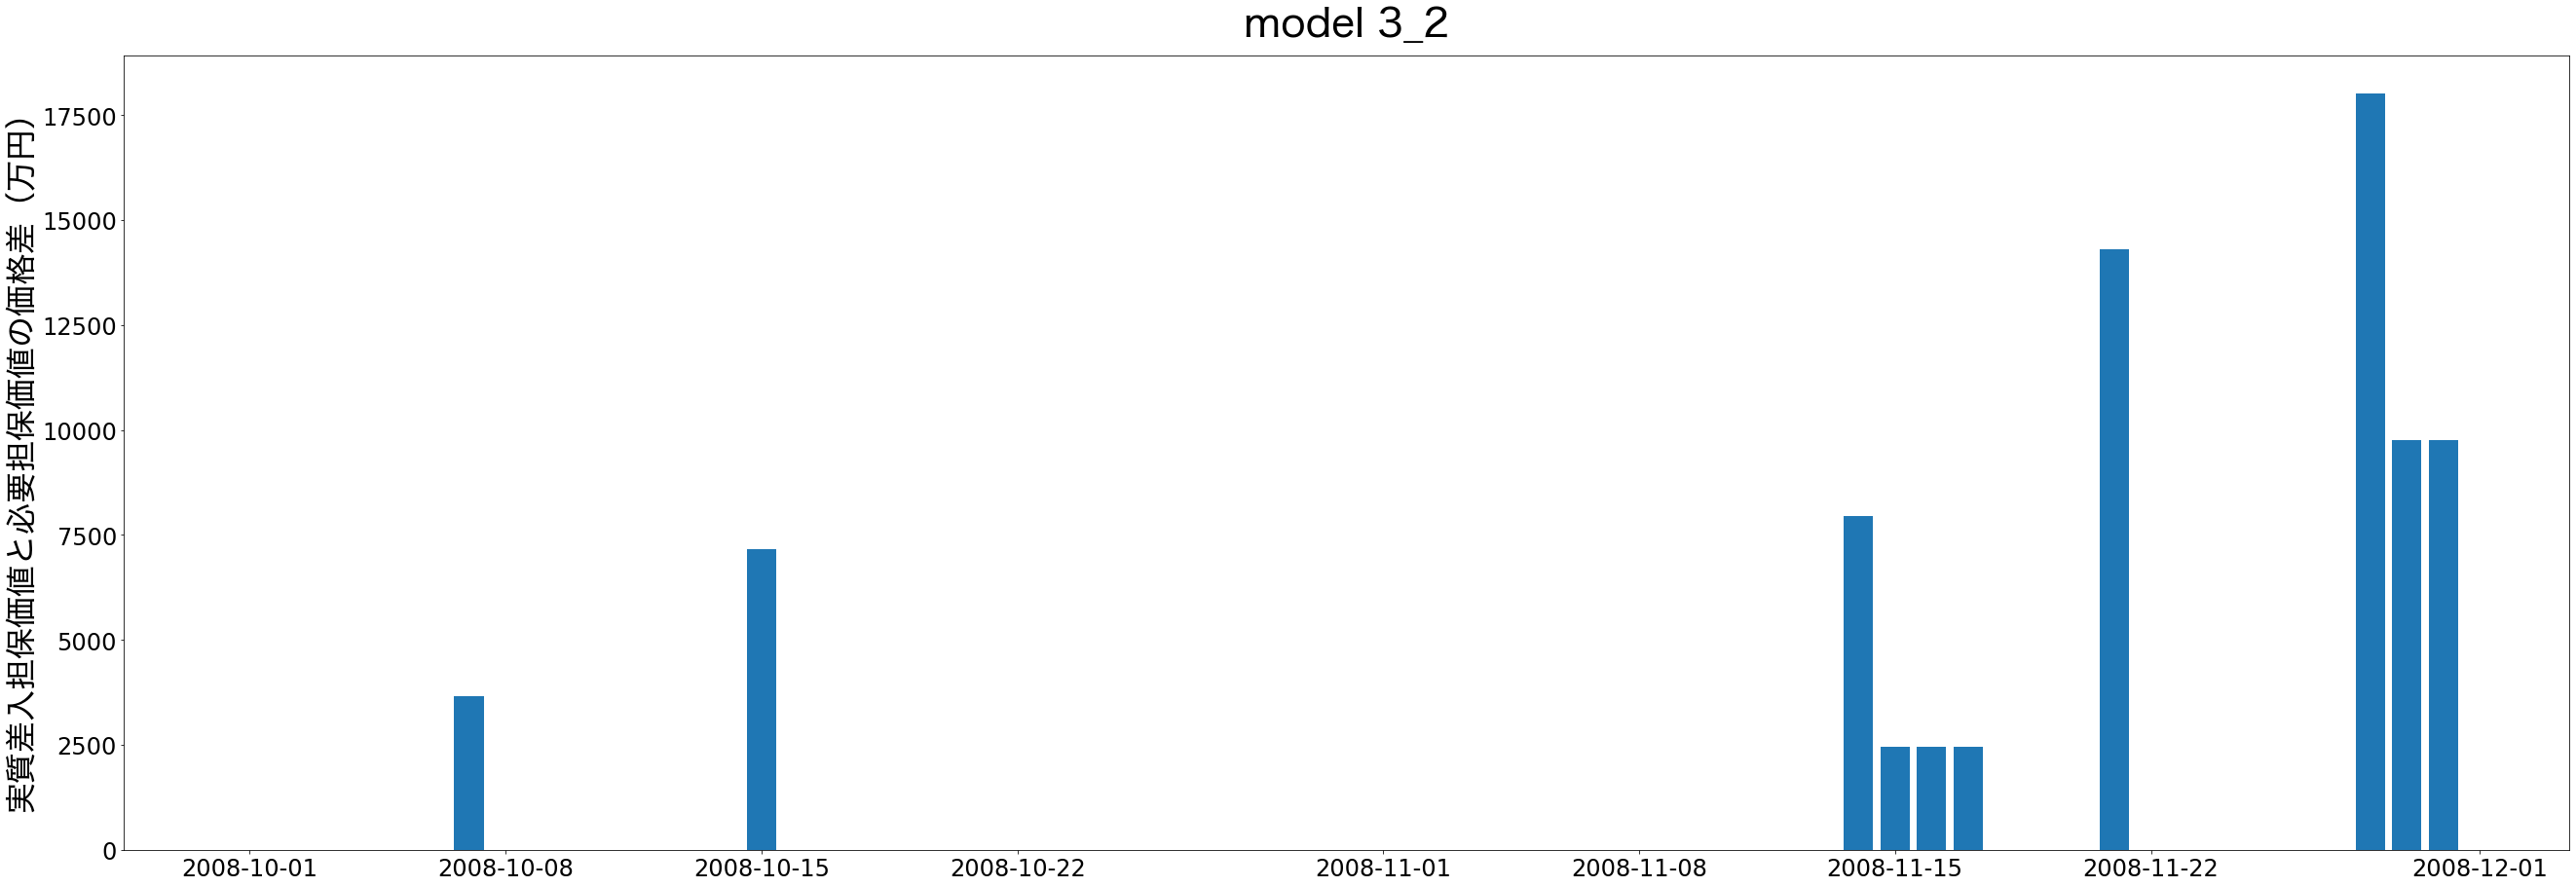

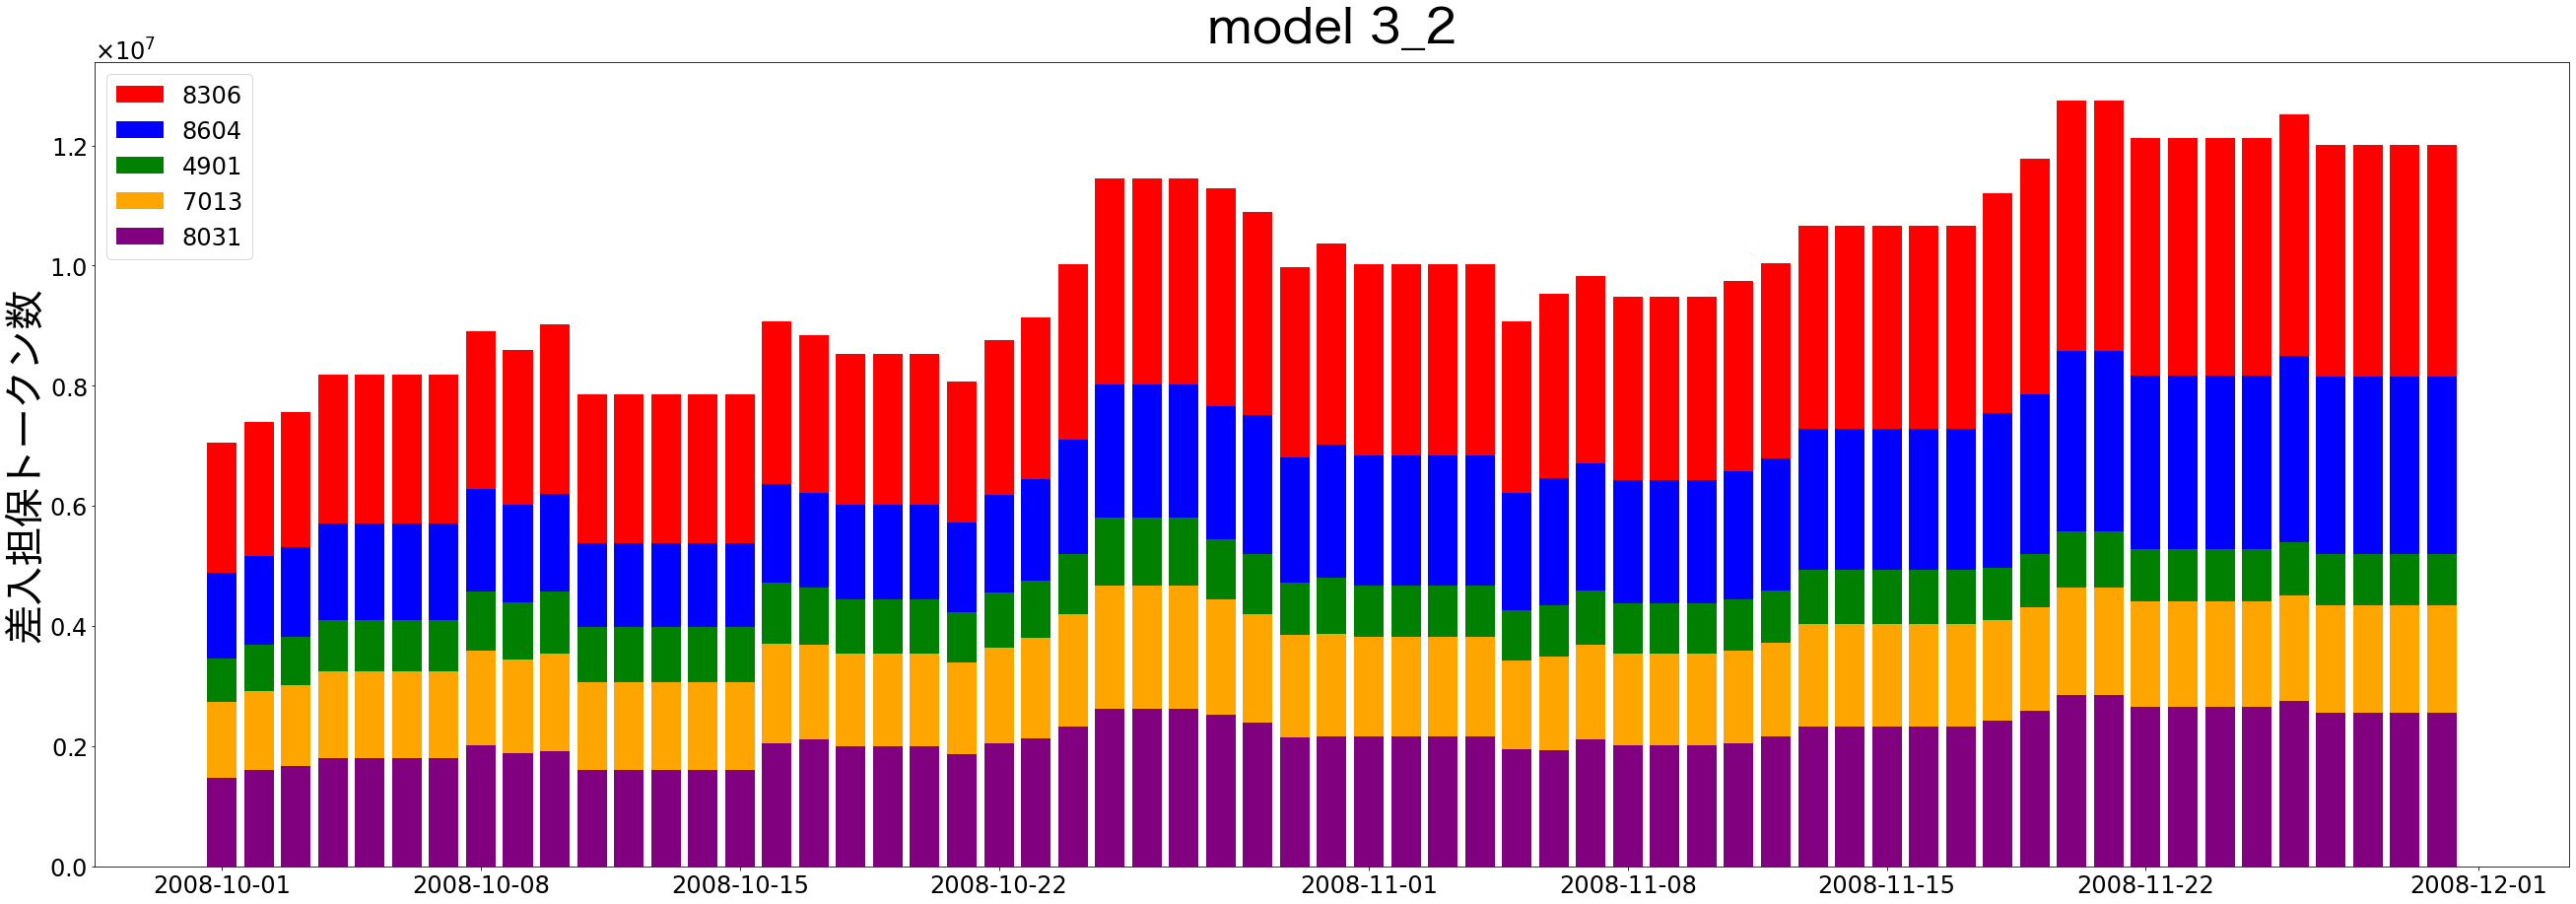

In [17]:
saved_logs_s2_m3_2 = np.load('./data0322/s2_m3_2.npy', allow_pickle=True).item()
visualizer_s2_m3_2 = LogVisualizer(saved_logs_s2_m3_2)
visualizer_s2_m3_2.bar_collateral_price_diff(title='model 3_2', is_decimal=True)
visualizer_s2_m3_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_2')
result_s2_m3_2 = visualizer_s2_m3_2.calc_price_diff_result()
diff_result_s2_m3_2 = visualizer_s2_m3_2.calc_token_diff()
diff_result_s2_m3_2
visualizer_s2_m3_2.calc_portfolio_credit_diff()

# saved_logs_s2_m3_2['lender_additional_issue'].count(True)
# saved_logs_s2_m3_2['has_done_margincall'].count(True)

#### 価格変動リスクケース間比較

In [ ]:
price_diff_log_lists_s2 = {
    'モデル0: 現行手続き': result_s2_m0['raw_data'],
    'モデル1: 単一トークン調整, マージンコール閾値β=0': result_s2_m1['raw_data'],
    'モデル2: 複数トークン調整, マージンコール閾値β=0': result_s2_m2['raw_data'],
    'モデル3: 単一トークン調整, マージンコール閾値β=0.02': result_s2_m3['raw_data'],
    'モデル4: 複数トークン調整, マージンコール閾値β=0.02': result_s2_m4['raw_data'],
}

date_list_s2 = saved_logs_s2_m0['date']

In [ ]:
plt_all_price_diff(date_list_s2, price_diff_log_lists_s2, 's2')

### シナリオ3

#### model1-1

Log Visualizer initialized.


(207733380.0, 816326072.0)

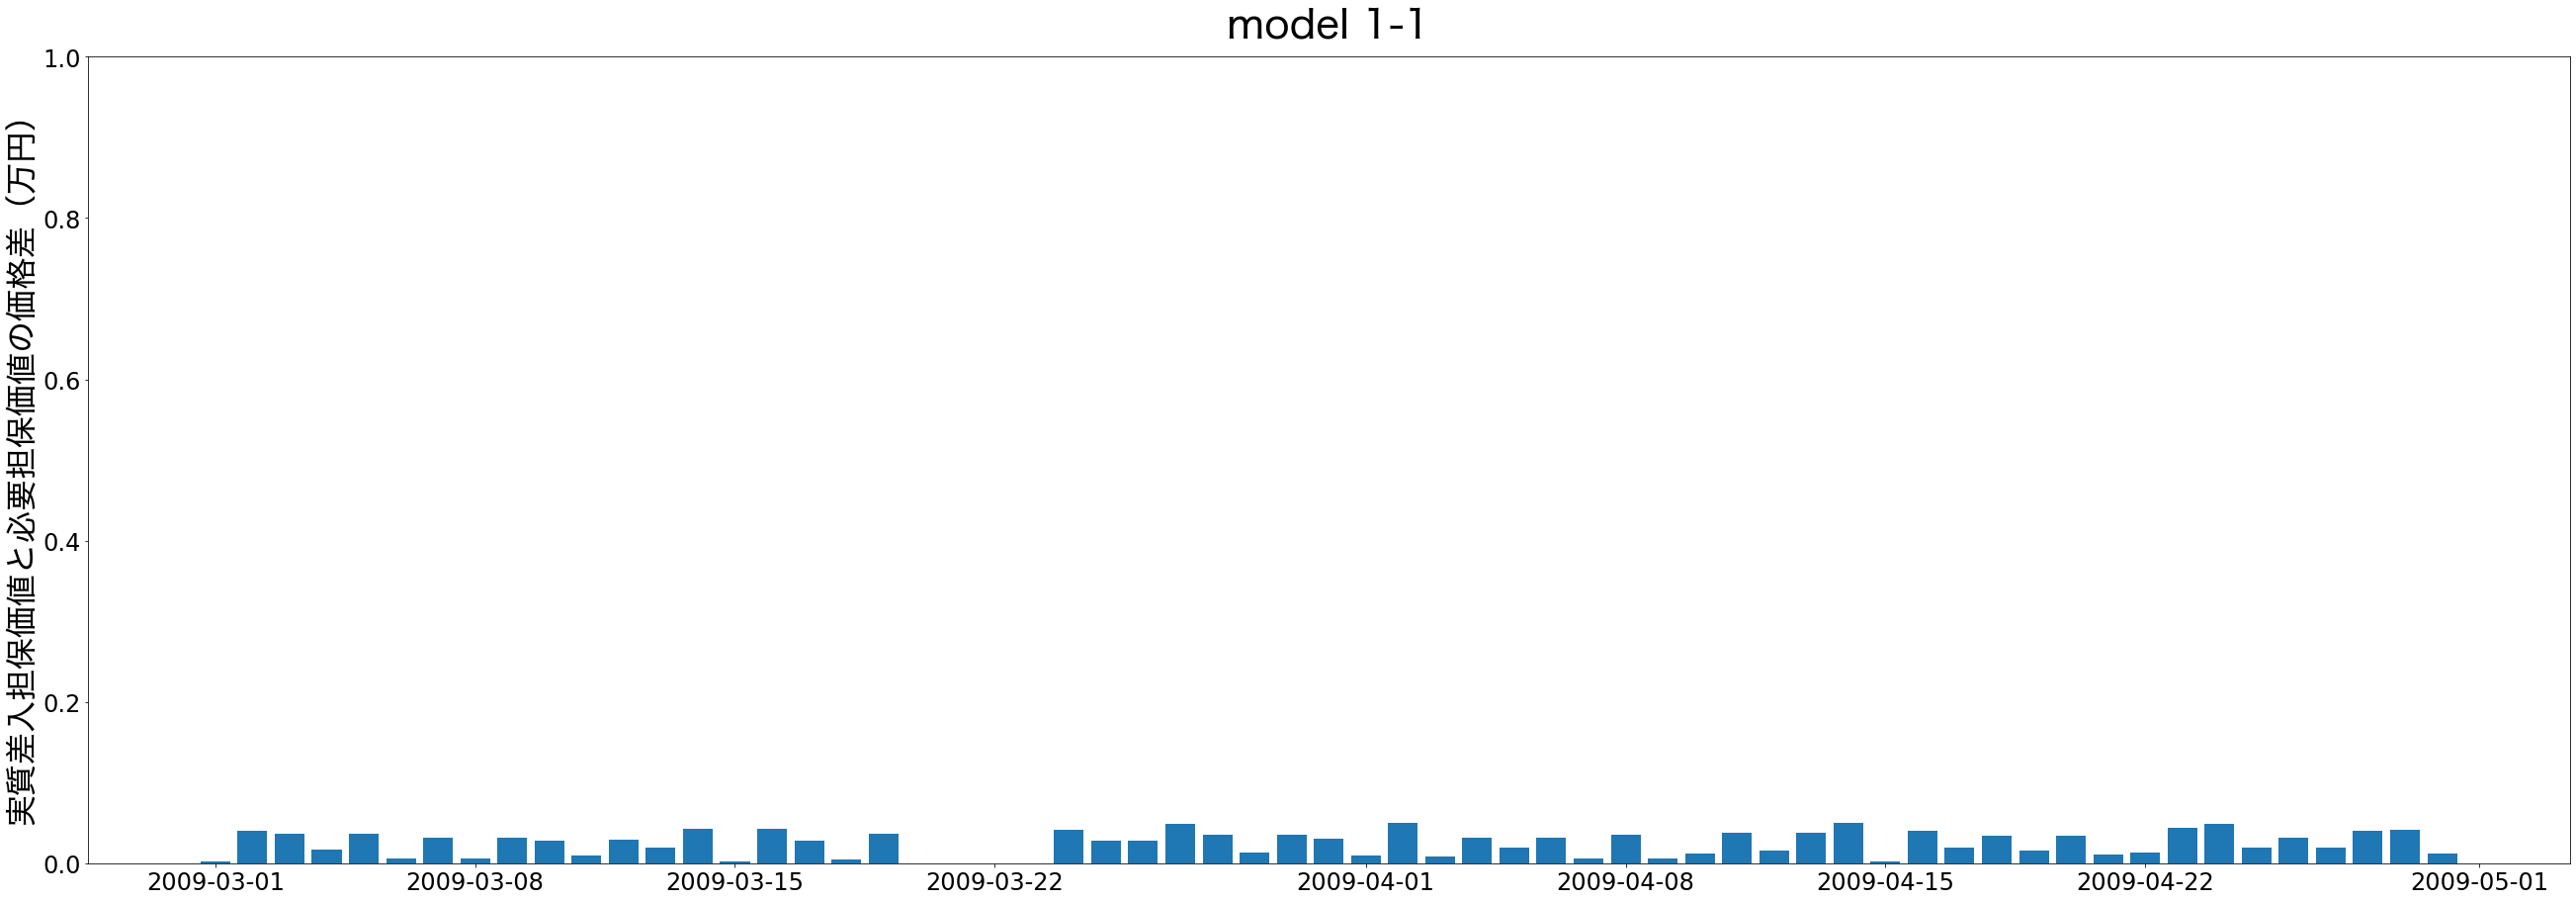

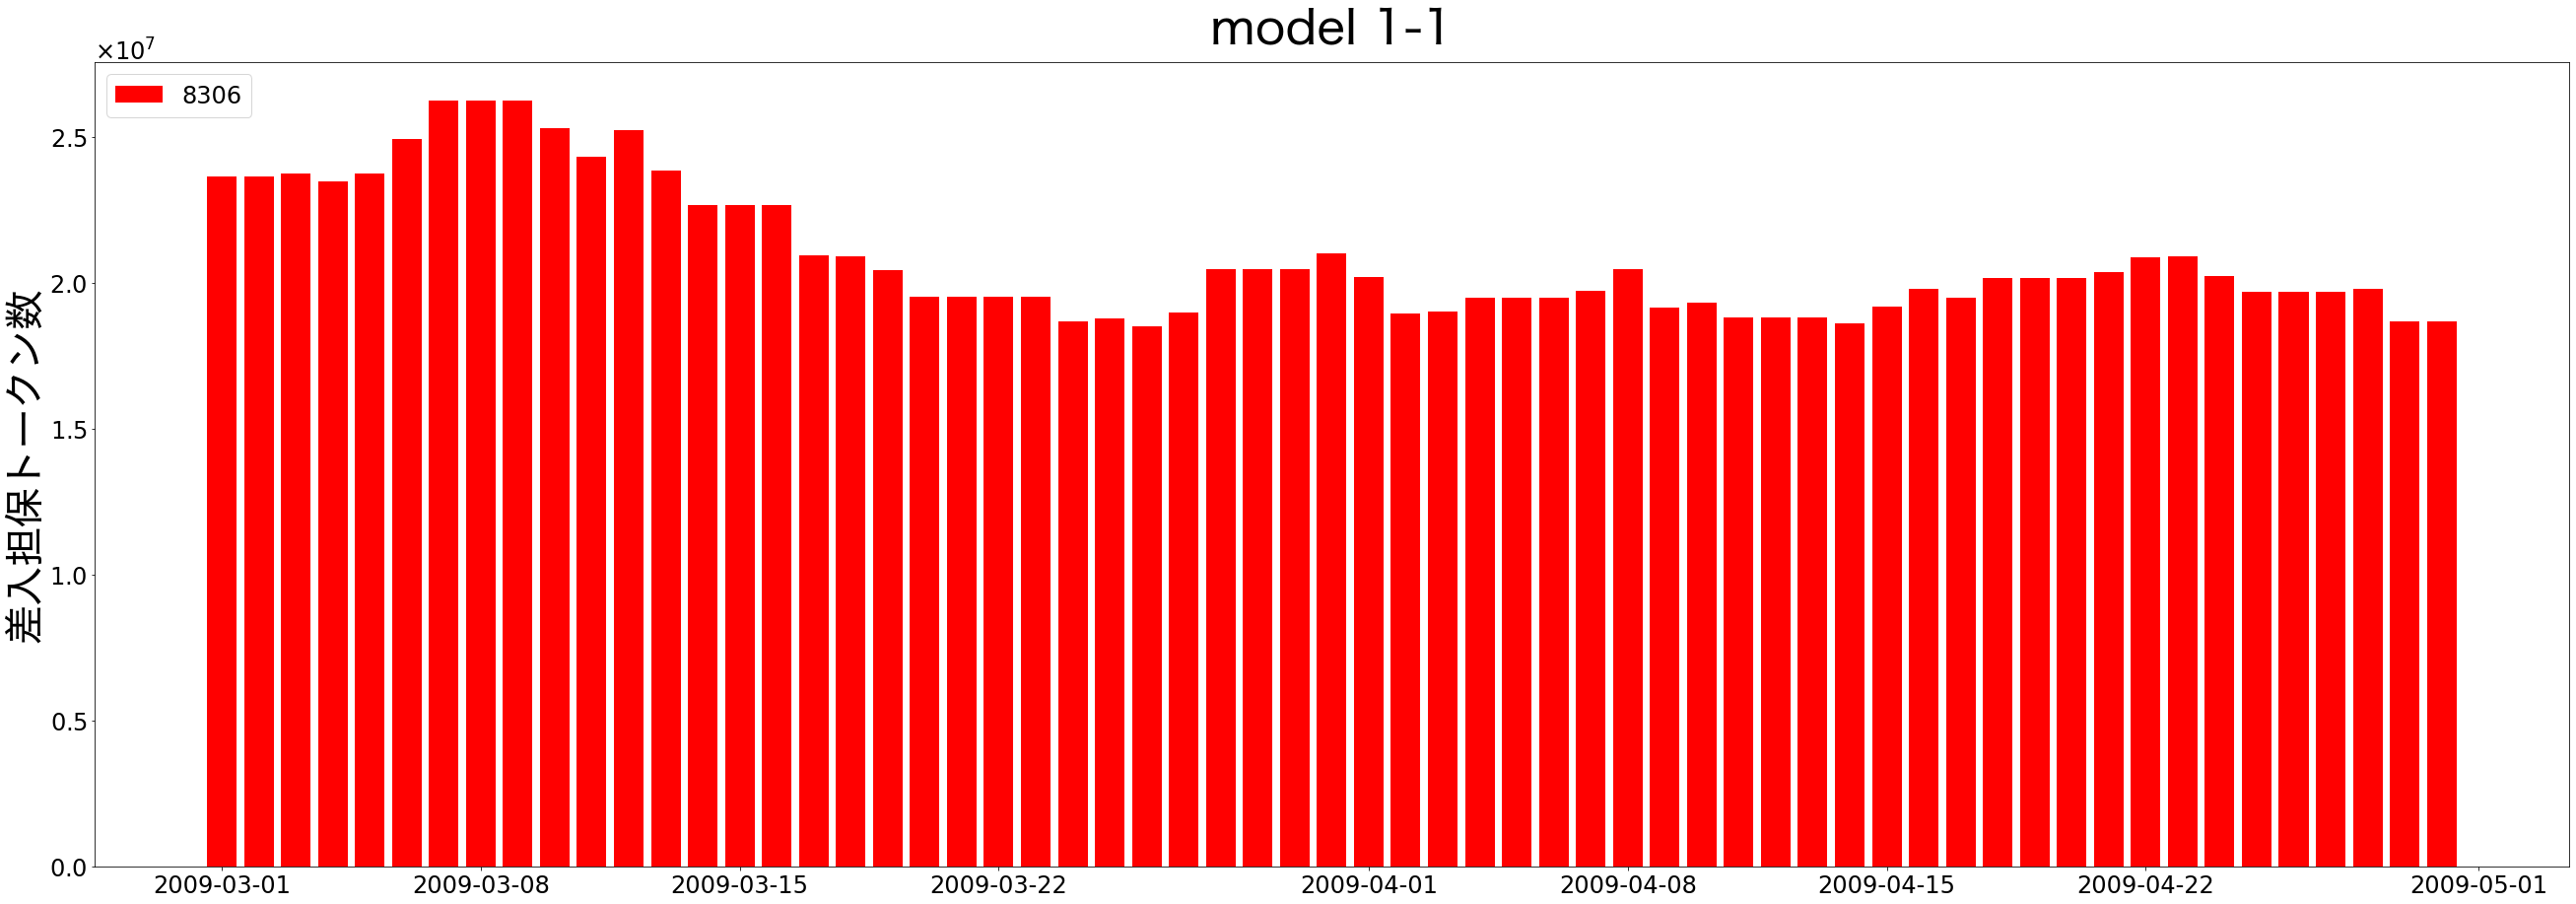

In [18]:
saved_logs_s3_m1_1 = np.load('./data0322/s3_m1_1.npy', allow_pickle=True).item()
visualizer_s3_m1_1 = LogVisualizer(saved_logs_s3_m1_1)
visualizer_s3_m1_1.bar_collateral_price_diff(1, title='model 1-1', is_decimal=True)
visualizer_s3_m1_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-1')
result_s3_m1_1 = visualizer_s3_m1_1.calc_price_diff_result()
diff_result_s3_m1_1 = visualizer_s3_m1_1.calc_token_diff()
diff_result_s3_m1_1
visualizer_s3_m1_1.calc_portfolio_credit_diff()

# saved_logs_s3_m1_1['lender_additional_issue'].count(True)
# saved_logs_s3_m1_1['has_done_margincall'].count(True)

#### model1-2

Log Visualizer initialized.


(220926299.40983605, 878505056.0)

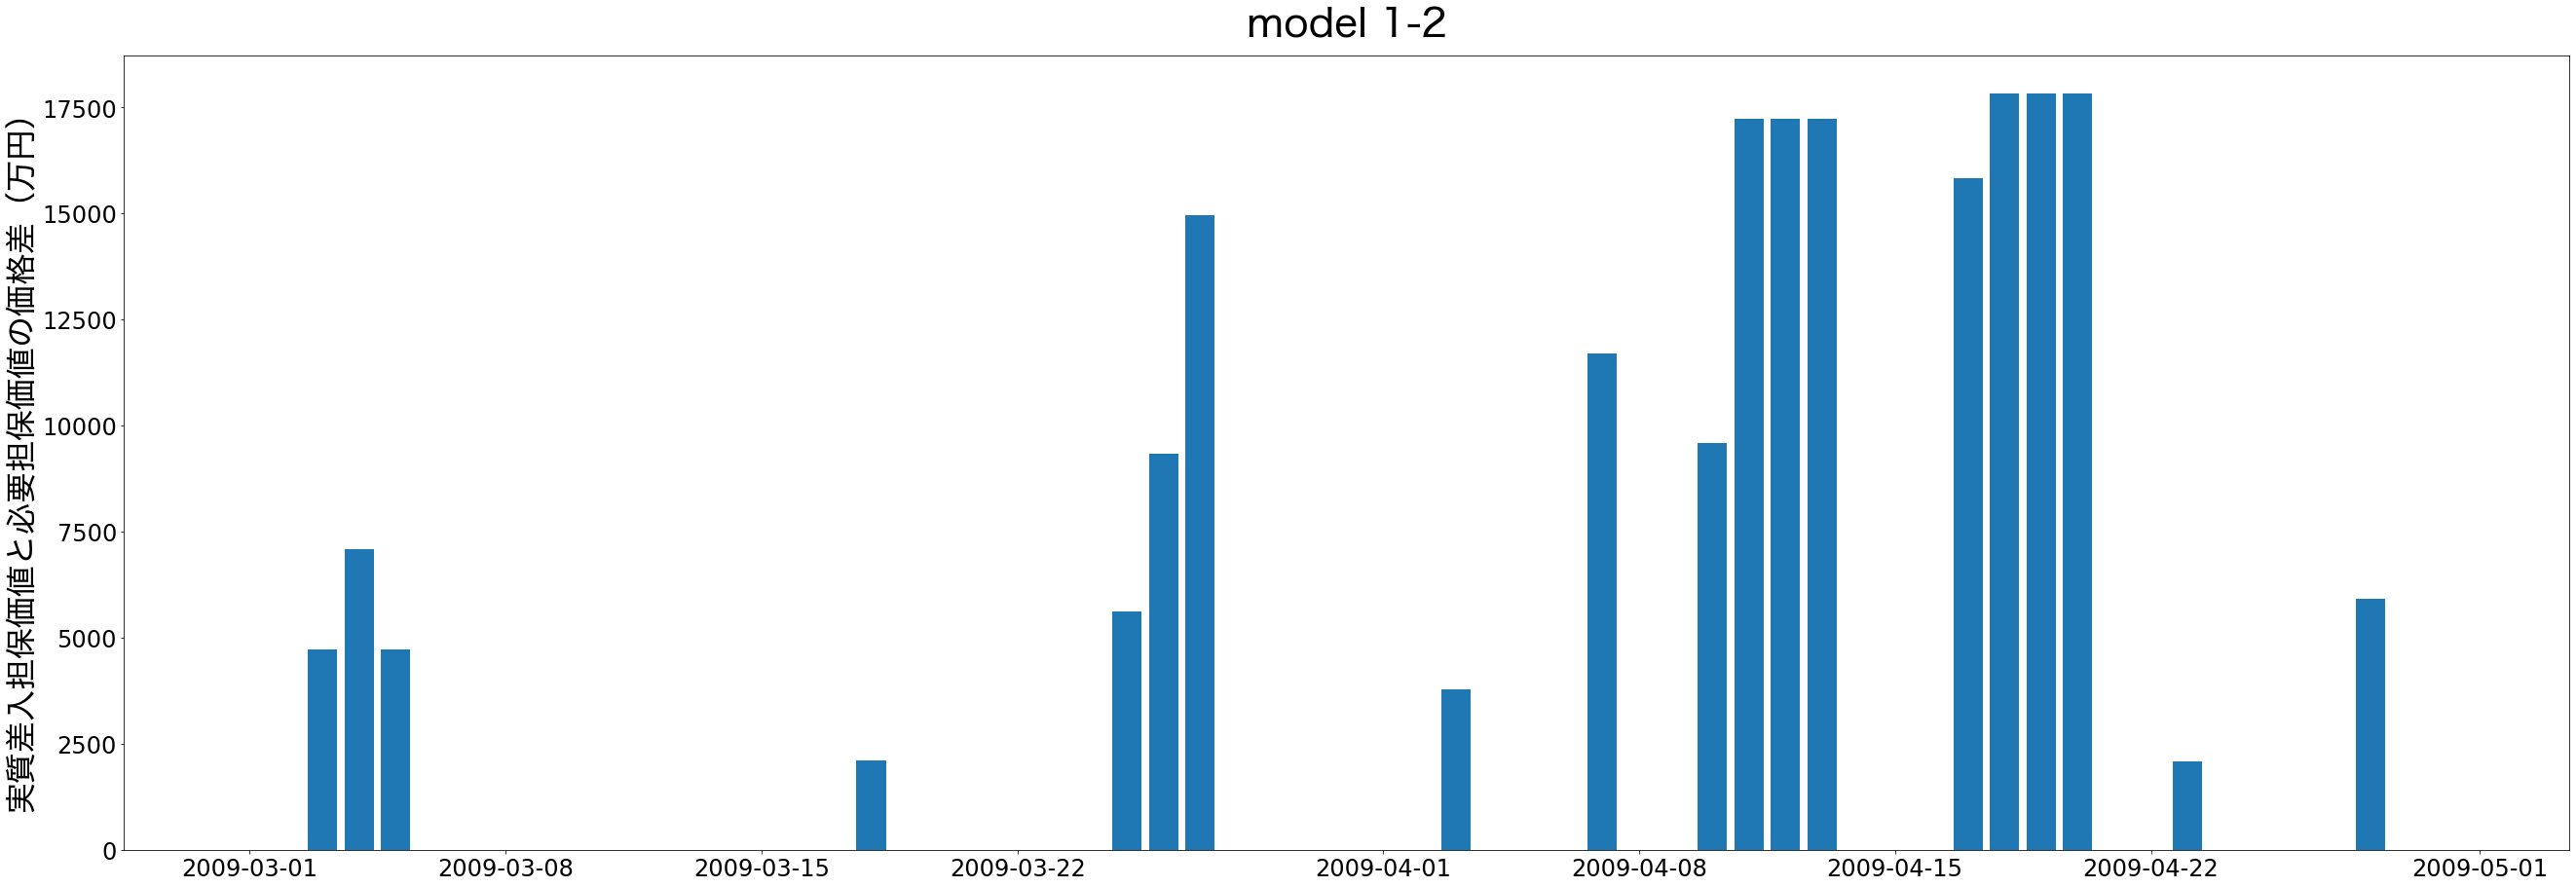

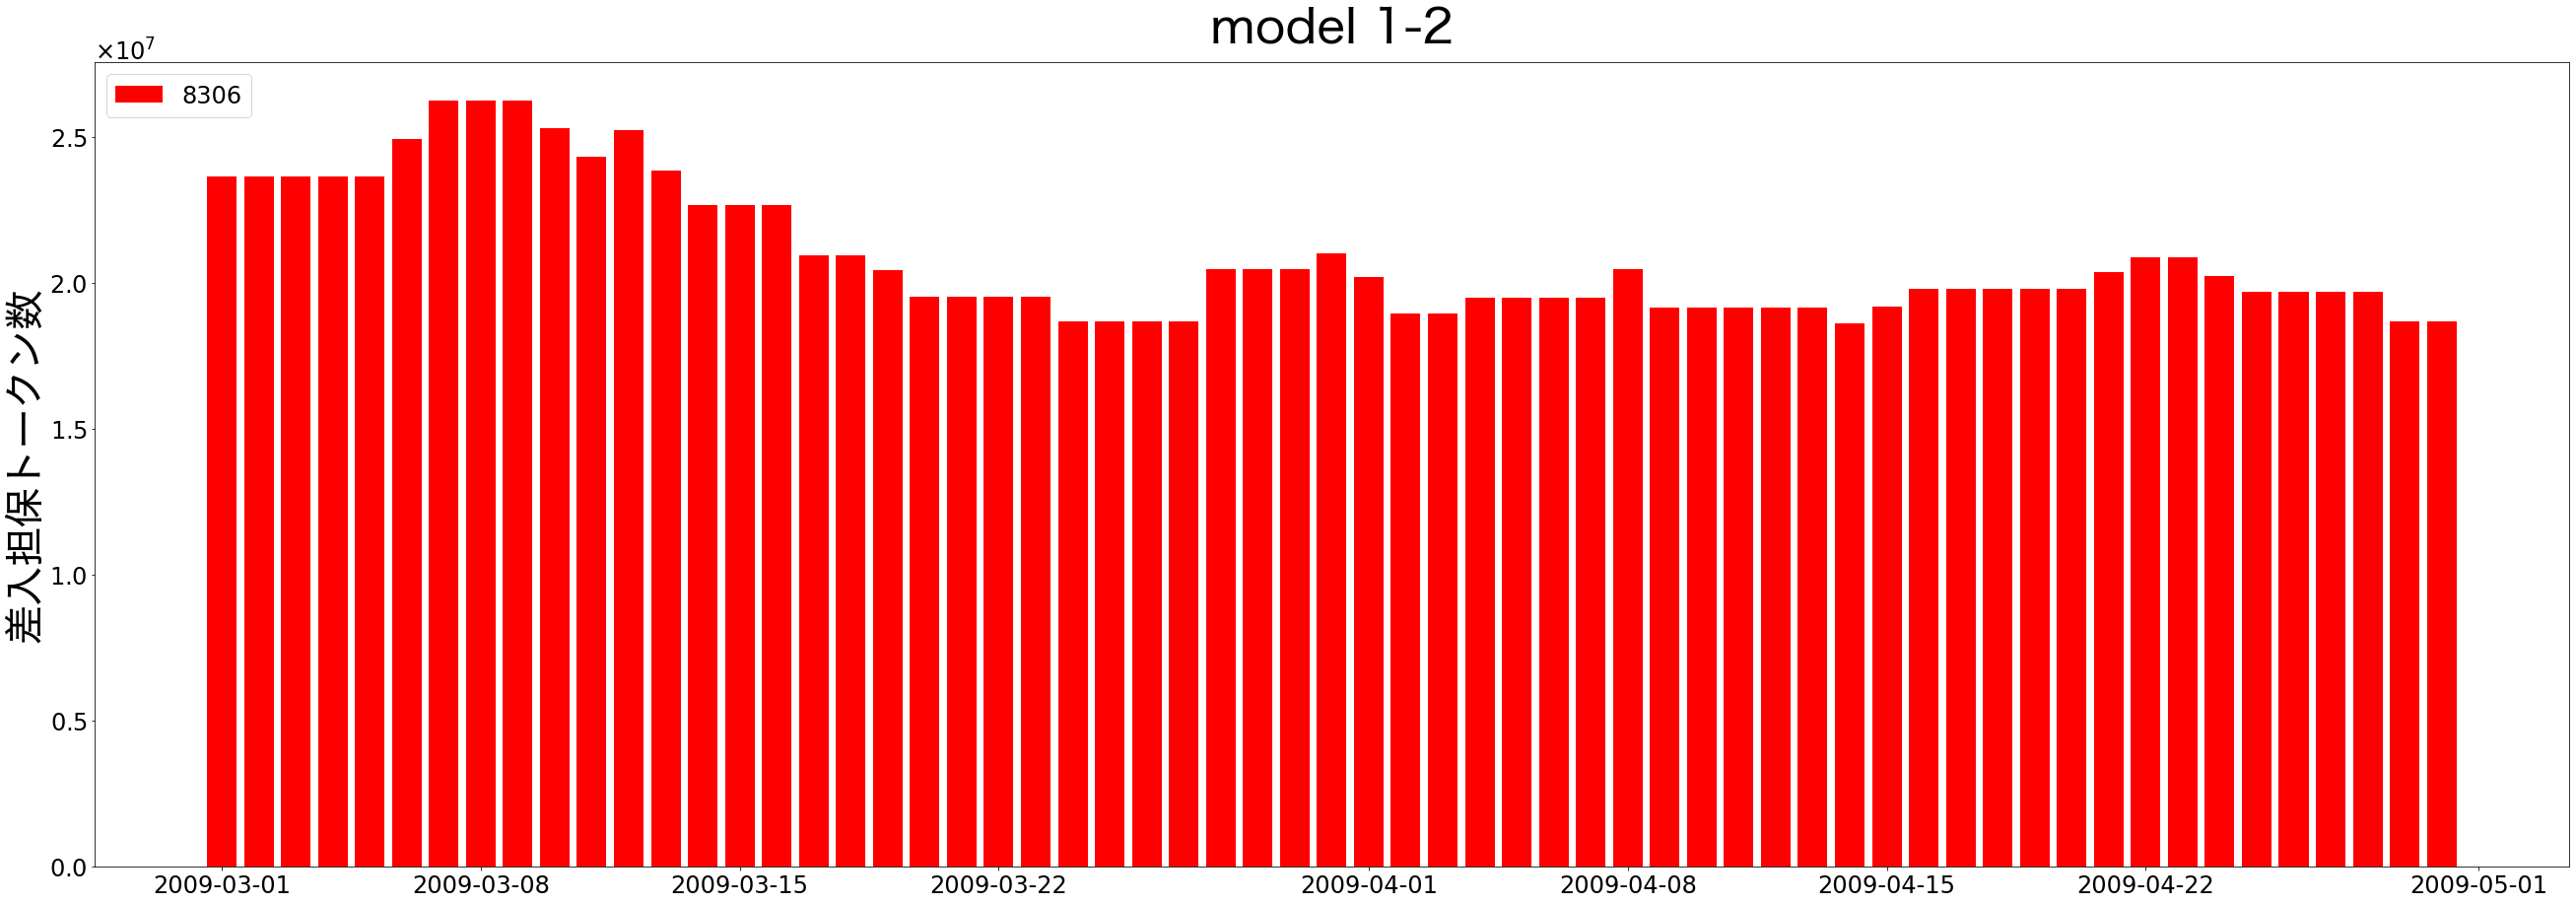

In [19]:
saved_logs_s3_m1_2 = np.load('./data0322/s3_m1_2.npy', allow_pickle=True).item()
visualizer_s3_m1_2 = LogVisualizer(saved_logs_s3_m1_2)
visualizer_s3_m1_2.bar_collateral_price_diff(title='model 1-2', is_decimal=True)
visualizer_s3_m1_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-2')
result_s3_m1_2 = visualizer_s3_m1_2.calc_price_diff_result()
diff_result_s3_m1_2 = visualizer_s3_m1_2.calc_token_diff()
diff_result_s3_m1_2
visualizer_s3_m1_2.calc_portfolio_credit_diff()

# saved_logs_s3_m1_2['lender_additional_issue'].count(True)
# saved_logs_s3_m1_2['has_done_margincall'].count(True)

#### model2-1

Log Visualizer initialized.


(168326172.44262296, 904522883.0)

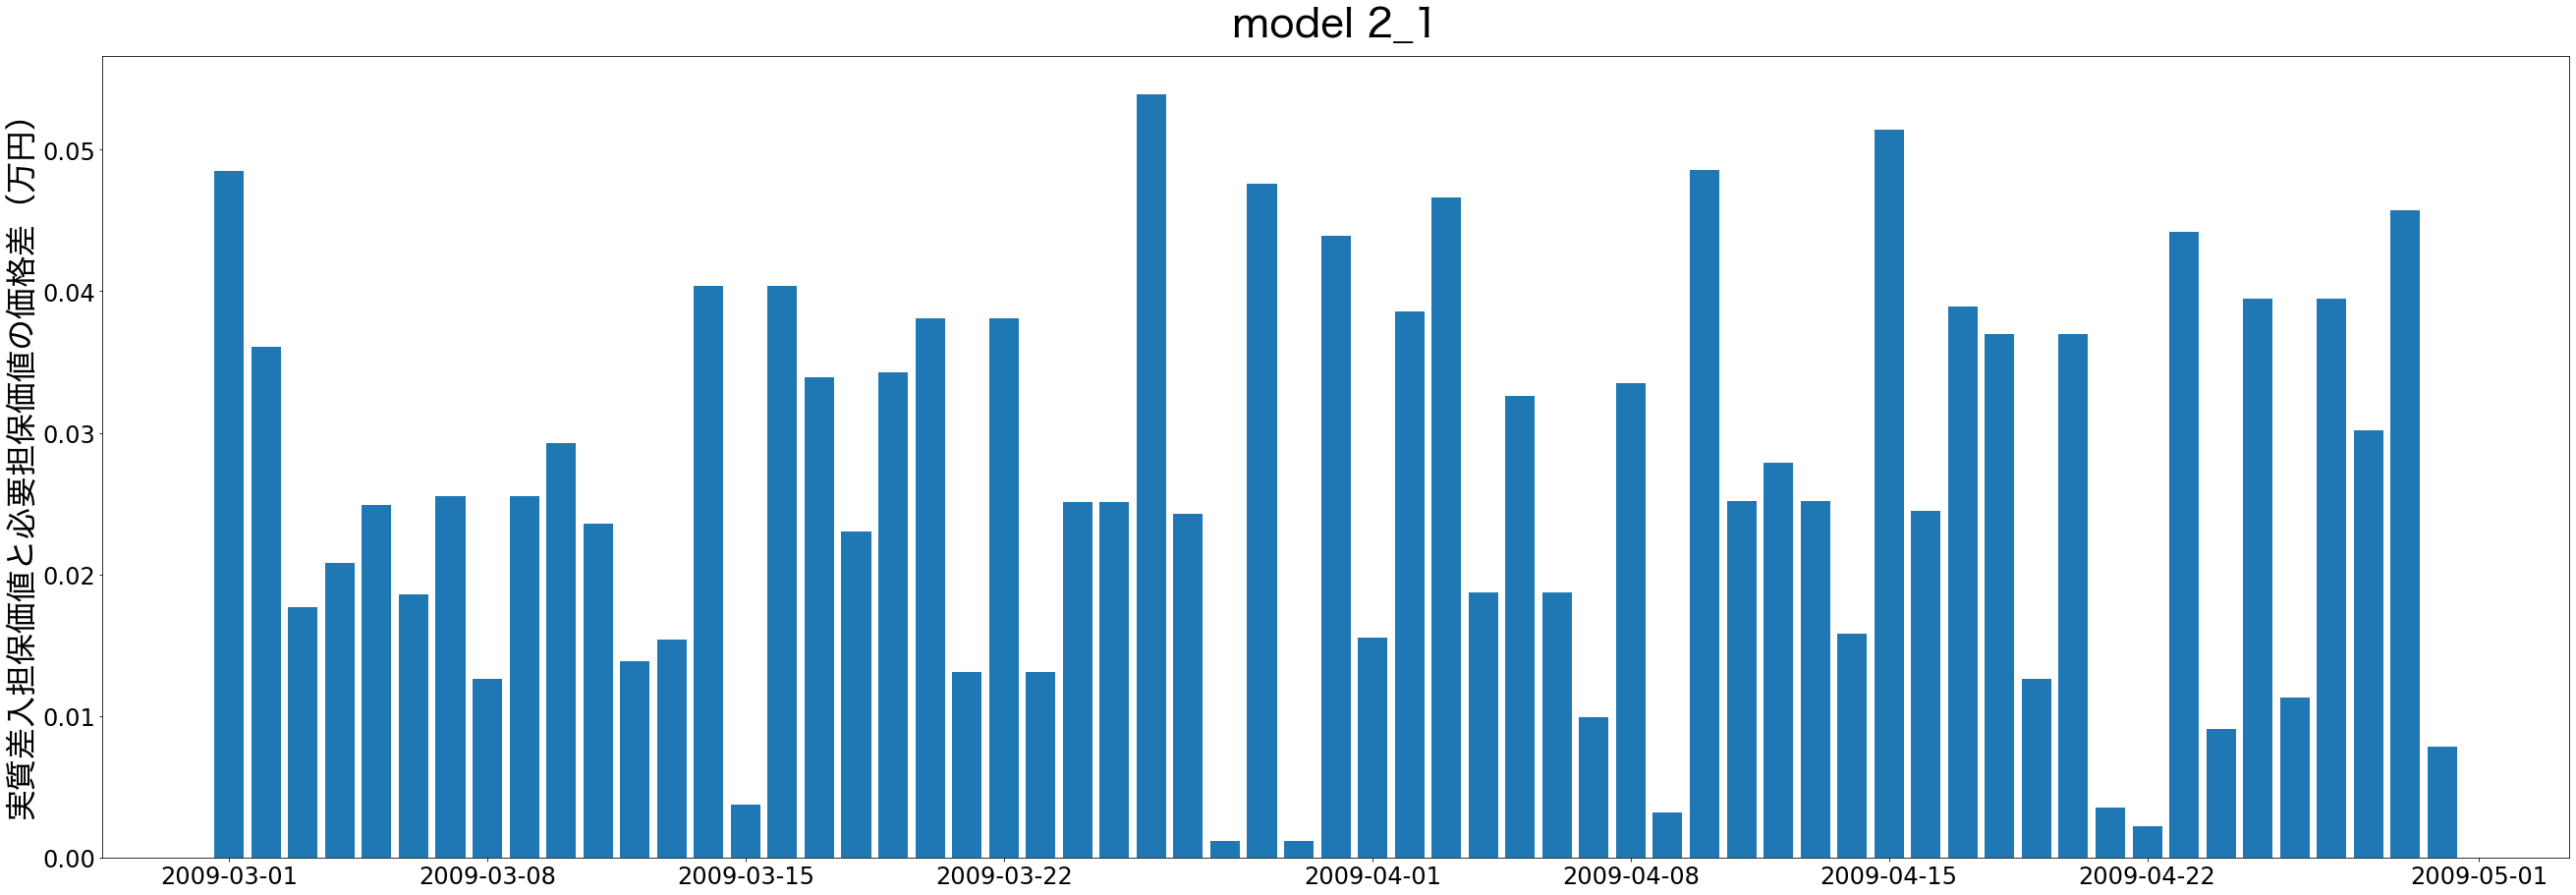

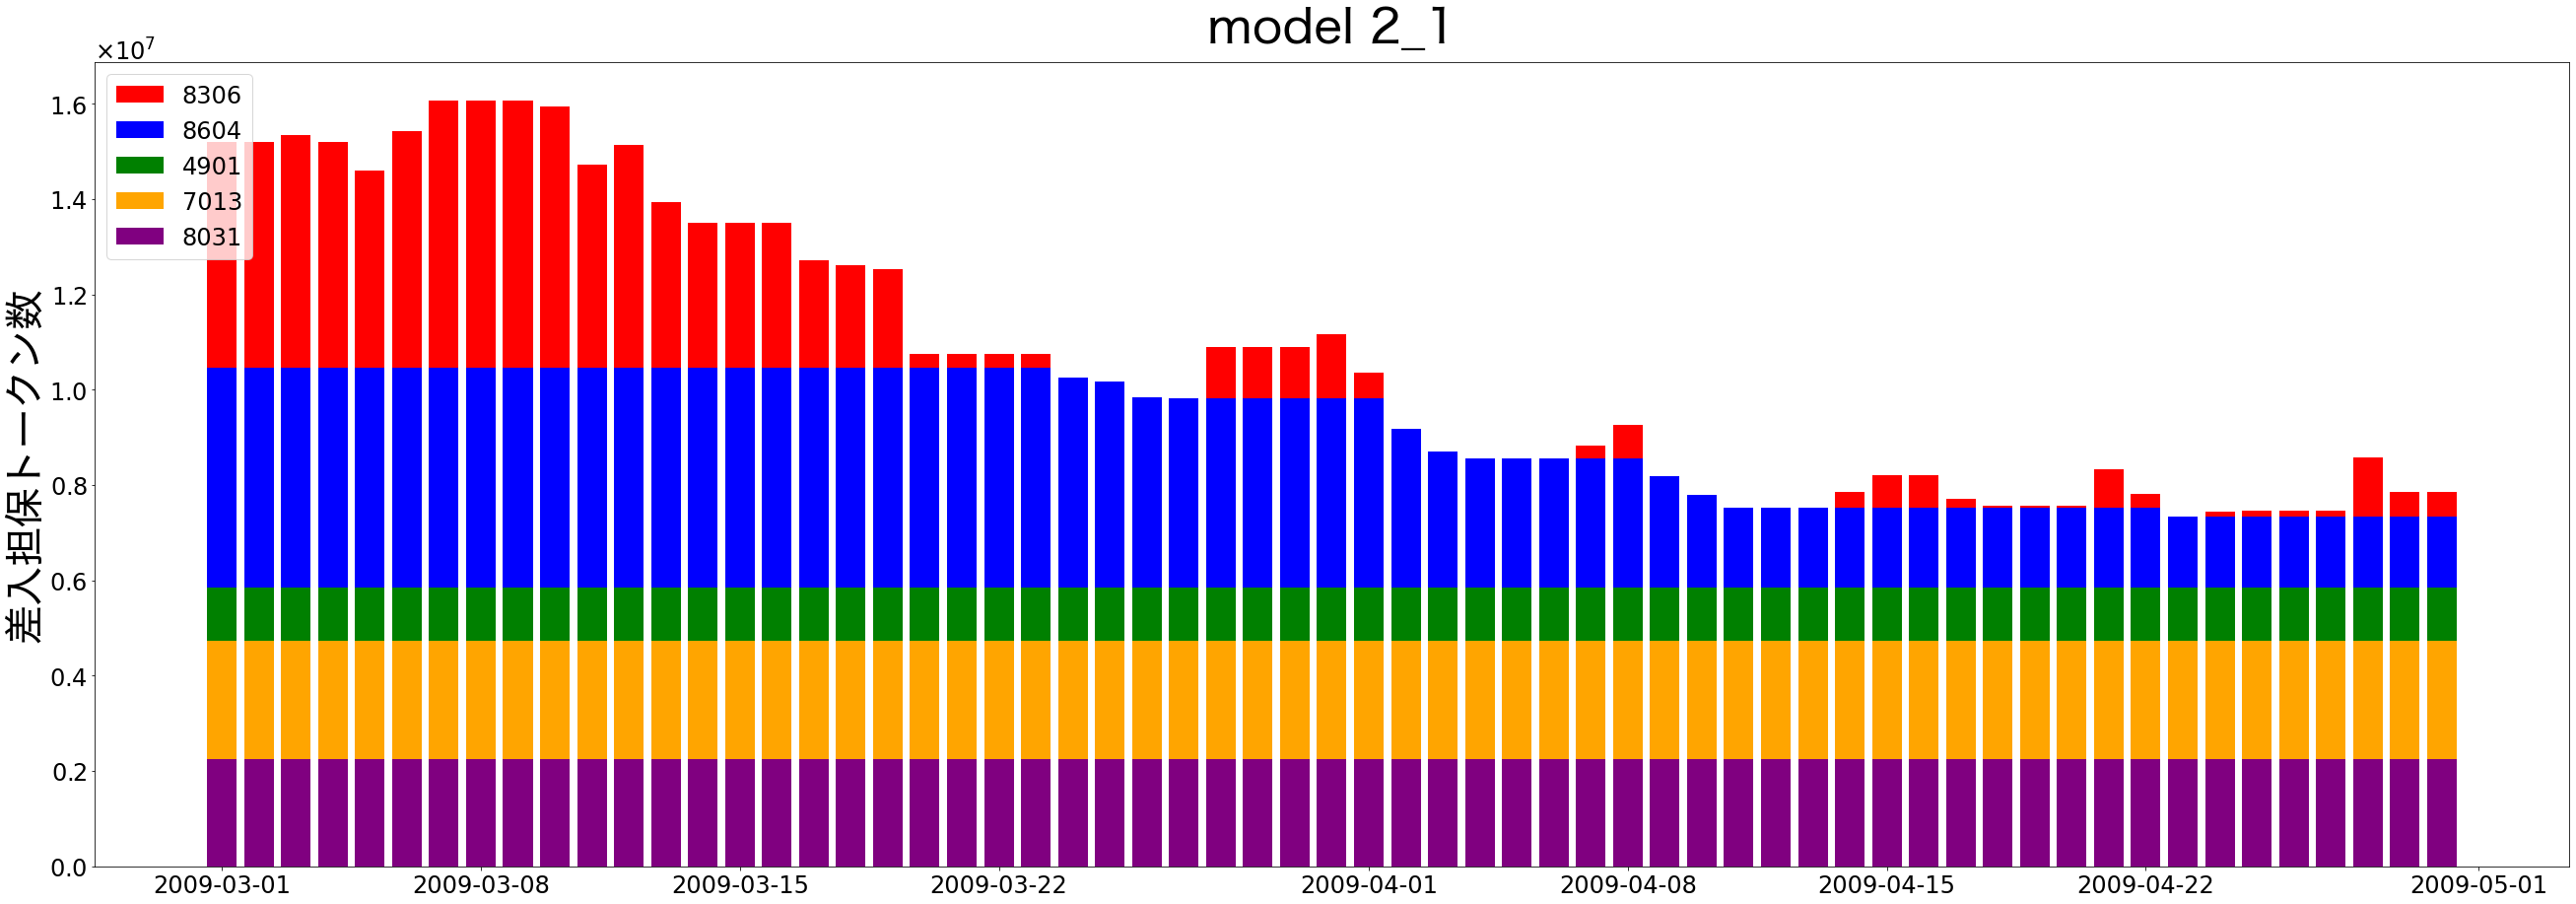

In [20]:
saved_logs_s3_m2_1 = np.load('./data0322/s3_m2_1.npy', allow_pickle=True).item()
visualizer_s3_m2_1 = LogVisualizer(saved_logs_s3_m2_1)
visualizer_s3_m2_1.bar_collateral_price_diff(title='model 2_1', is_decimal=True)
visualizer_s3_m2_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_1')
result_s3_m2_1 = visualizer_s3_m2_1.calc_price_diff_result()
diff_result_s3_m2_1 = visualizer_s3_m2_1.calc_token_diff()
diff_result_s3_m2_1
visualizer_s3_m2_1.calc_portfolio_credit_diff()

# saved_logs_s3_m2_1['lender_additional_issue'].count(True)
# saved_logs_s3_m2_1['has_done_margincall'].count(True)

#### model2-2

Log Visualizer initialized.


(186041166.7704918, 1002366595.0)

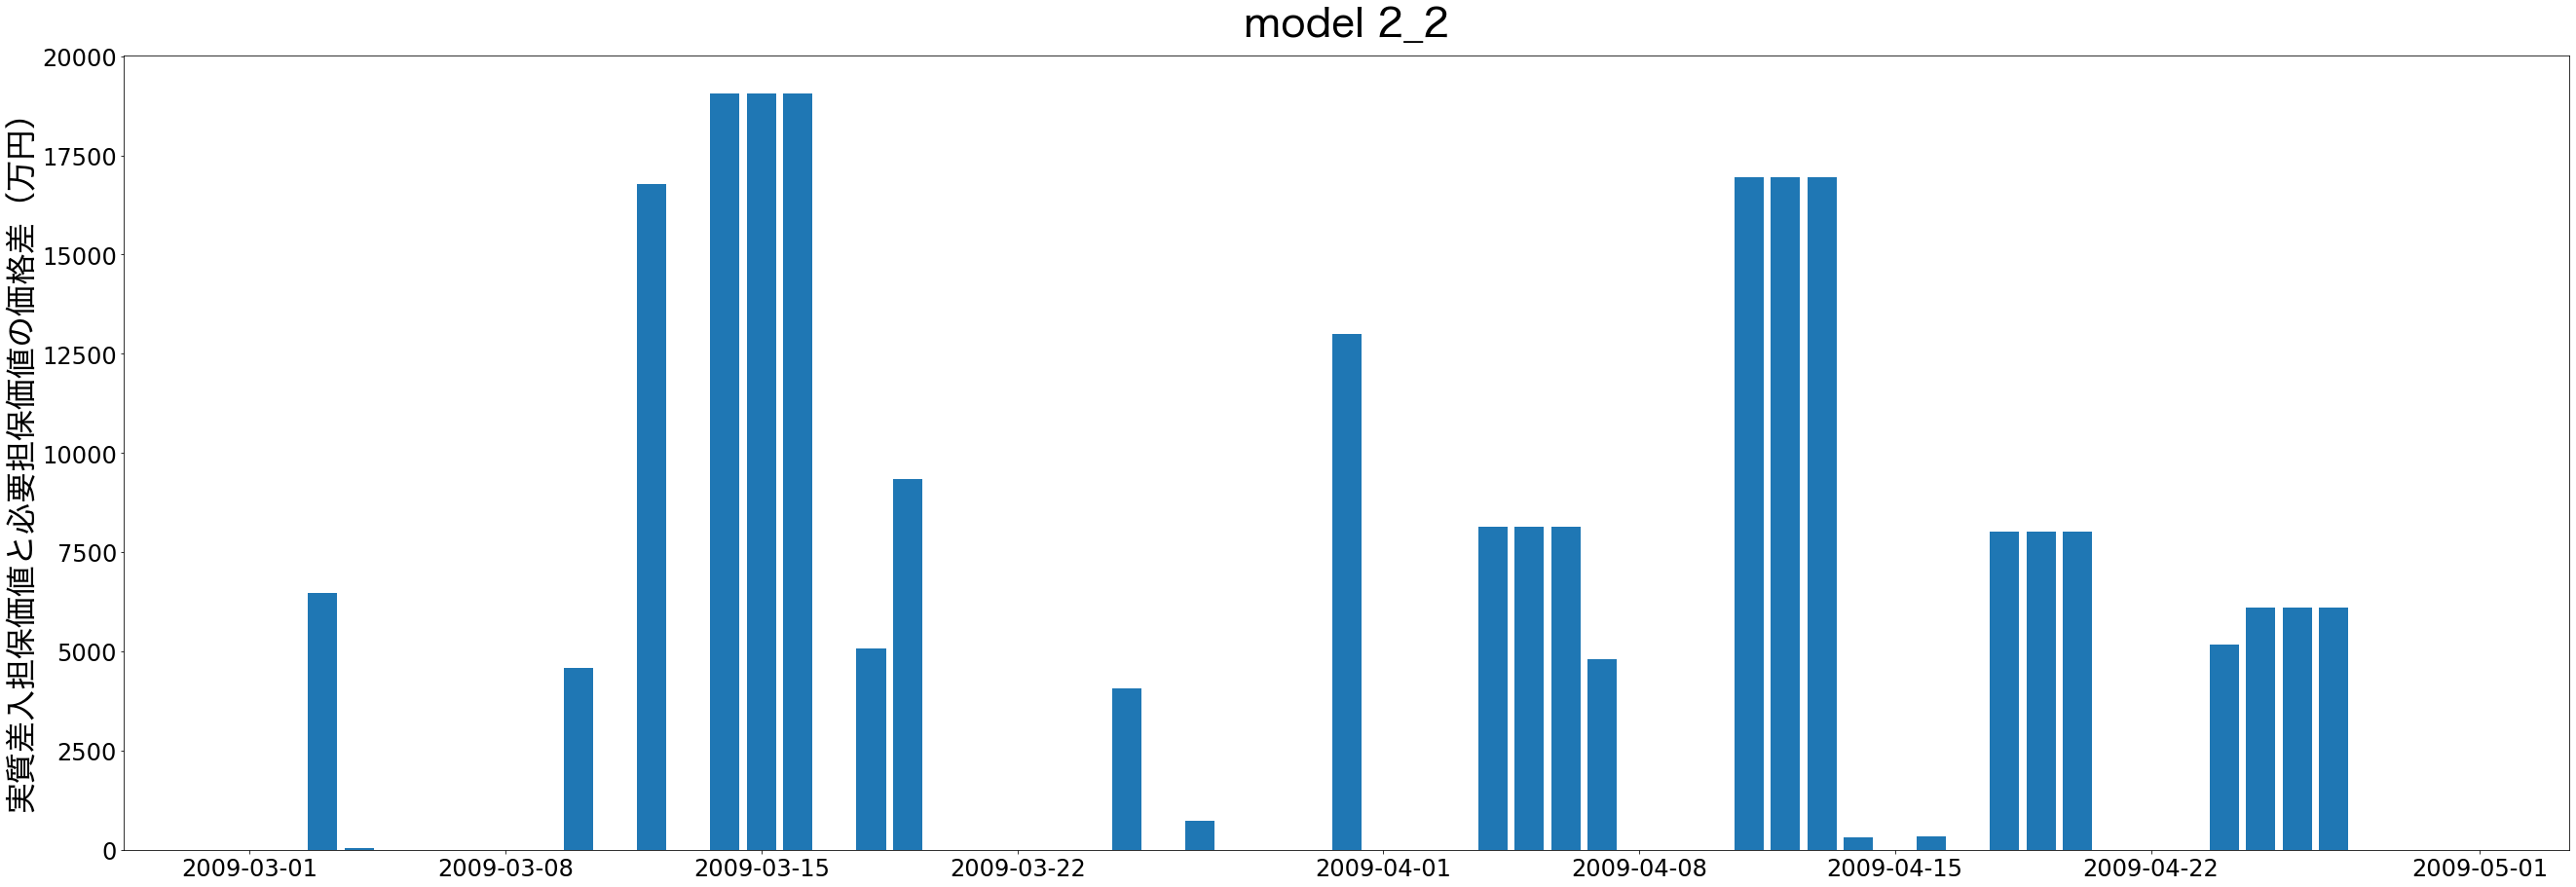

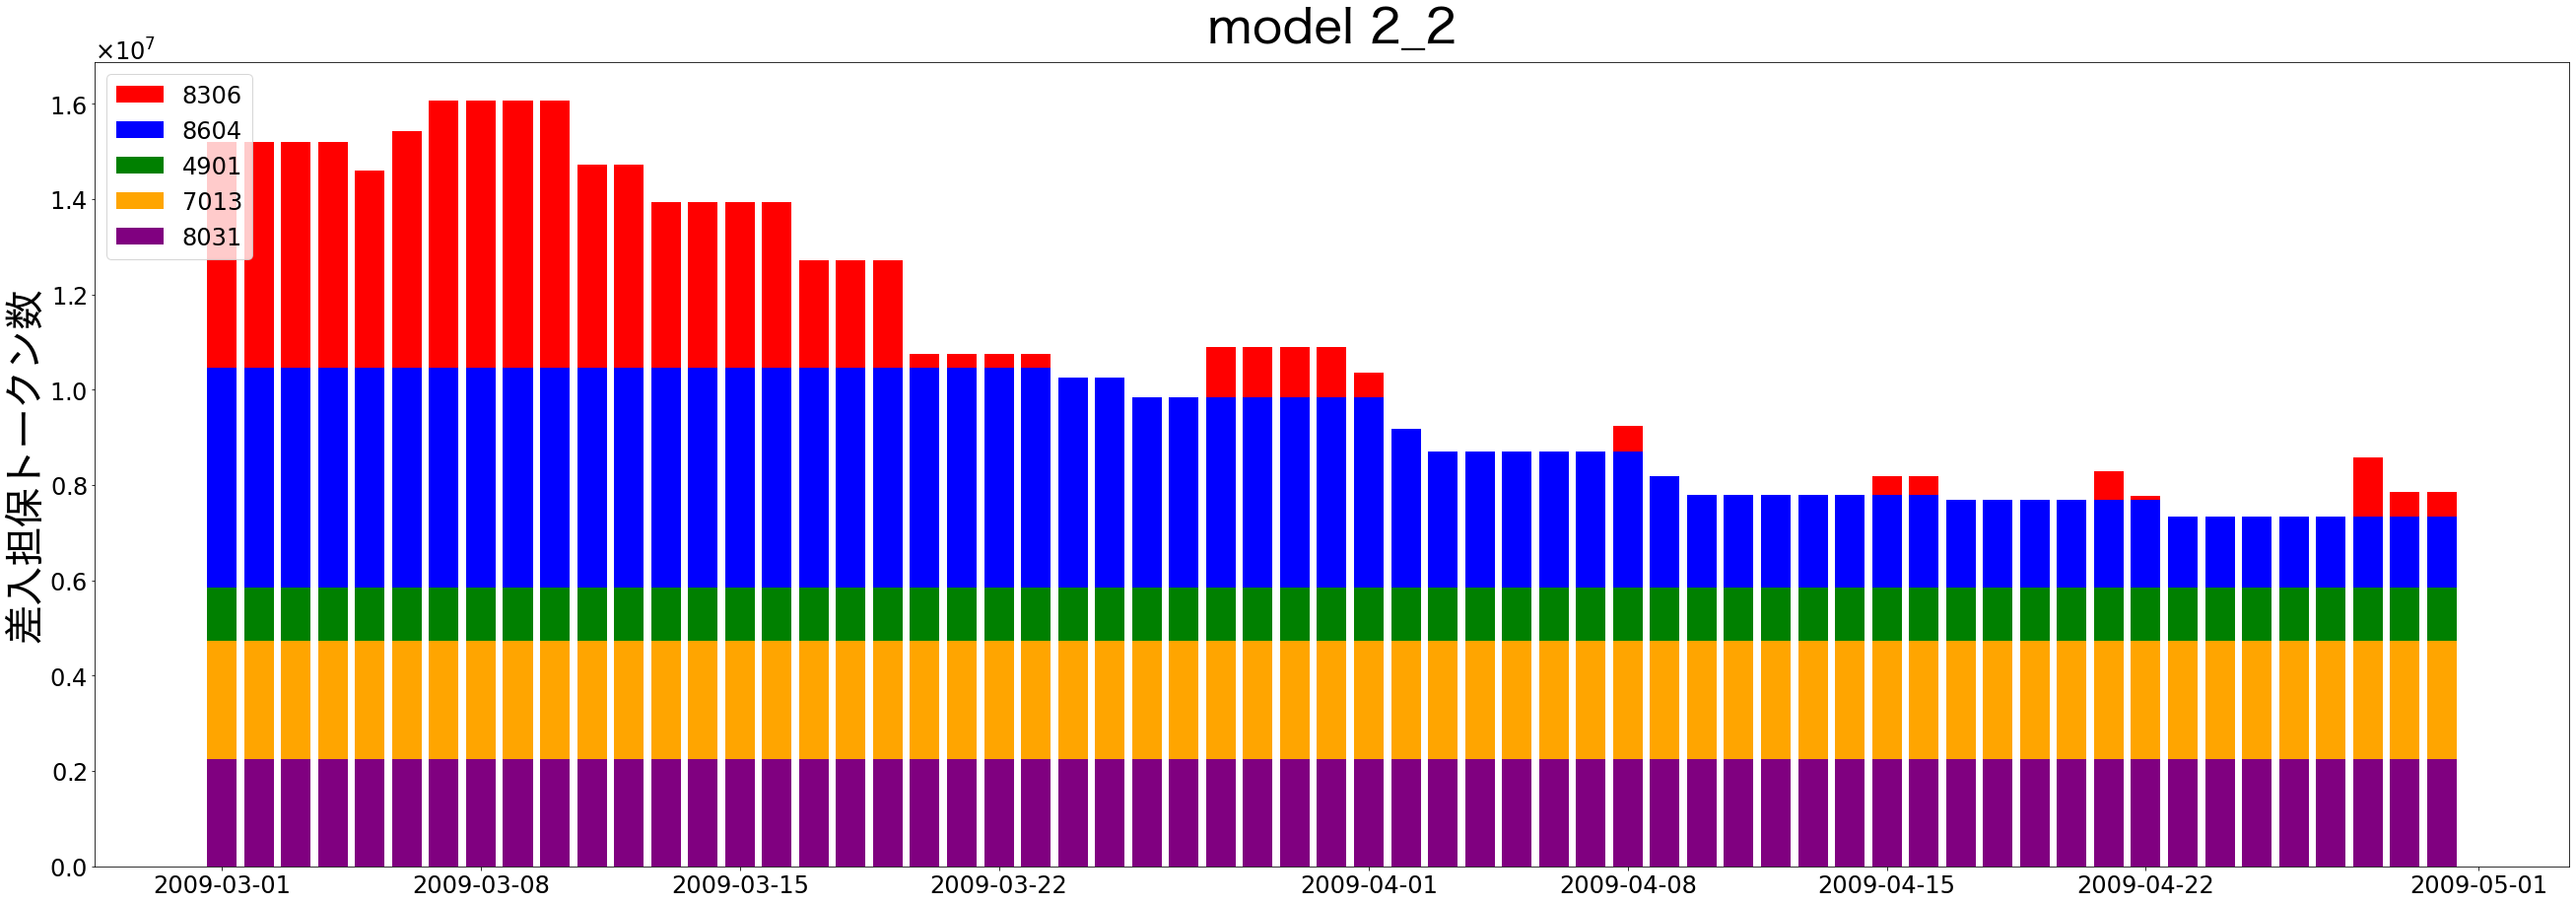

In [21]:
saved_logs_s3_m2_2 = np.load('./data0322/s3_m2_2.npy', allow_pickle=True).item()
visualizer_s3_m2_2 = LogVisualizer(saved_logs_s3_m2_2)
visualizer_s3_m2_2.bar_collateral_price_diff(title='model 2_2', is_decimal=True)
visualizer_s3_m2_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_2')
result_s3_m2_2 = visualizer_s3_m2_2.calc_price_diff_result()
diff_result_s3_m2_2 = visualizer_s3_m2_2.calc_token_diff()
diff_result_s3_m2_2
visualizer_s3_m2_2.calc_portfolio_credit_diff()

# saved_logs_s3_m2_2['lender_additional_issue'].count(True)
# saved_logs_s3_m2_2['has_done_margincall'].count(True)

#### model3-1

Log Visualizer initialized.


(162948162.852459, 860787228.0)

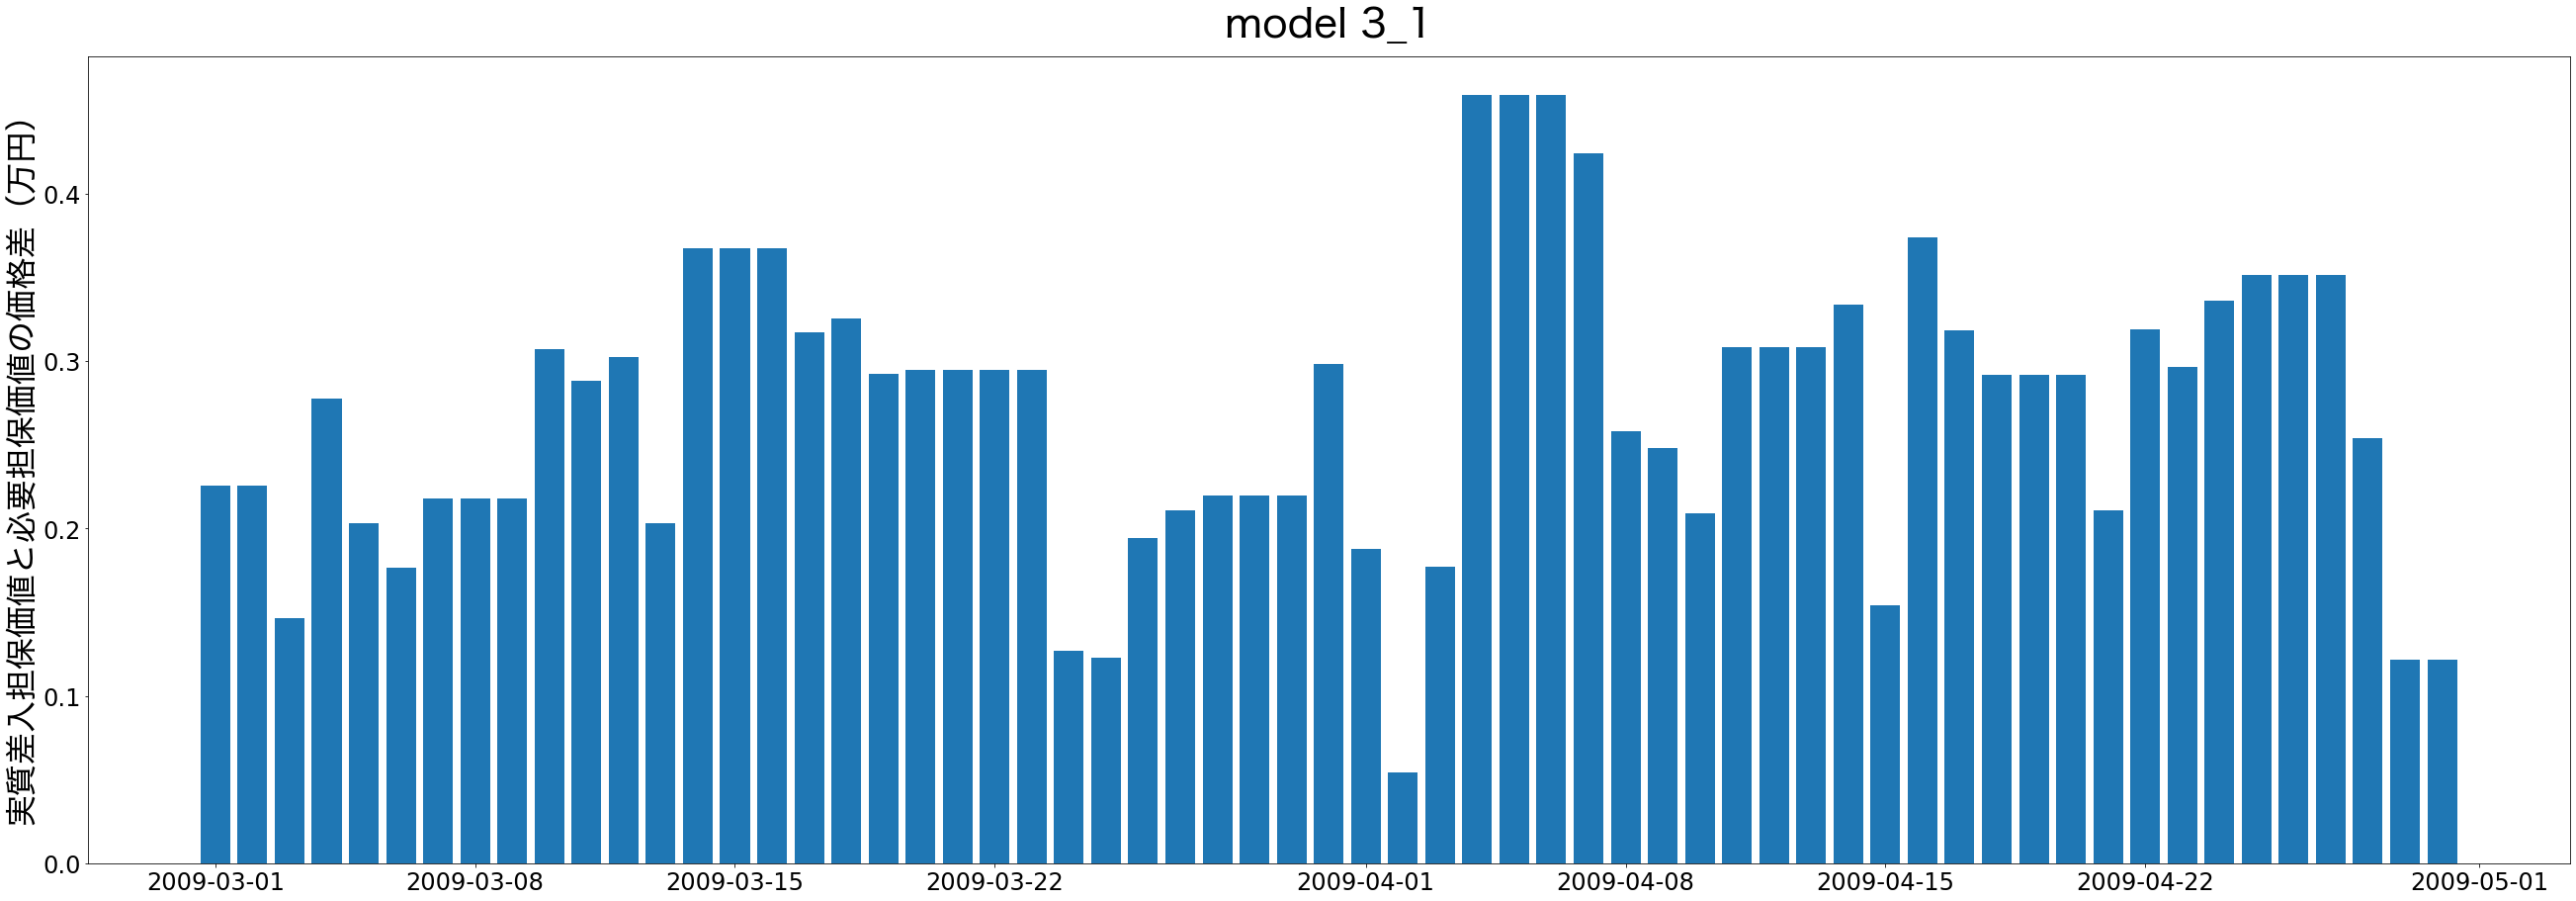

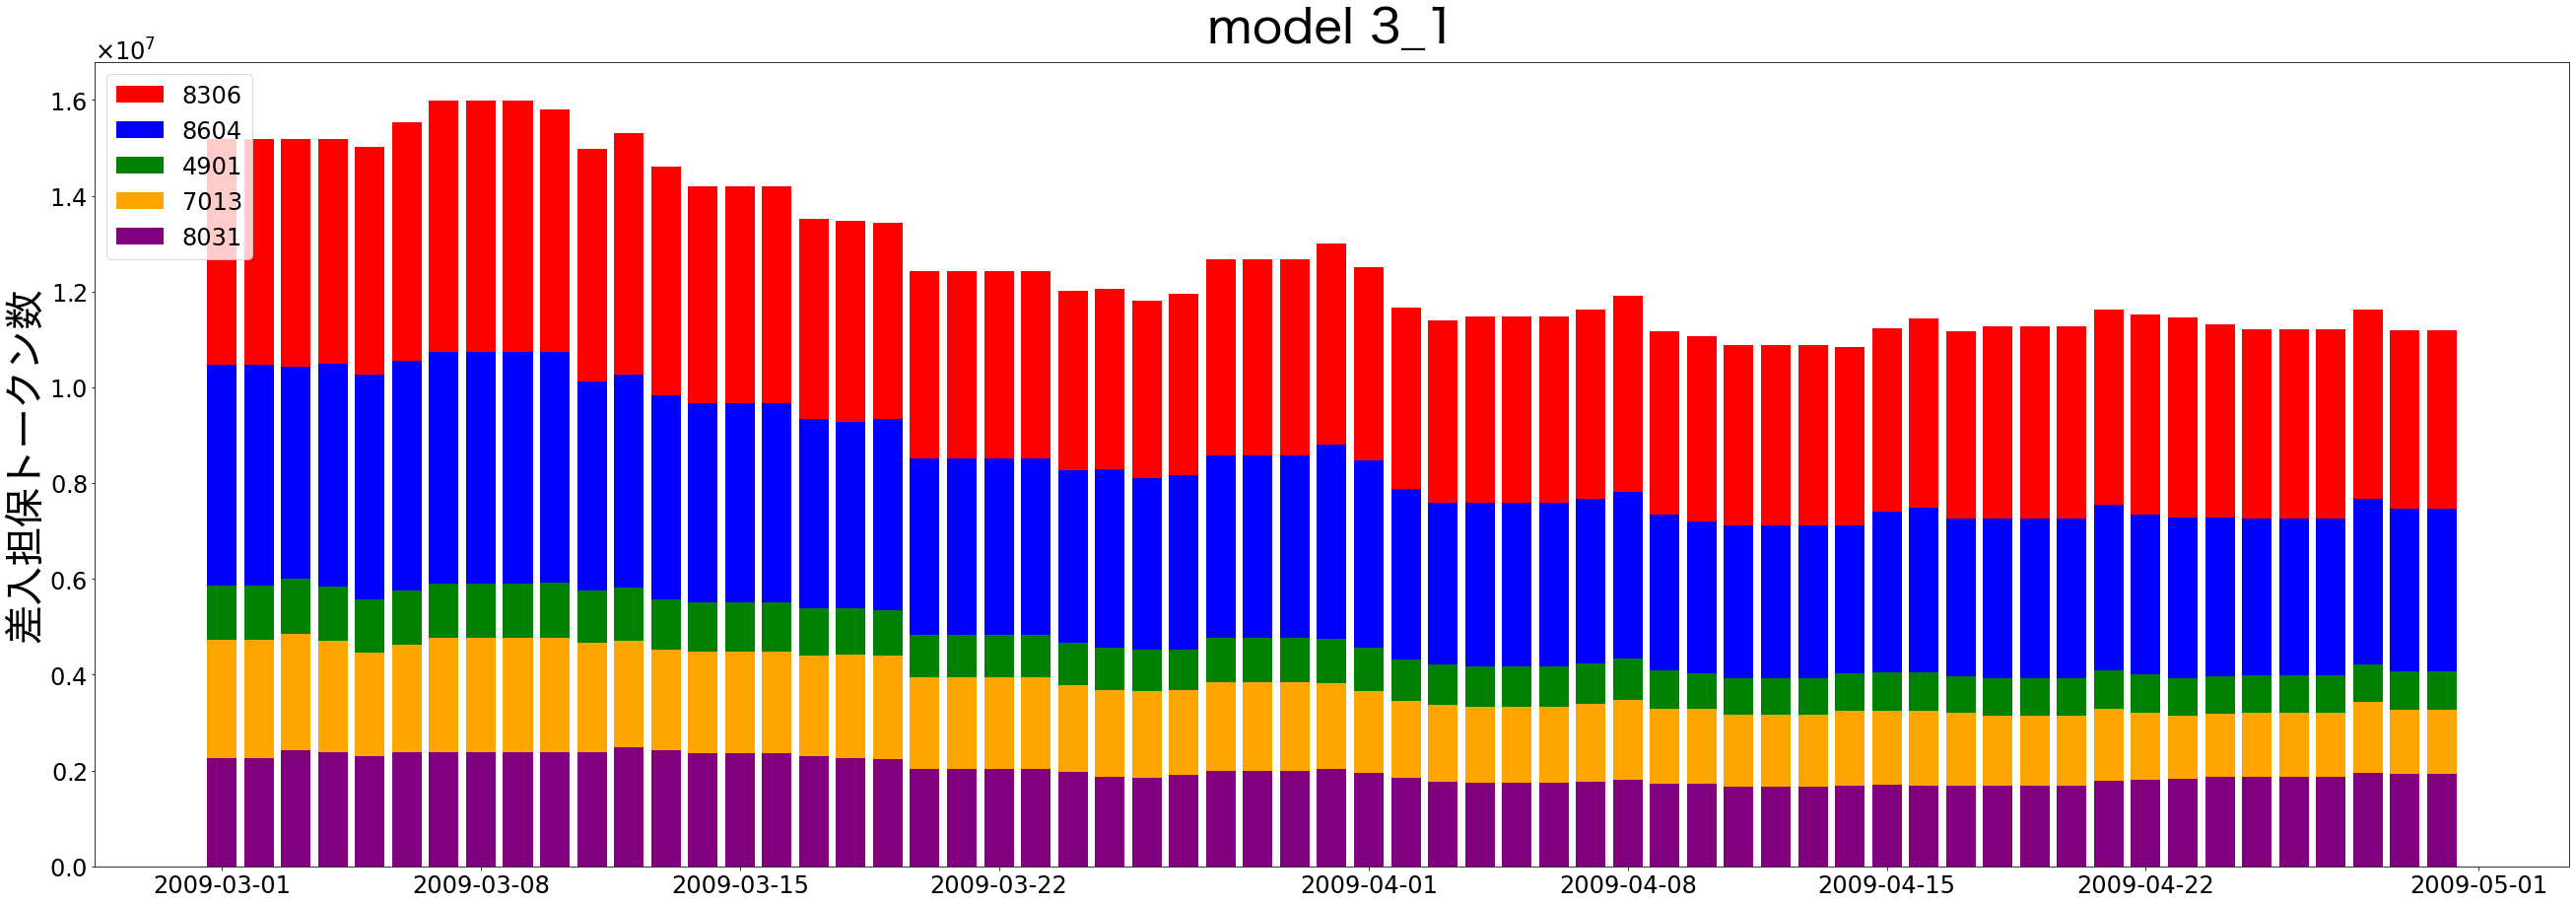

In [22]:
saved_logs_s3_m3_1 = np.load('./data0322/s3_m3_1.npy', allow_pickle=True).item()
visualizer_s3_m3_1 = LogVisualizer(saved_logs_s3_m3_1)
visualizer_s3_m3_1.bar_collateral_price_diff(title='model 3_1', is_decimal=True)
visualizer_s3_m3_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_1')
result_s3_m3_1 = visualizer_s3_m3_1.calc_price_diff_result()
diff_result_s3_m3_1 = visualizer_s3_m3_1.calc_token_diff()
diff_result_s3_m3_1
visualizer_s3_m3_1.calc_portfolio_credit_diff()

# saved_logs_s3_m3_1['lender_additional_issue'].count(True)
# saved_logs_s3_m3_1['has_done_margincall'].count(True)

#### model3-2

Log Visualizer initialized.


(171239369.26229507, 987301469.0)

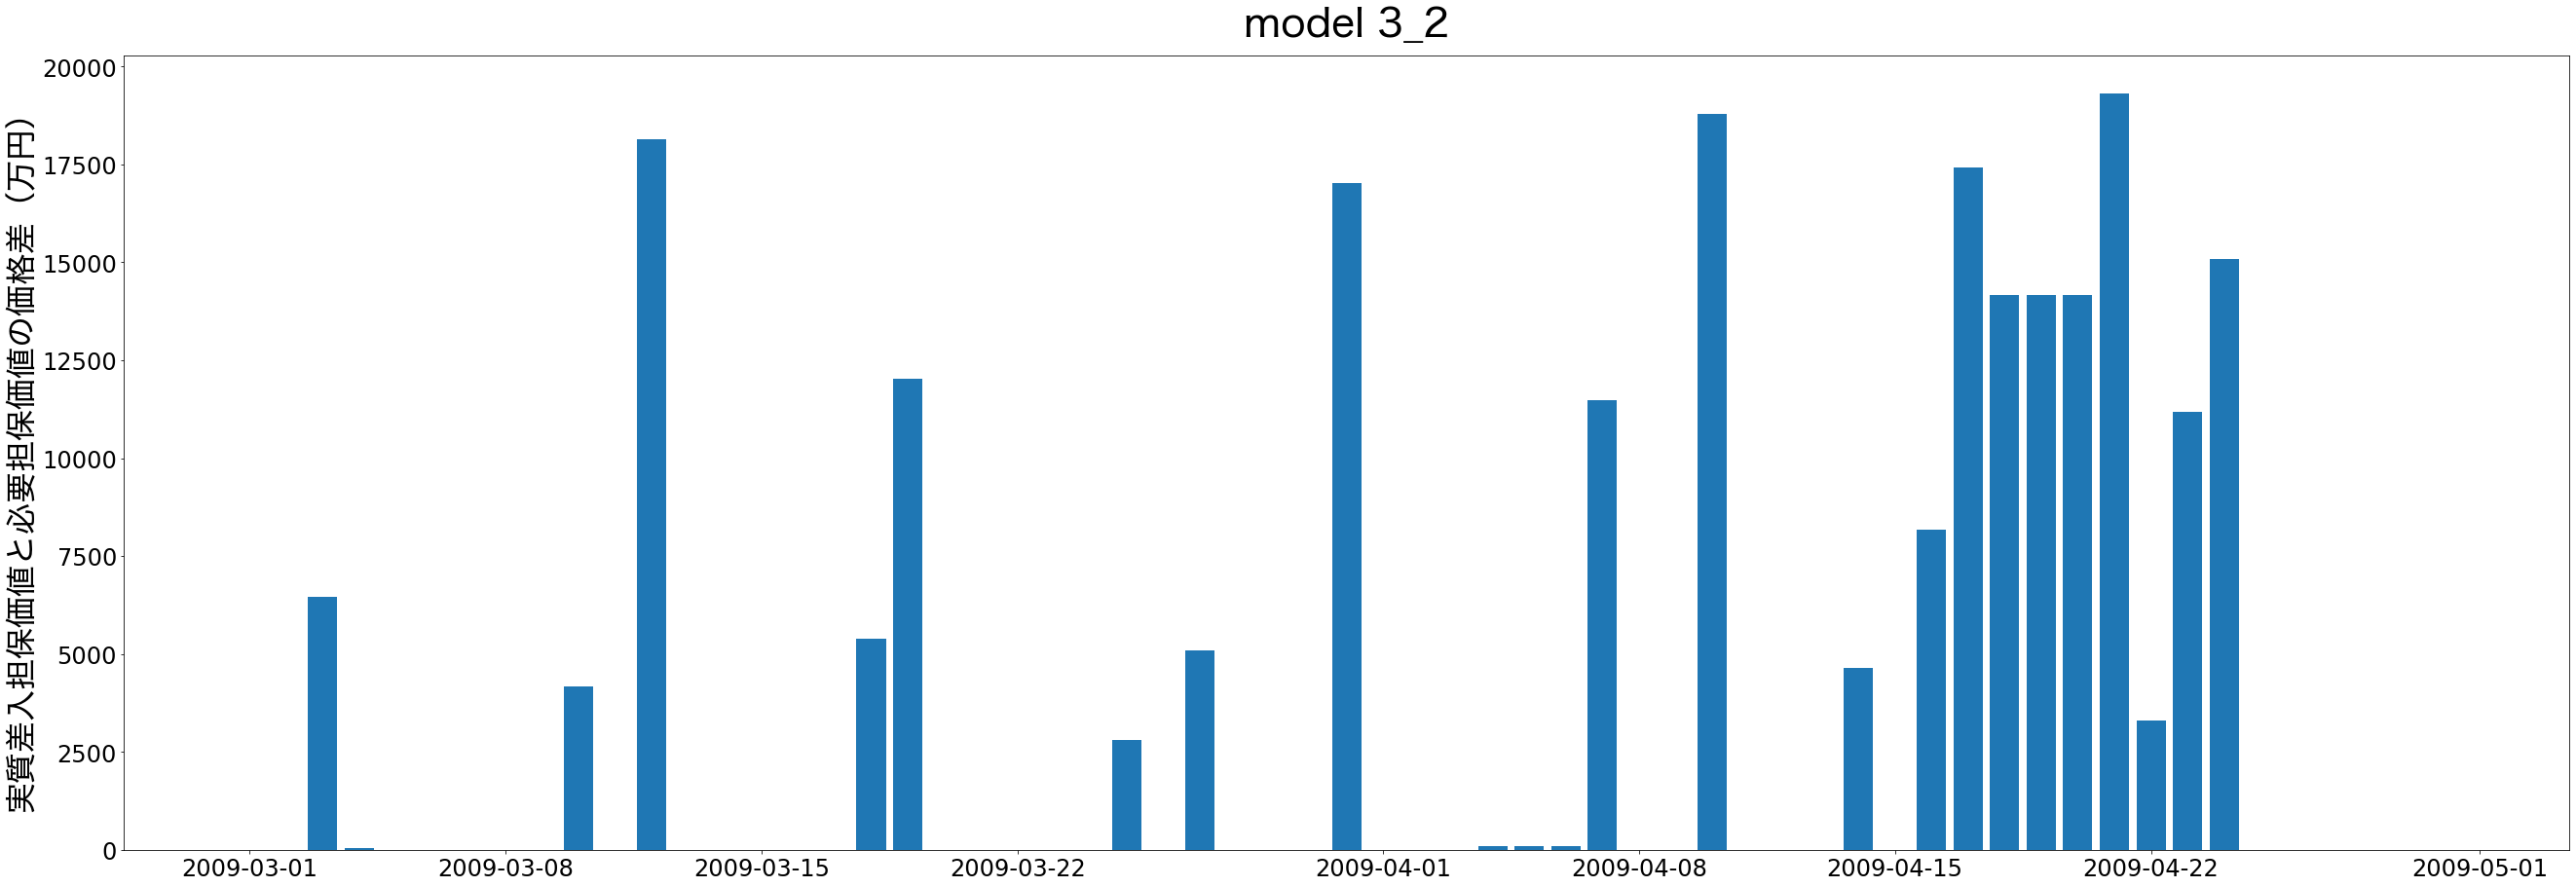

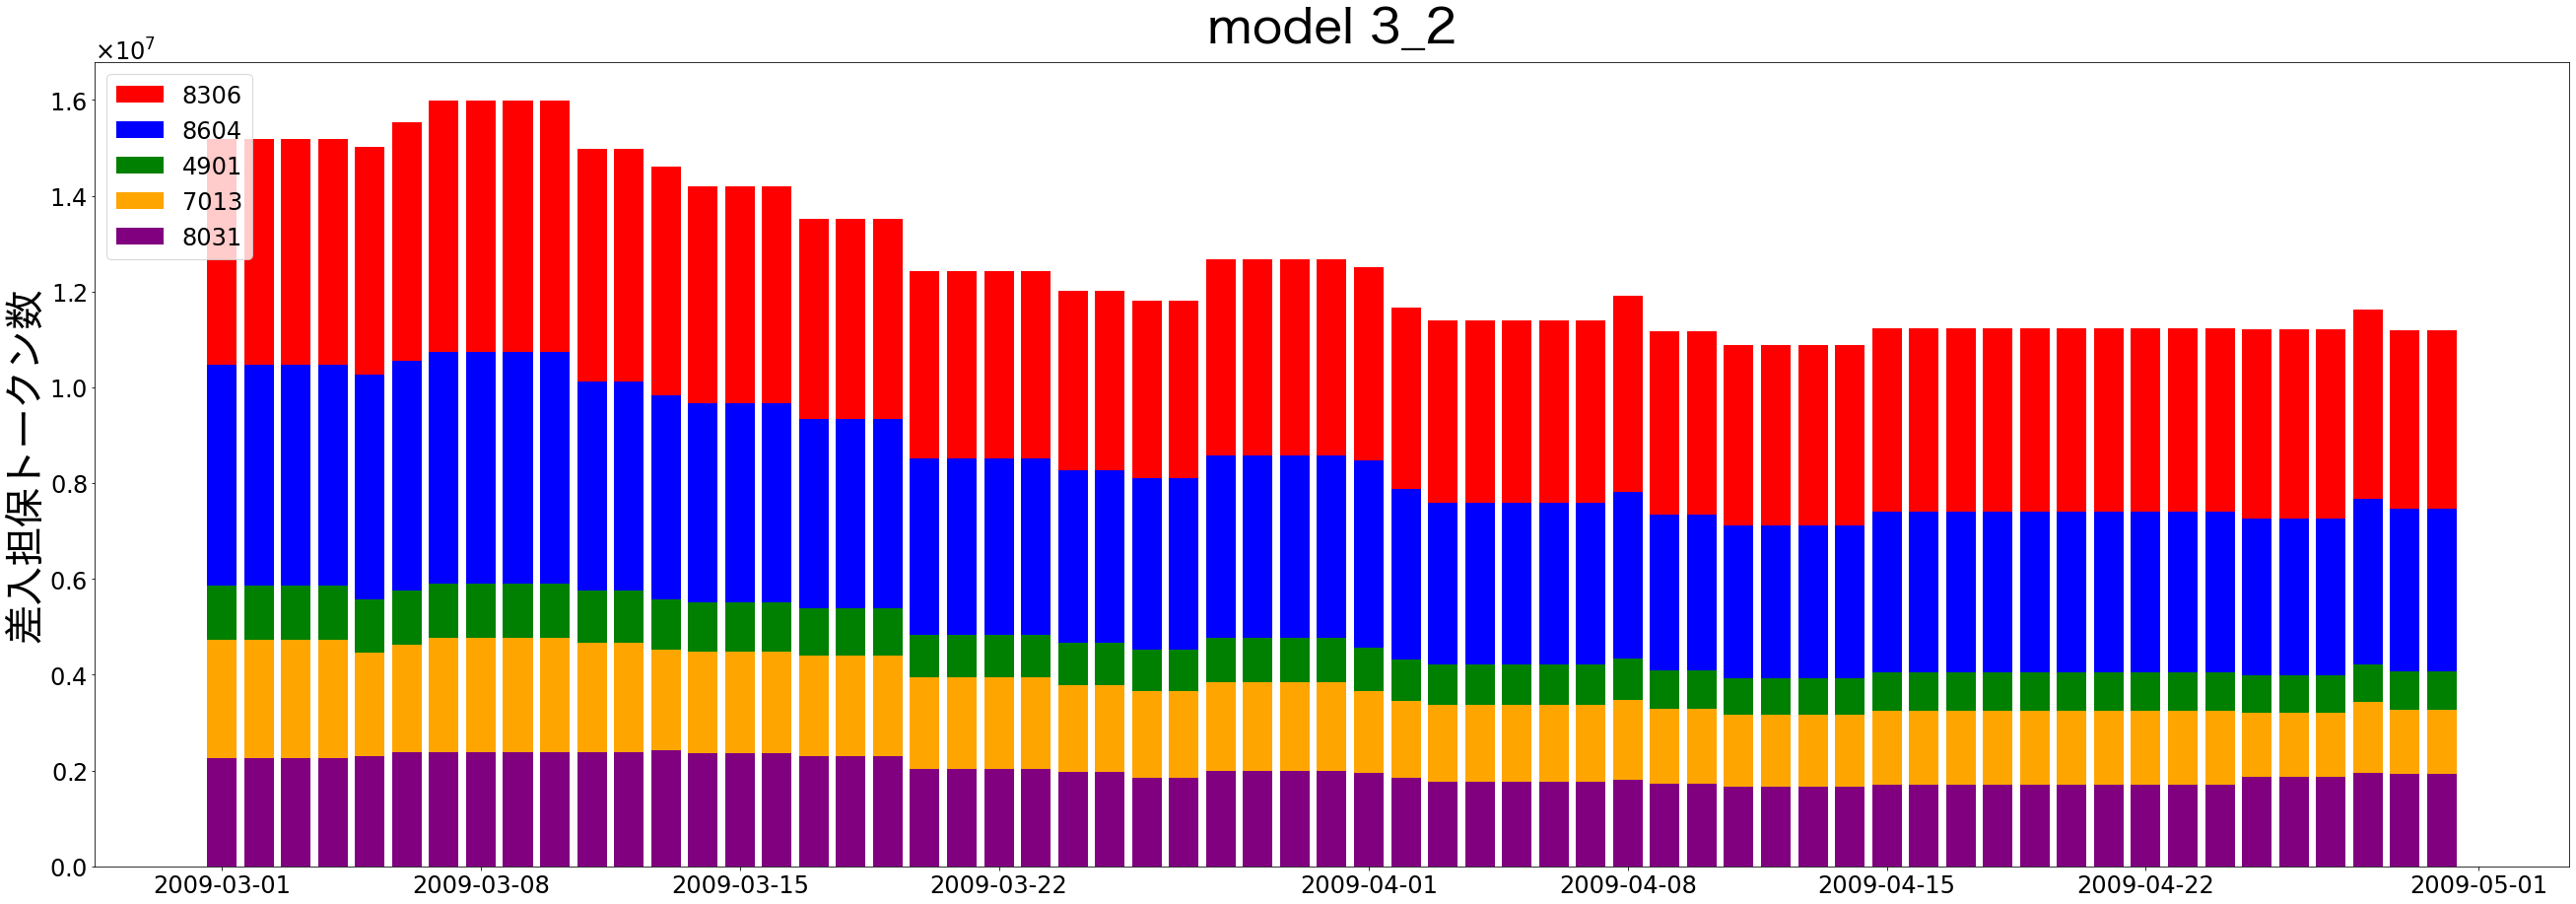

In [23]:
saved_logs_s3_m3_2 = np.load('./data0322/s3_m3_2.npy', allow_pickle=True).item()
visualizer_s3_m3_2 = LogVisualizer(saved_logs_s3_m3_2)
visualizer_s3_m3_2.bar_collateral_price_diff(title='model 3_2', is_decimal=True)
visualizer_s3_m3_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_2')
result_s3_m3_2 = visualizer_s3_m3_2.calc_price_diff_result()
diff_result_s3_m3_2 = visualizer_s3_m3_2.calc_token_diff()
diff_result_s3_m3_2
visualizer_s3_m3_2.calc_portfolio_credit_diff()

# saved_logs_s3_m3_2['lender_additional_issue'].count(True)
# saved_logs_s3_m3_2['has_done_margincall'].count(True)

#### 価格変動リスクケース間比較

In [112]:
price_diff_log_lists_s3 = {
    'モデル0: 現行手続き': result_s3_m0['raw_data'],
    'モデル1: 単一トークン調整, マージンコール閾値β=0': result_s3_m1['raw_data'],
    'モデル2: 複数トークン調整, マージンコール閾値β=0': result_s3_m2['raw_data'],
    'モデル3: 単一トークン調整, マージンコール閾値β=0.02': result_s3_m3['raw_data'],
    'モデル4: 複数トークン調整, マージンコール閾値β=0.02': result_s3_m4['raw_data'],
}

date_list_s3 = saved_logs_s3_m0['date']

NameError: name 'result_s3_m0' is not defined

In [113]:
plt_all_price_diff(date_list_s3, price_diff_log_lists_s3, 's3')

NameError: name 'date_list_s3' is not defined

## シナリオ4

#### model1-1

Log Visualizer initialized.


(232014920.18032786, 1132376174.0)

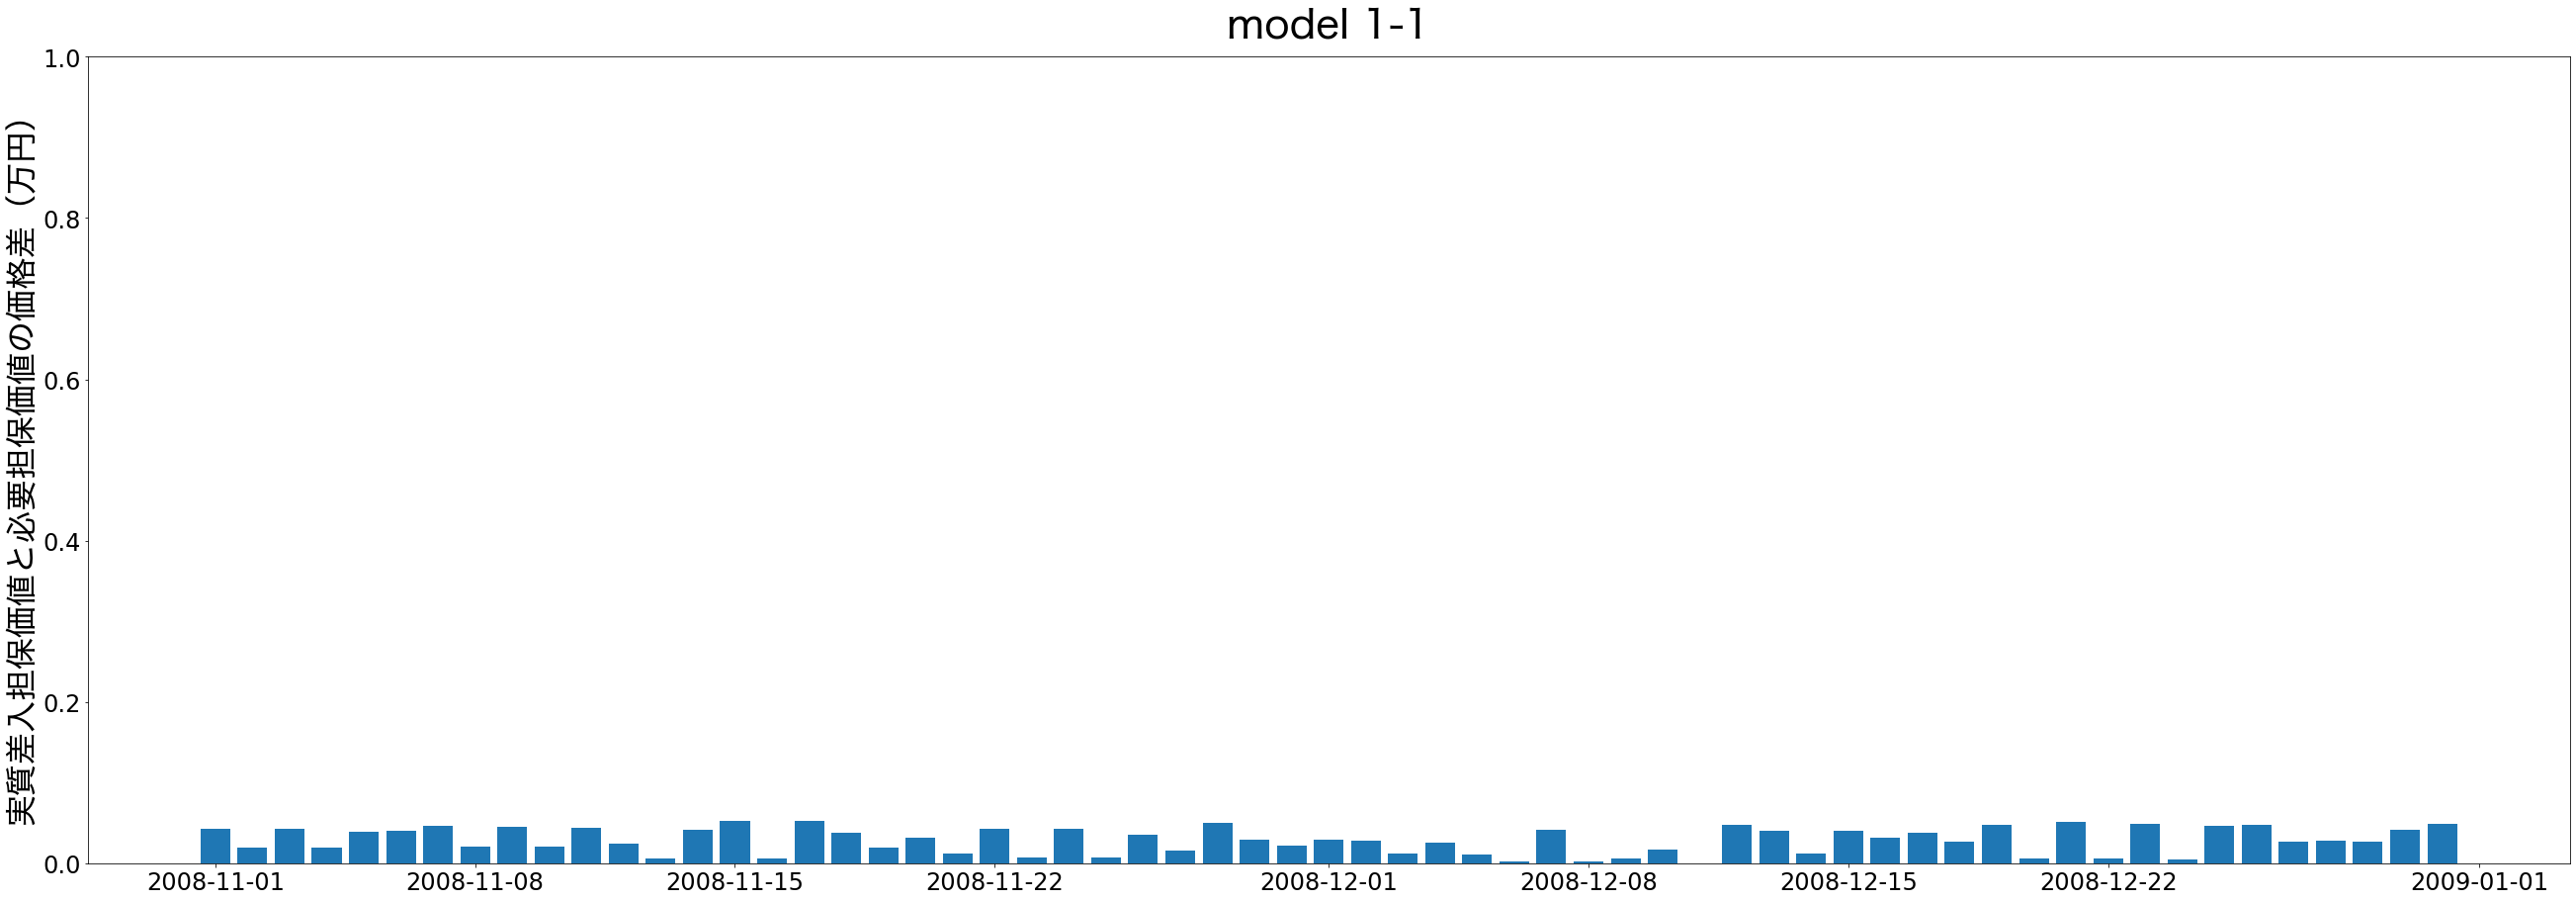

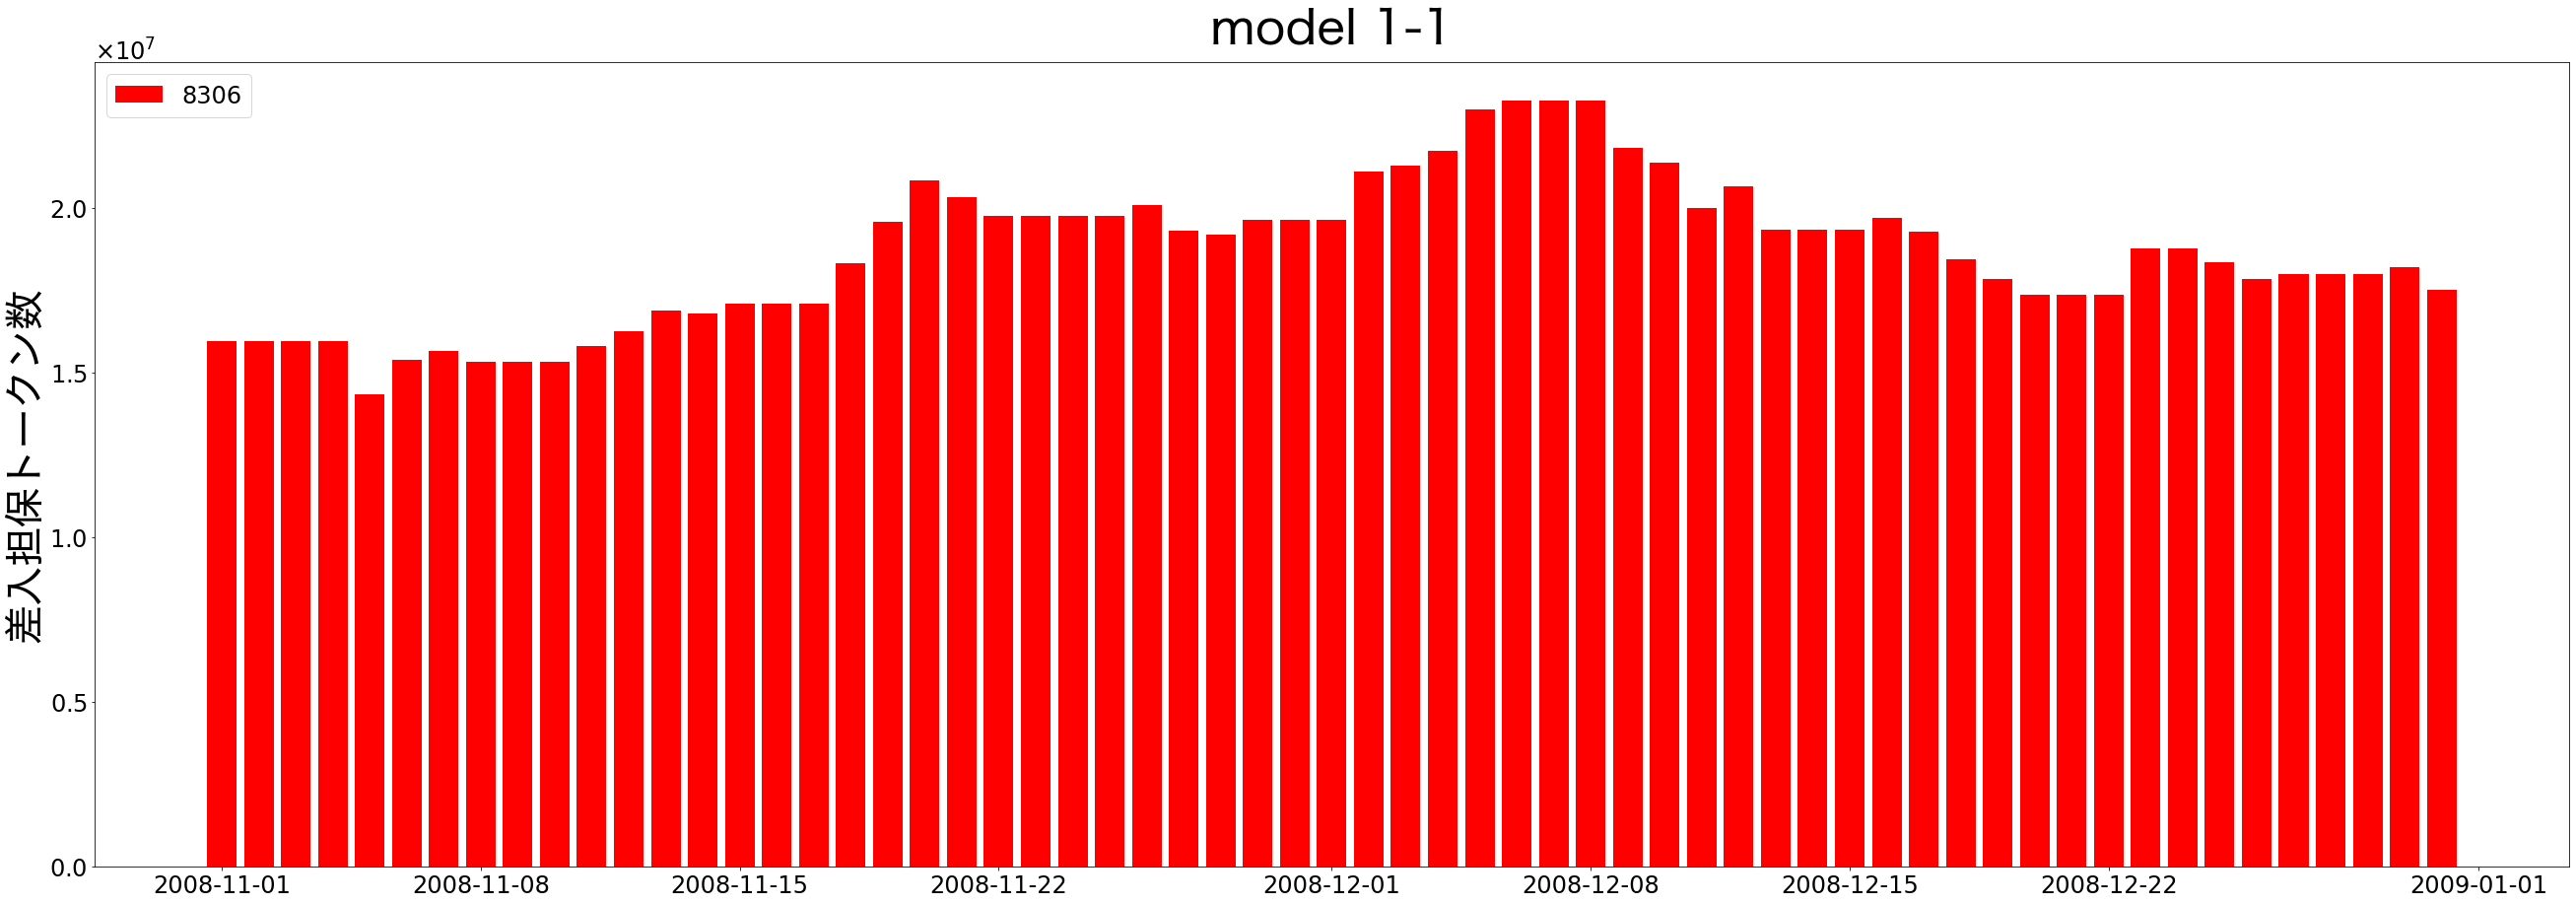

In [26]:
saved_logs_s4_m1_1 = np.load('./data0322/s4_m1_1.npy', allow_pickle=True).item()
visualizer_s4_m1_1 = LogVisualizer(saved_logs_s4_m1_1)
visualizer_s4_m1_1.bar_collateral_price_diff(1, title='model 1-1', is_decimal=True)
visualizer_s4_m1_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-1')
result_s4_m1_1 = visualizer_s4_m1_1.calc_price_diff_result()
diff_result_s4_m1_1 = visualizer_s4_m1_1.calc_token_diff()
diff_result_s4_m1_1
visualizer_s4_m1_1.calc_portfolio_credit_diff()

# saved_logs_s4_m1_1['lender_additional_issue'].count(True)
# saved_logs_s4_m1_1['has_done_margincall'].count(True)

#### model1-2

Log Visualizer initialized.


(240309251.36065573, 1132376872.0)

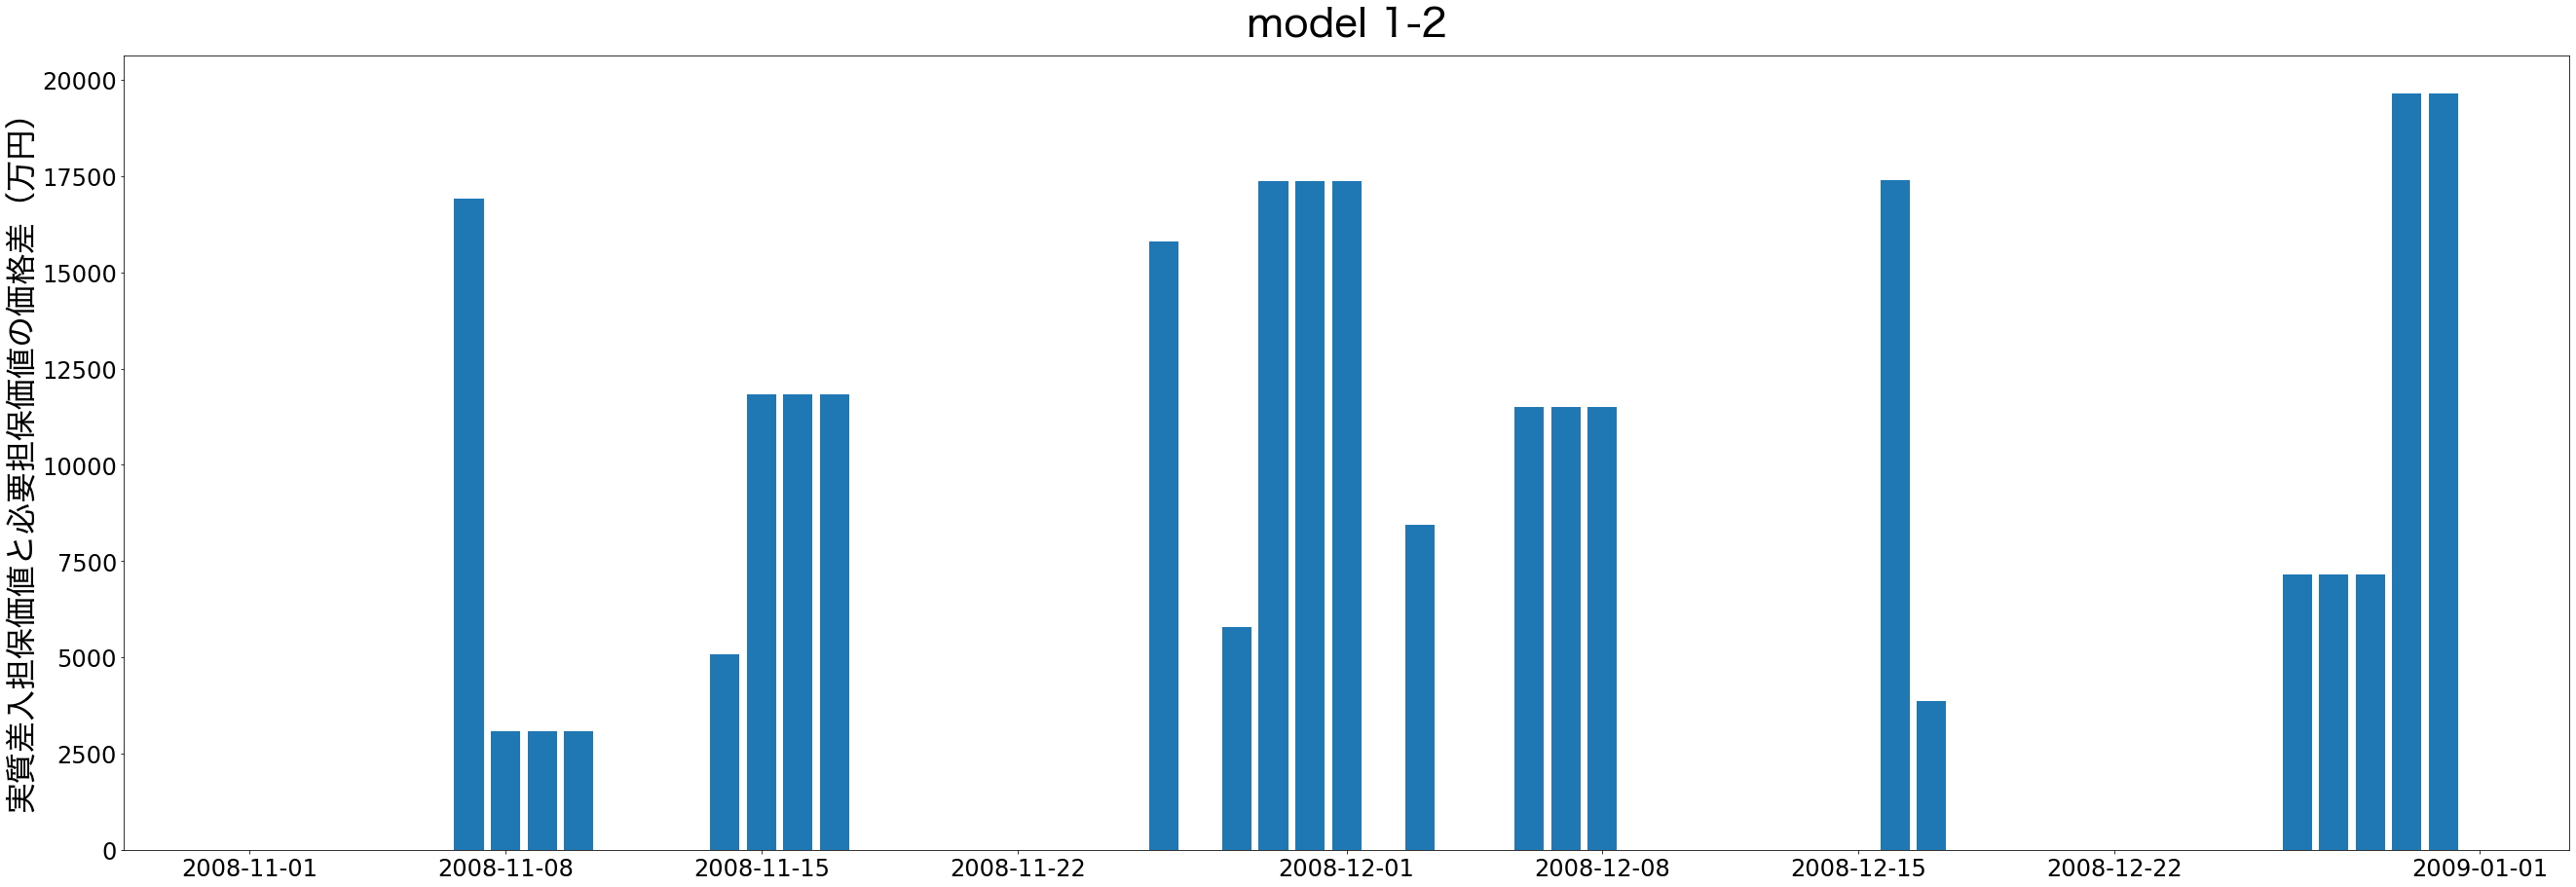

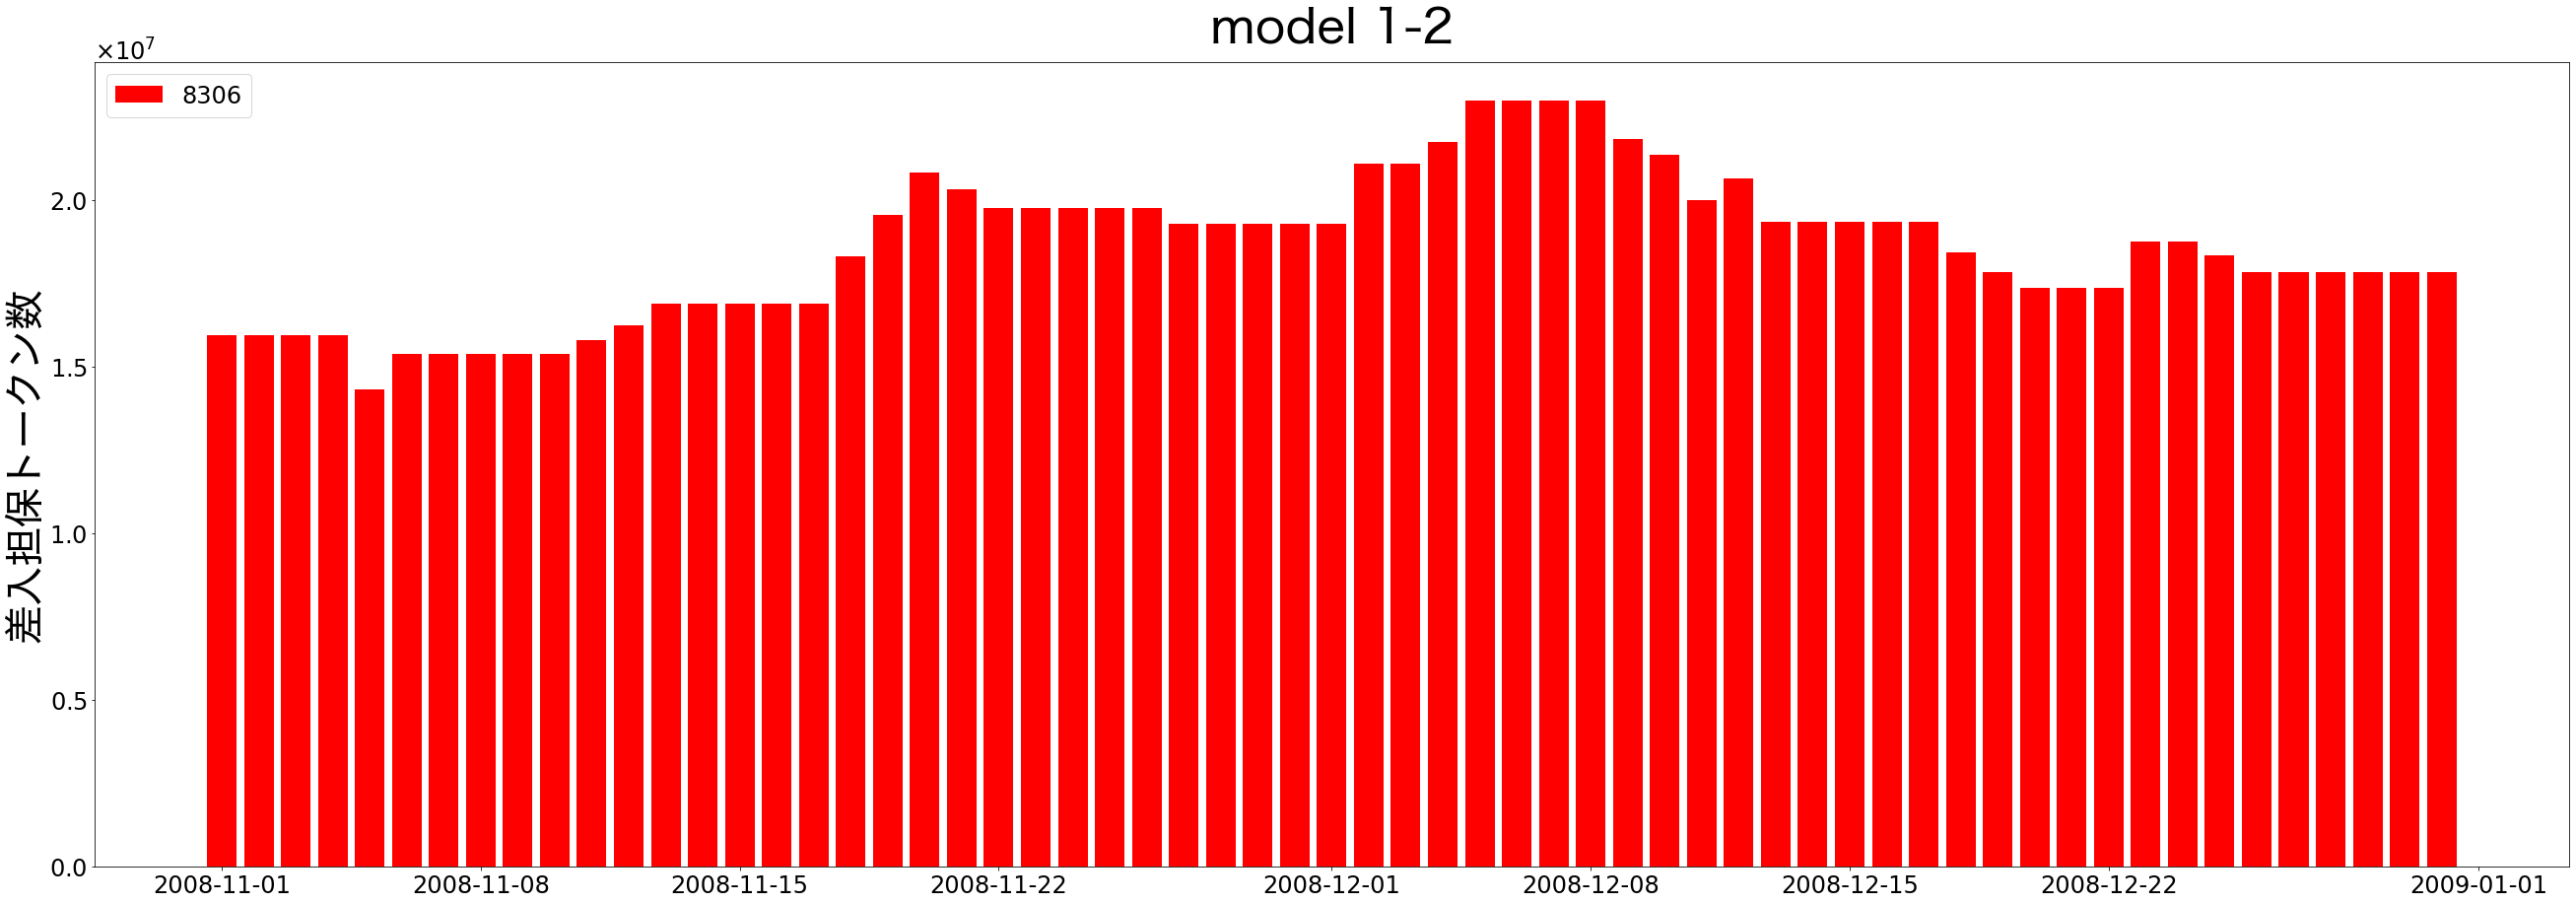

In [27]:
saved_logs_s4_m1_2 = np.load('./data0322/s4_m1_2.npy', allow_pickle=True).item()
visualizer_s4_m1_2 = LogVisualizer(saved_logs_s4_m1_2)
visualizer_s4_m1_2.bar_collateral_price_diff(title='model 1-2', is_decimal=True)
visualizer_s4_m1_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 1-2')
result_s4_m1_2 = visualizer_s4_m1_2.calc_price_diff_result()
diff_result_s4_m1_2 = visualizer_s4_m1_2.calc_token_diff()
diff_result_s4_m1_2
visualizer_s4_m1_2.calc_portfolio_credit_diff()

# saved_logs_s4_m1_2['lender_additional_issue'].count(True)
# saved_logs_s4_m1_2['has_done_margincall'].count(True)

#### model2-1

Log Visualizer initialized.


(194826394.44262296, 980755252.0)

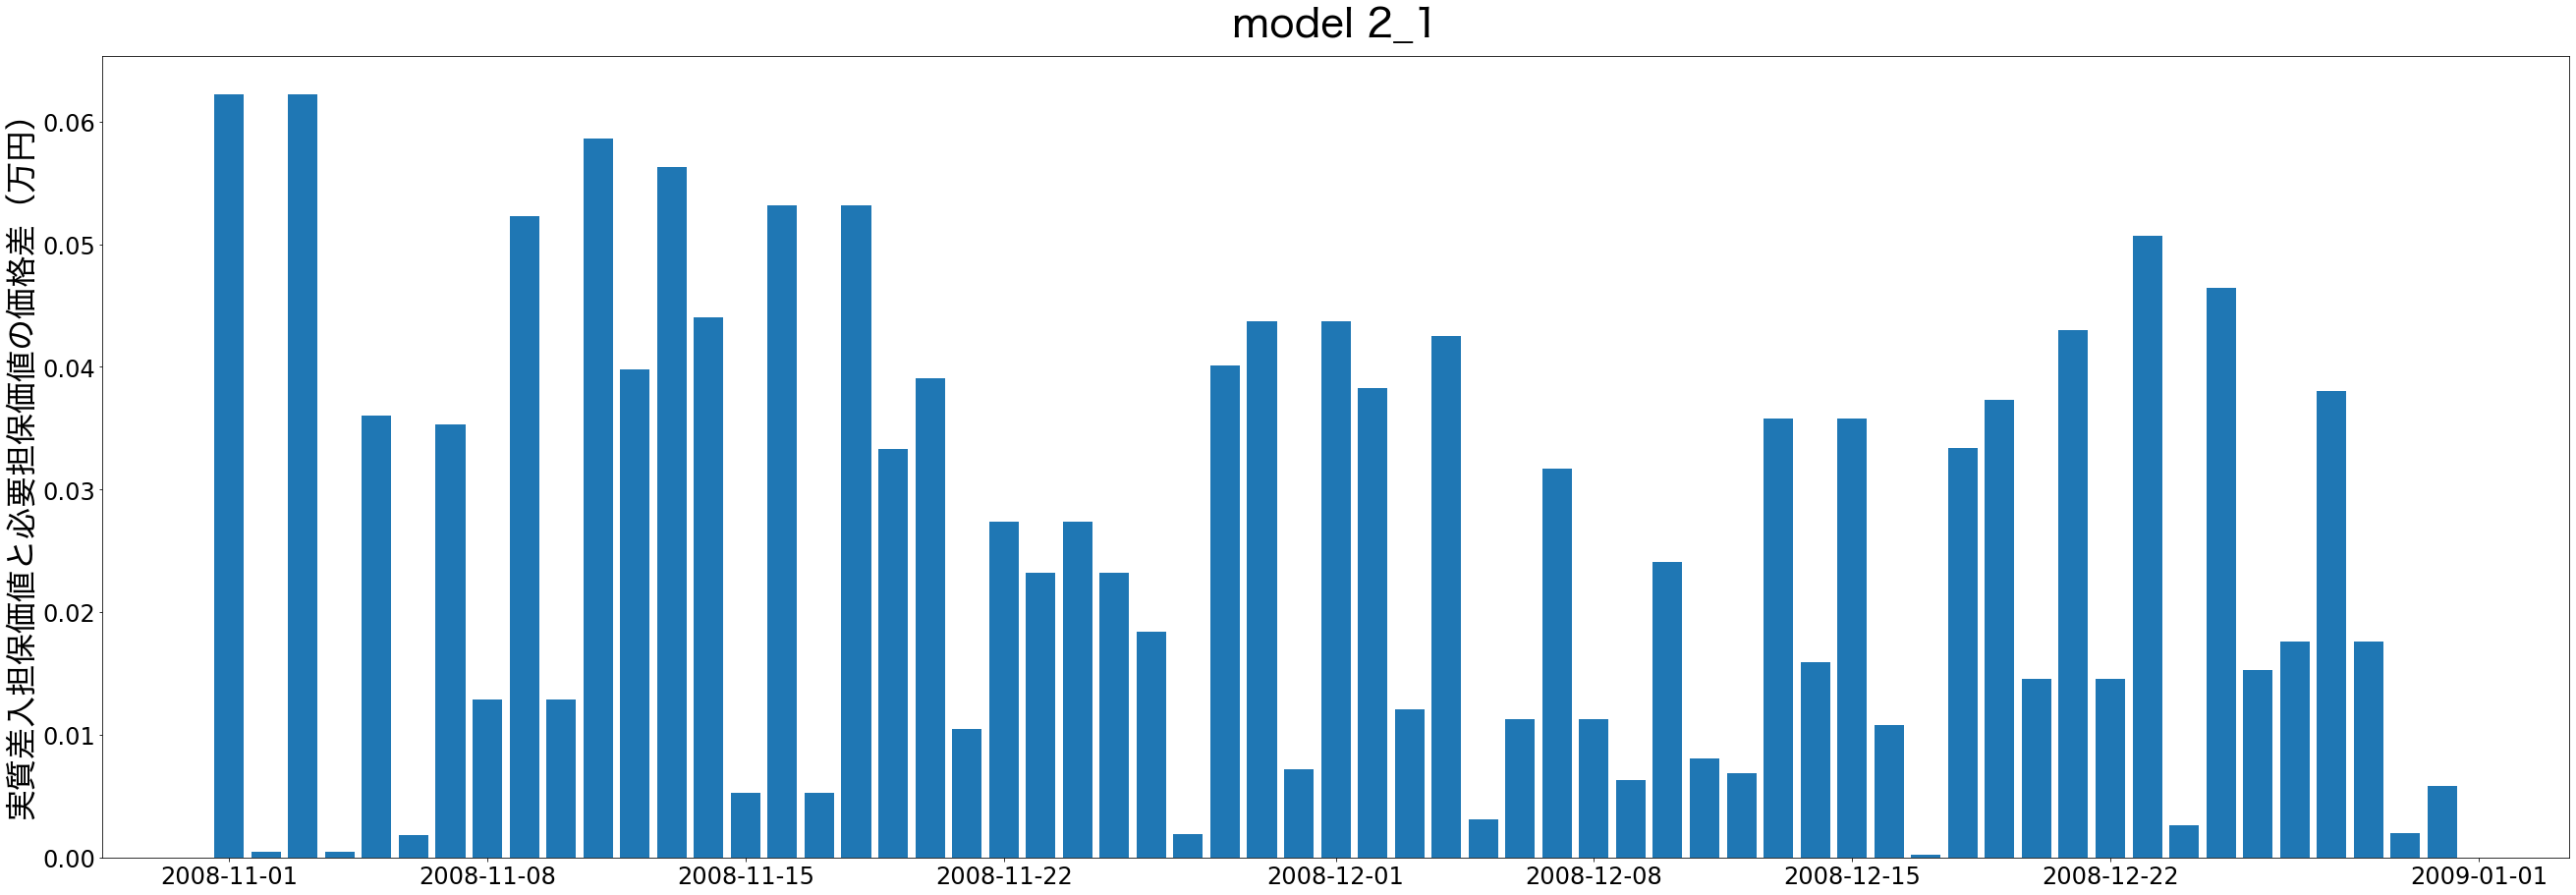

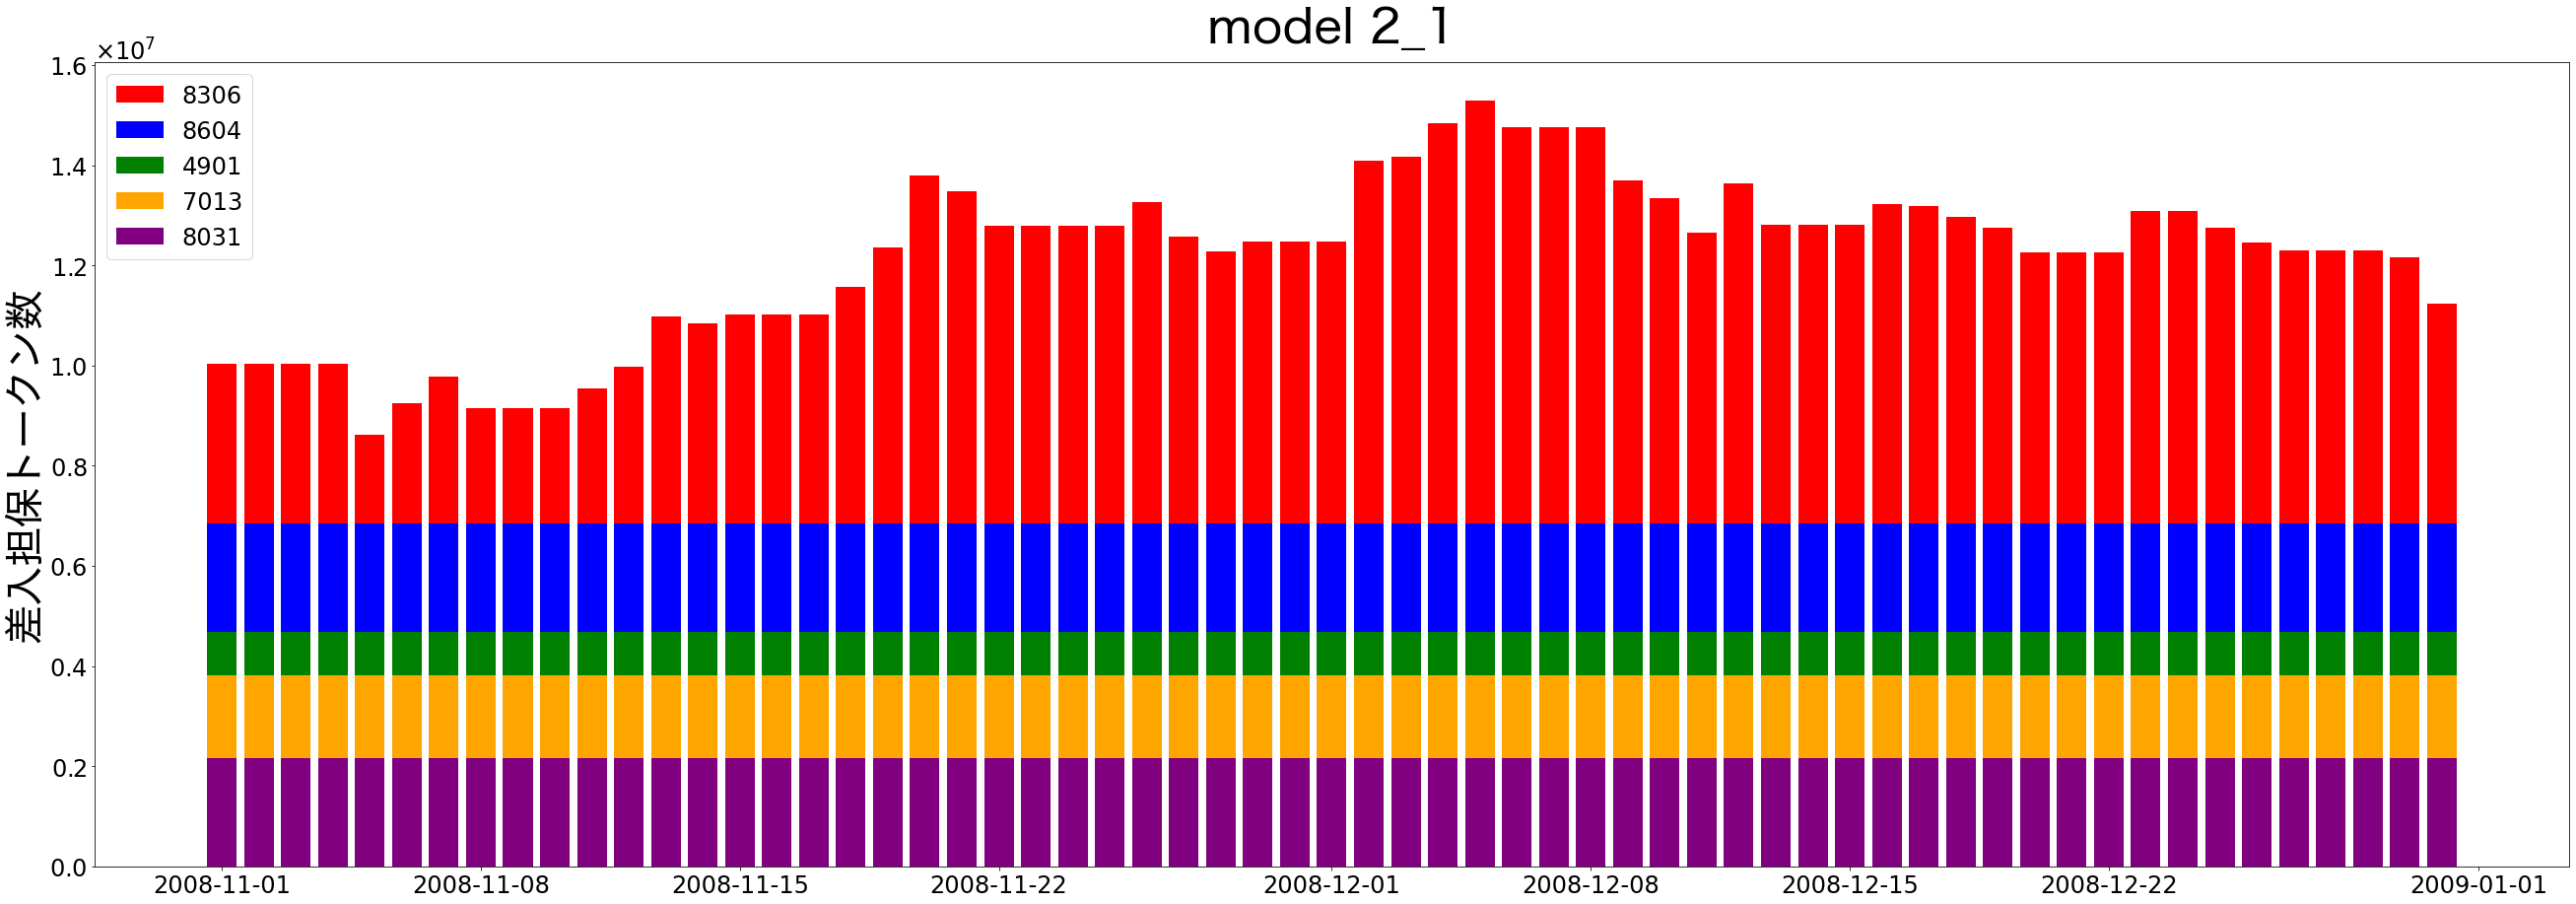

In [28]:
saved_logs_s4_m2_1 = np.load('./data0322/s4_m2_1.npy', allow_pickle=True).item()
visualizer_s4_m2_1 = LogVisualizer(saved_logs_s4_m2_1)
visualizer_s4_m2_1.bar_collateral_price_diff(title='model 2_1', is_decimal=True)
visualizer_s4_m2_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_1')
result_s4_m2_1 = visualizer_s4_m2_1.calc_price_diff_result()
diff_result_s4_m2_1 = visualizer_s4_m2_1.calc_token_diff()
diff_result_s4_m2_1
visualizer_s4_m2_1.calc_portfolio_credit_diff()

# saved_logs_s4_m2_1['lender_additional_issue'].count(True)
# saved_logs_s4_m2_1['has_done_margincall'].count(True)

#### model2-2

Log Visualizer initialized.


(212338493.96721312, 980755950.0)

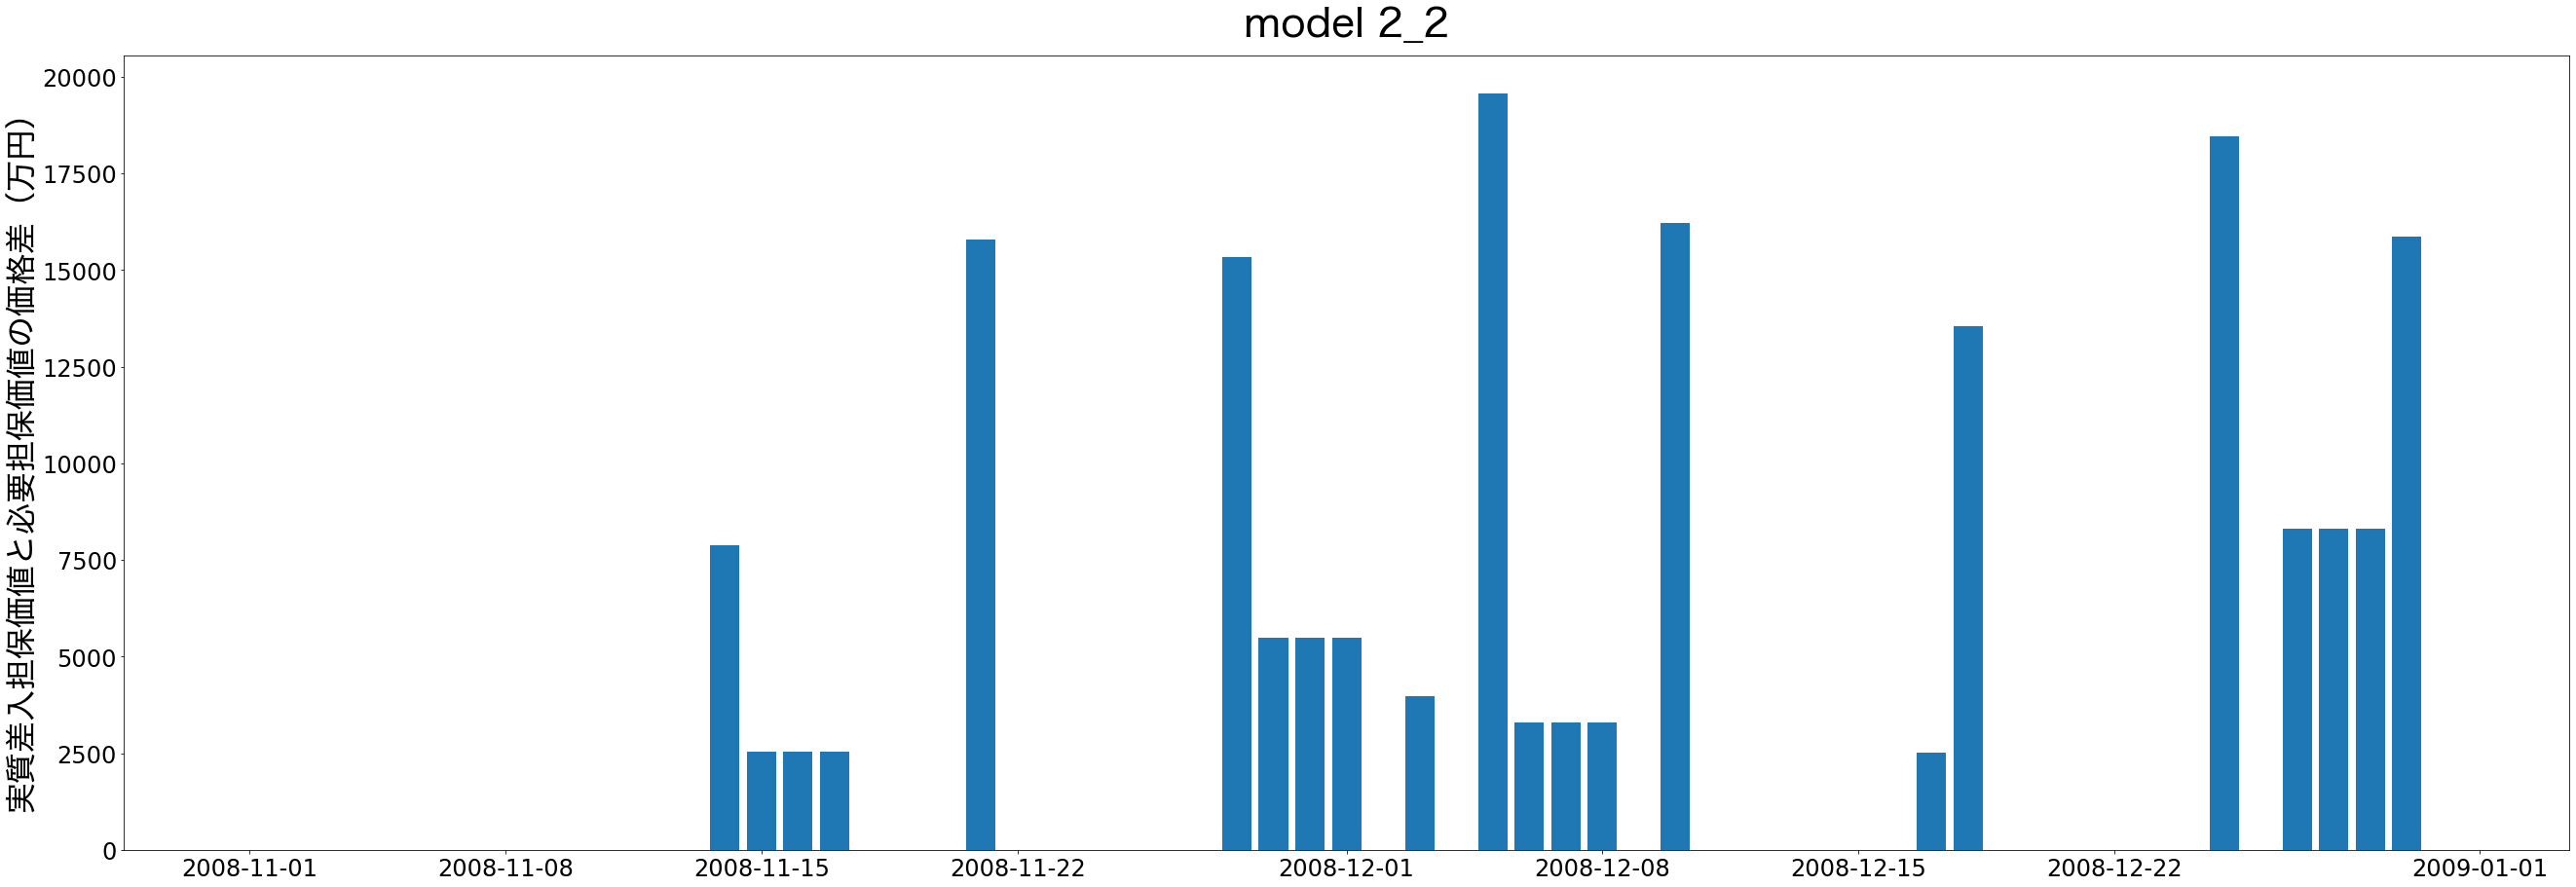

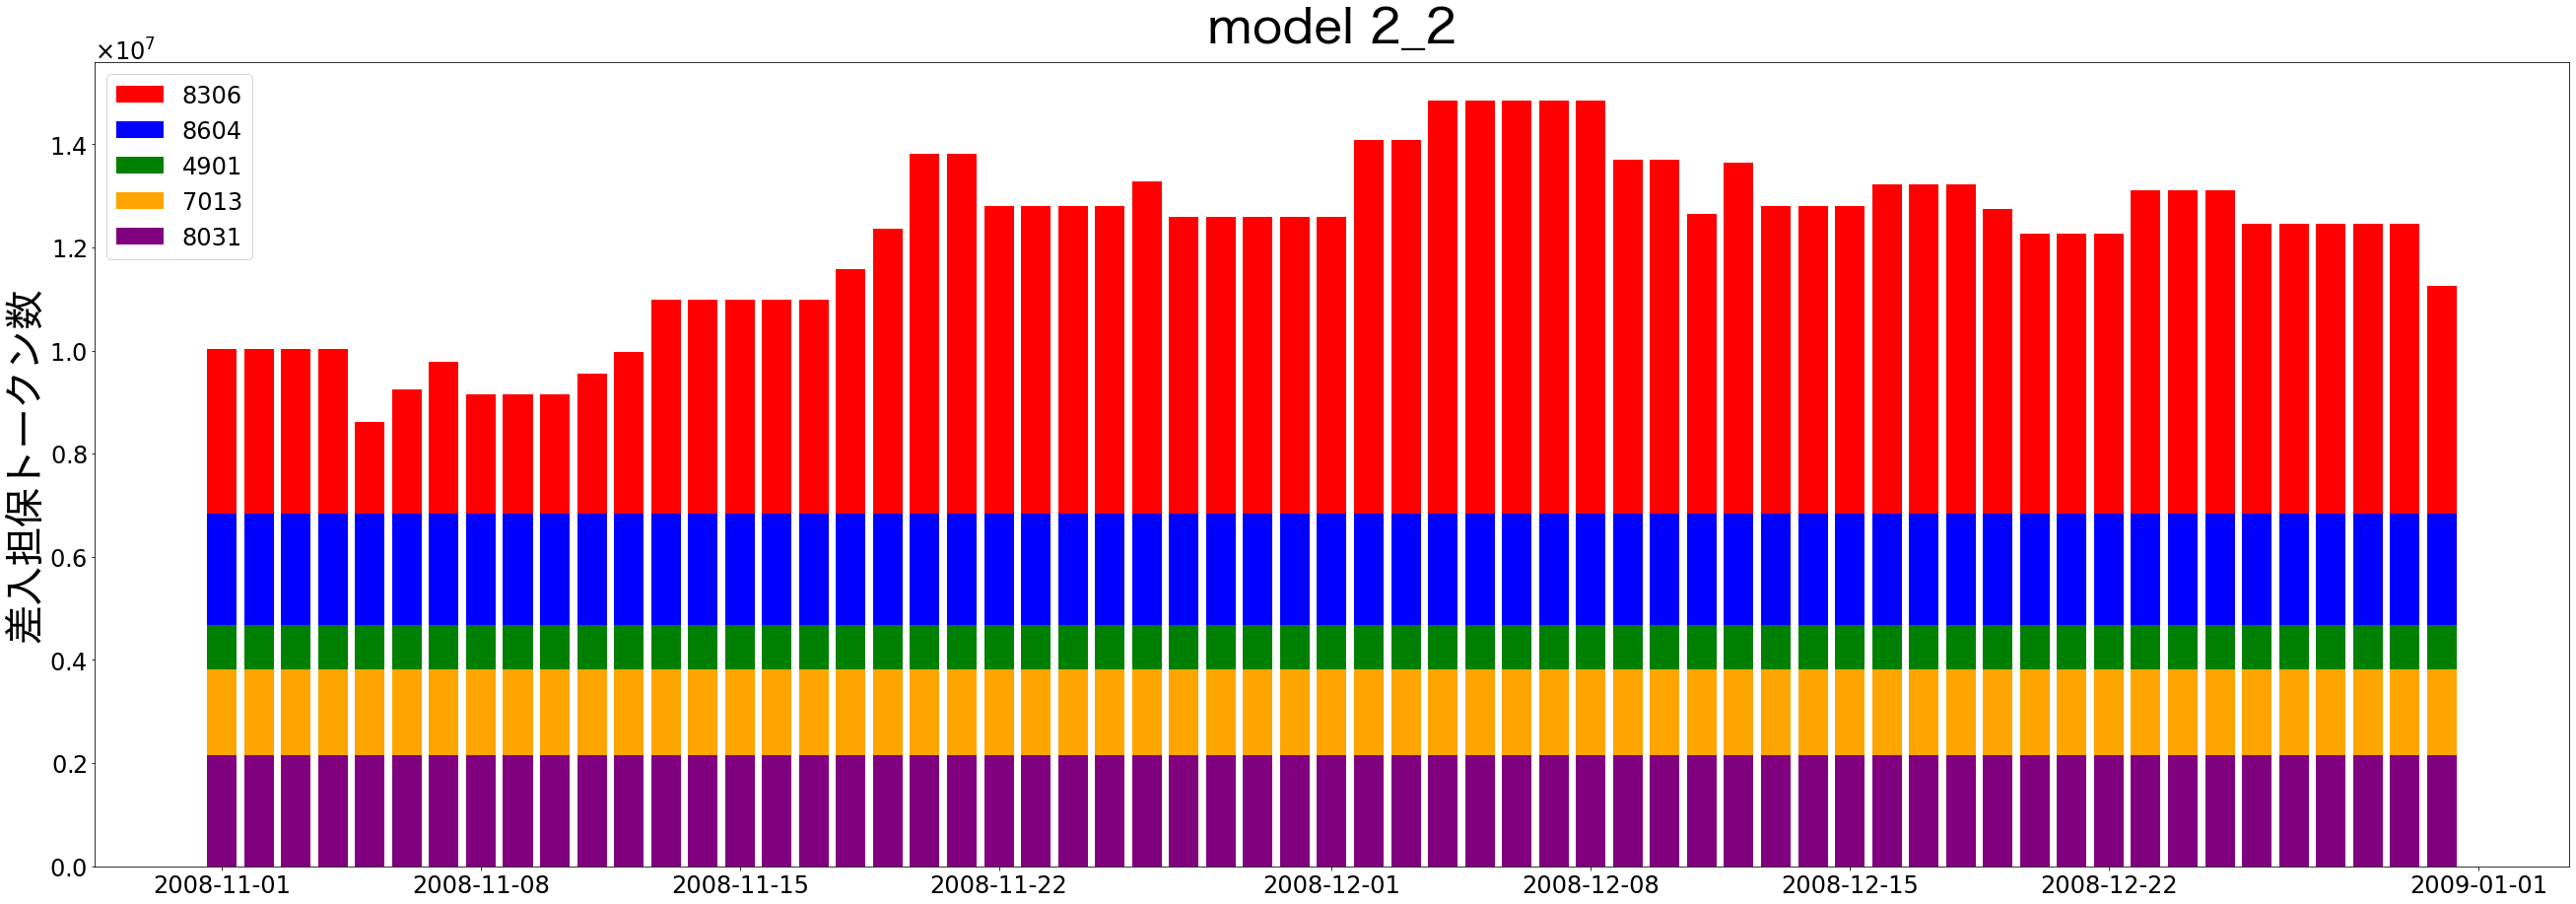

In [29]:
saved_logs_s4_m2_2 = np.load('./data0322/s4_m2_2.npy', allow_pickle=True).item()
visualizer_s4_m2_2 = LogVisualizer(saved_logs_s4_m2_2)
visualizer_s4_m2_2.bar_collateral_price_diff(title='model 2_2', is_decimal=True)
visualizer_s4_m2_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 2_2')
result_s4_m2_2 = visualizer_s4_m2_2.calc_price_diff_result()
diff_result_s4_m2_2 = visualizer_s4_m2_2.calc_token_diff()
diff_result_s4_m2_2
visualizer_s4_m2_2.calc_portfolio_credit_diff()

# saved_logs_s4_m2_2['lender_additional_issue'].count(True)
# saved_logs_s4_m2_2['has_done_margincall'].count(True)

#### model3-1

Log Visualizer initialized.


(193826954.45901638, 980758000.0)

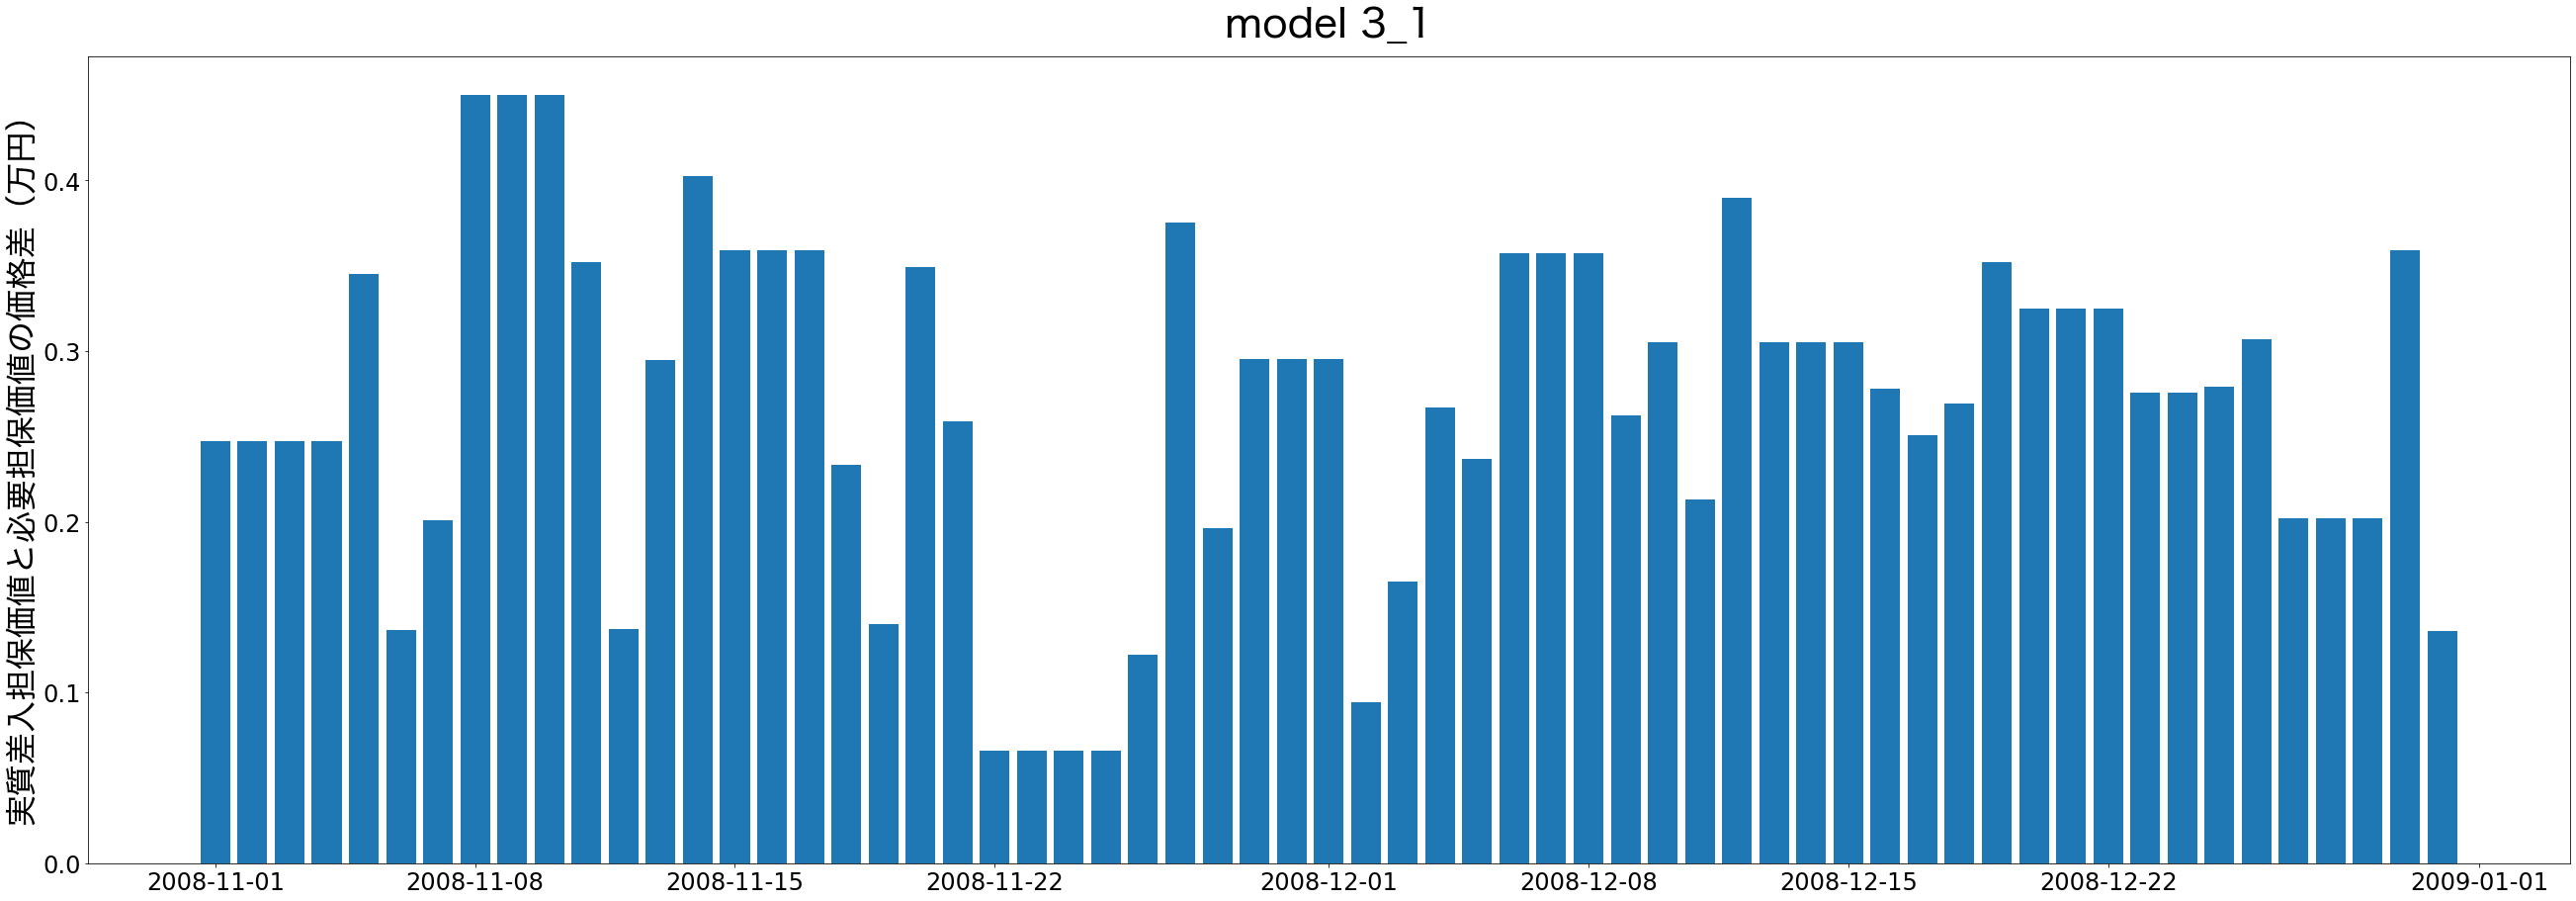

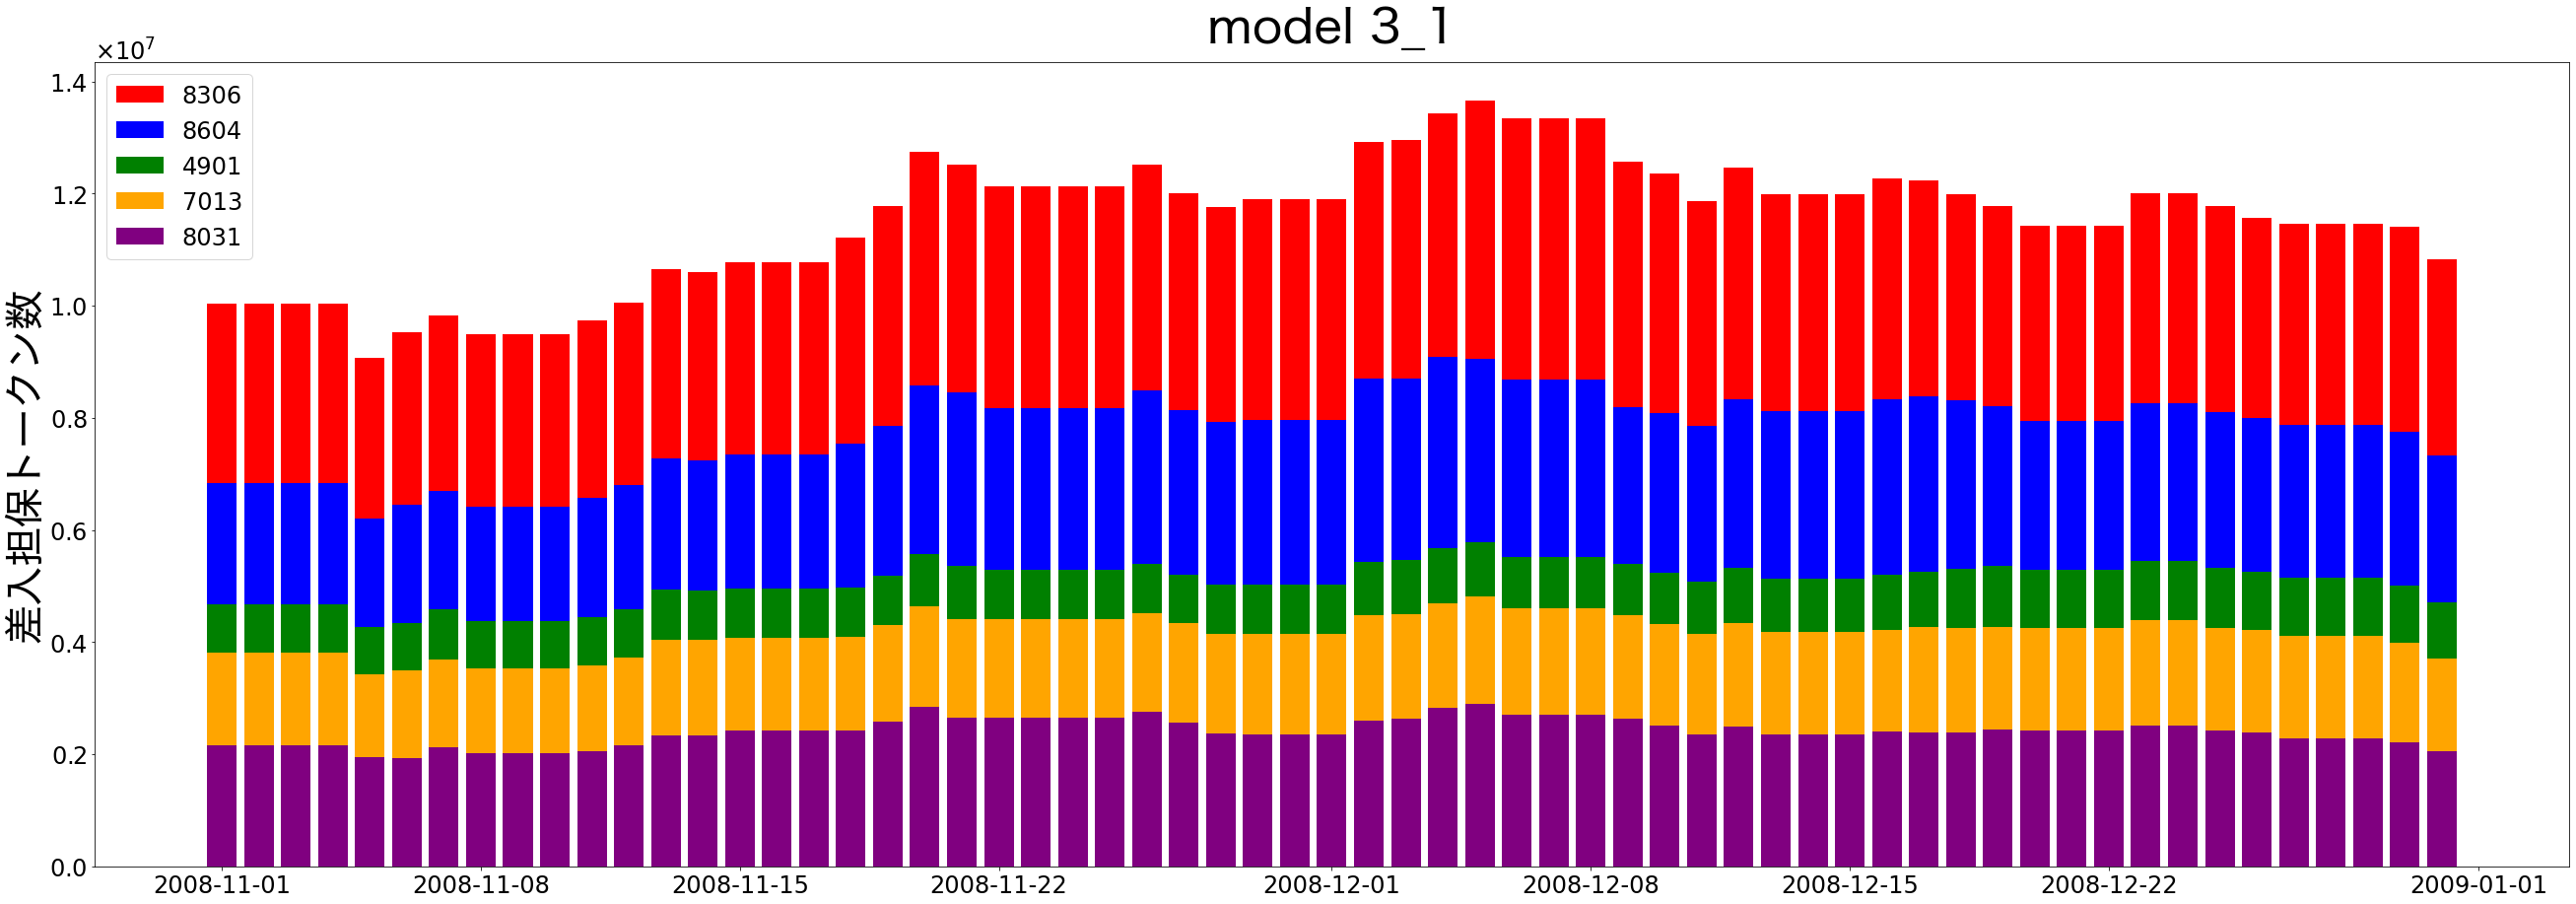

In [30]:
saved_logs_s4_m3_1 = np.load('./data0322/s4_m3_1.npy', allow_pickle=True).item()
visualizer_s4_m3_1 = LogVisualizer(saved_logs_s4_m3_1)
visualizer_s4_m3_1.bar_collateral_price_diff(title='model 3_1', is_decimal=True)
visualizer_s4_m3_1.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_1')
result_s4_m3_1 = visualizer_s4_m3_1.calc_price_diff_result()
diff_result_s4_m3_1 = visualizer_s4_m3_1.calc_token_diff()
diff_result_s4_m3_1
visualizer_s4_m3_1.calc_portfolio_credit_diff()

# saved_logs_s4_m3_1['lender_additional_issue'].count(True)
# saved_logs_s4_m3_1['has_done_margincall'].count(True)

#### model3-2

Log Visualizer initialized.


(211669992.26229507, 980758000.0)

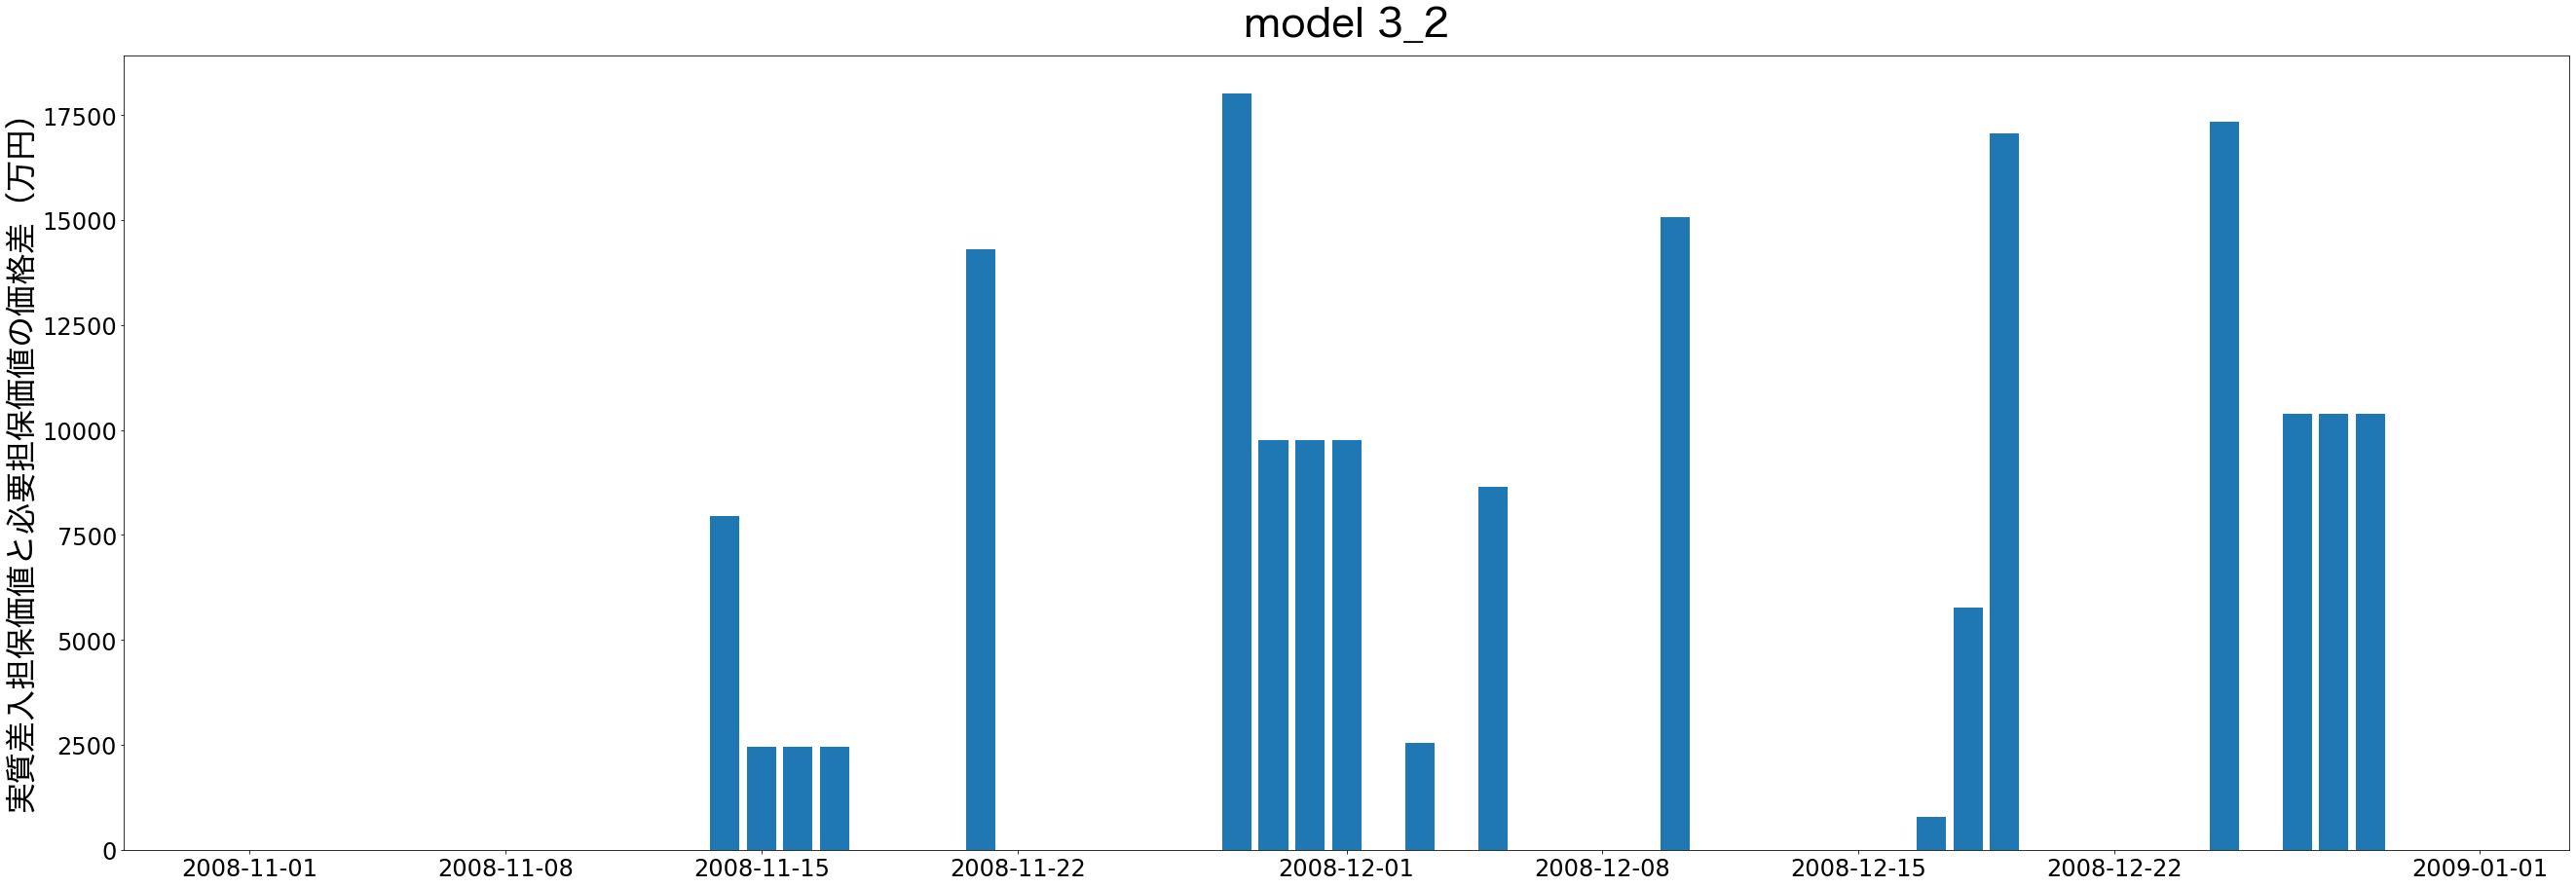

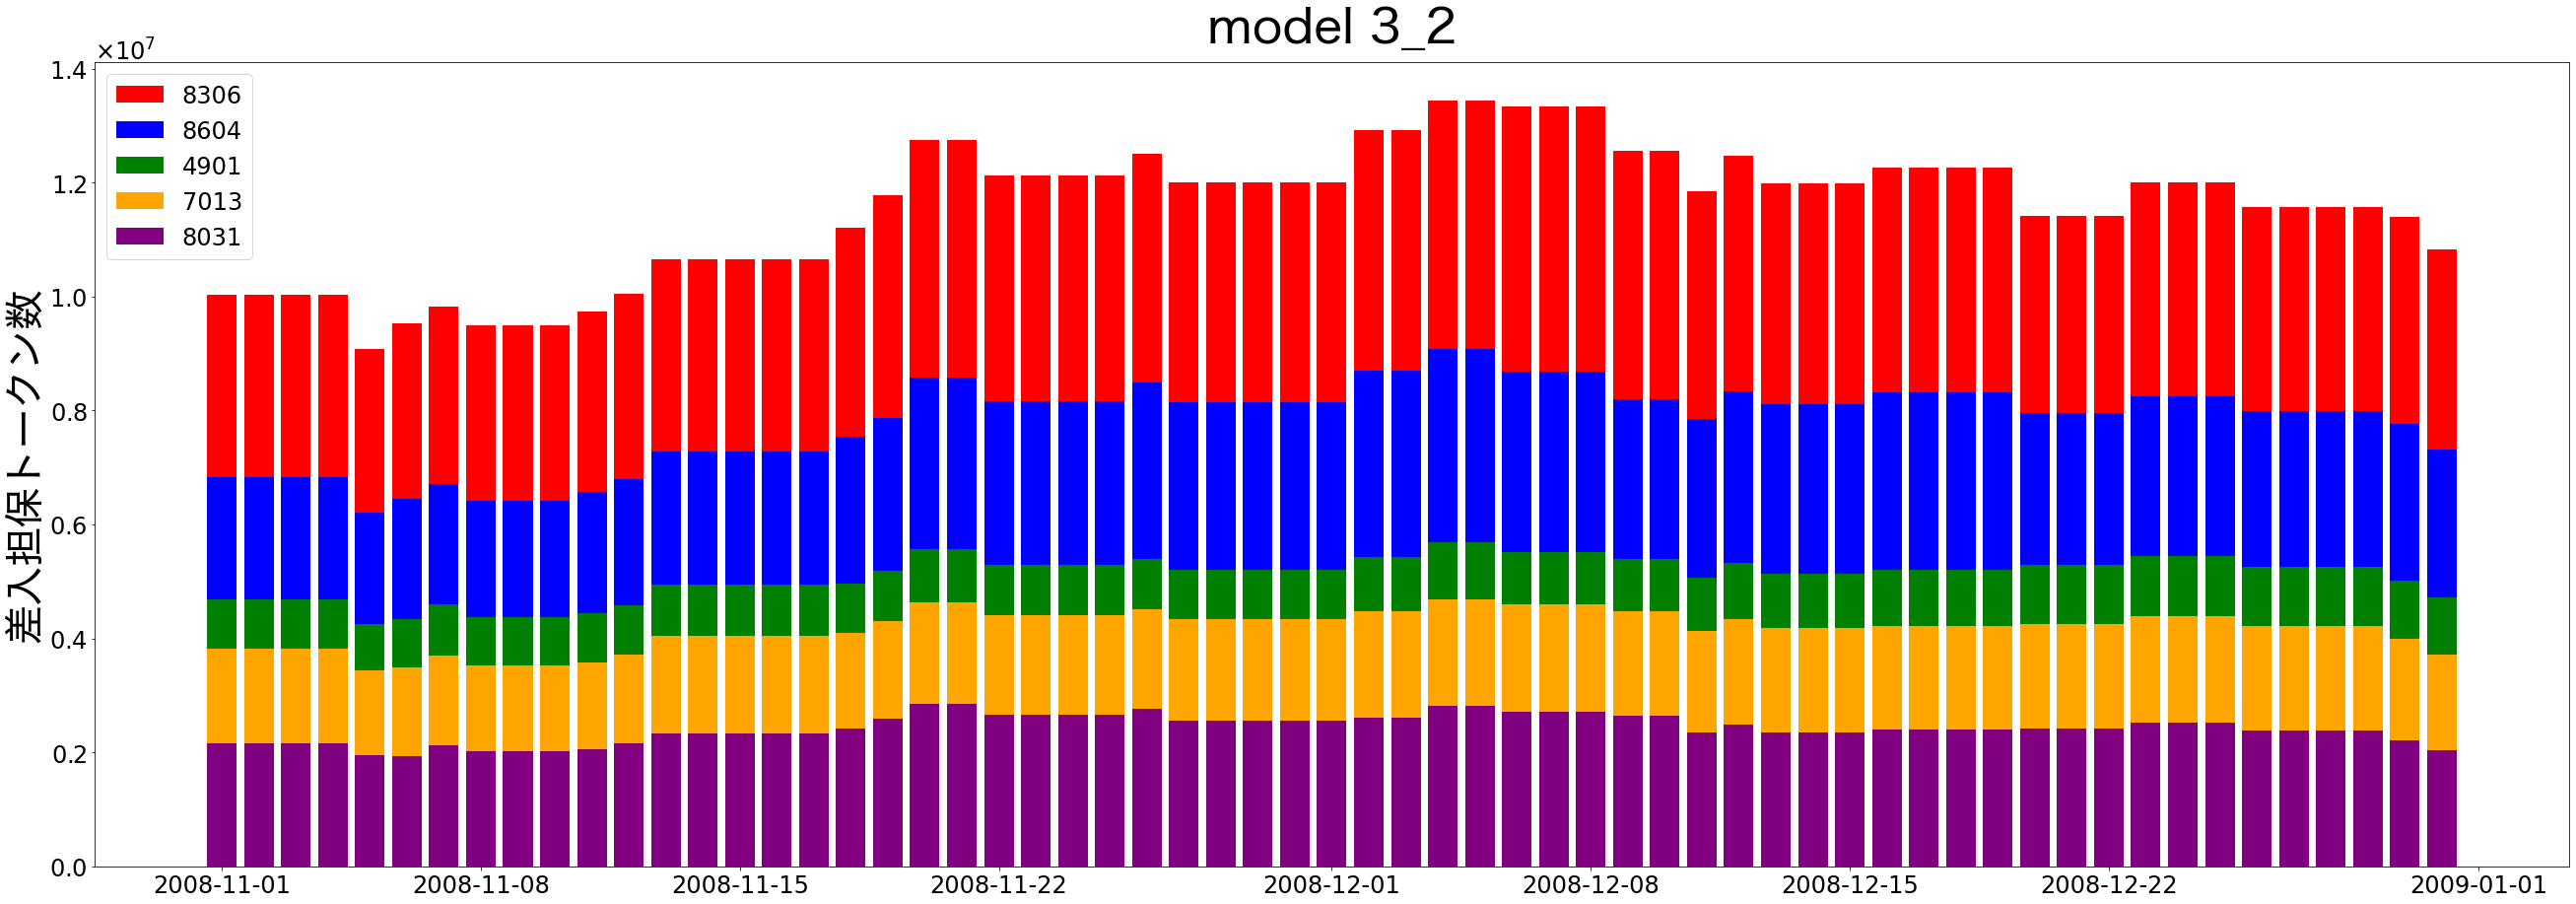

In [31]:
saved_logs_s4_m3_2 = np.load('./data0322/s4_m3_2.npy', allow_pickle=True).item()
visualizer_s4_m3_2 = LogVisualizer(saved_logs_s4_m3_2)
visualizer_s4_m3_2.bar_collateral_price_diff(title='model 3_2', is_decimal=True)
visualizer_s4_m3_2.bar_collateral_num(ymin=0, ymax=7.0e+6, title='model 3_2')
result_s4_m3_2 = visualizer_s4_m3_2.calc_price_diff_result()
diff_result_s4_m3_2 = visualizer_s4_m3_2.calc_token_diff()
diff_result_s4_m3_2
visualizer_s4_m3_2.calc_portfolio_credit_diff()

# saved_logs_s4_m3_2['lender_additional_issue'].count(True)
# saved_logs_s4_m3_2['has_done_margincall'].count(True)

#### 価格変動リスクケース間比較

In [48]:
price_diff_log_lists_s4 = {
    'モデル0: 現行手続き': result_s4_m0['raw_data'],
    'モデル1: 単一トークン調整, マージンコール閾値β=0': result_s4_m1['raw_data'],
    'モデル2: 複数トークン調整, マージンコール閾値β=0': result_s4_m2['raw_data'],
    'モデル3: 単一トークン調整, マージンコール閾値β=0.02': result_s4_m3['raw_data'],
    'モデル4: 複数トークン調整, マージンコール閾値β=0.02': result_s4_m4['raw_data'],
}

date_list_s4 = saved_logs_s4_m0['date']

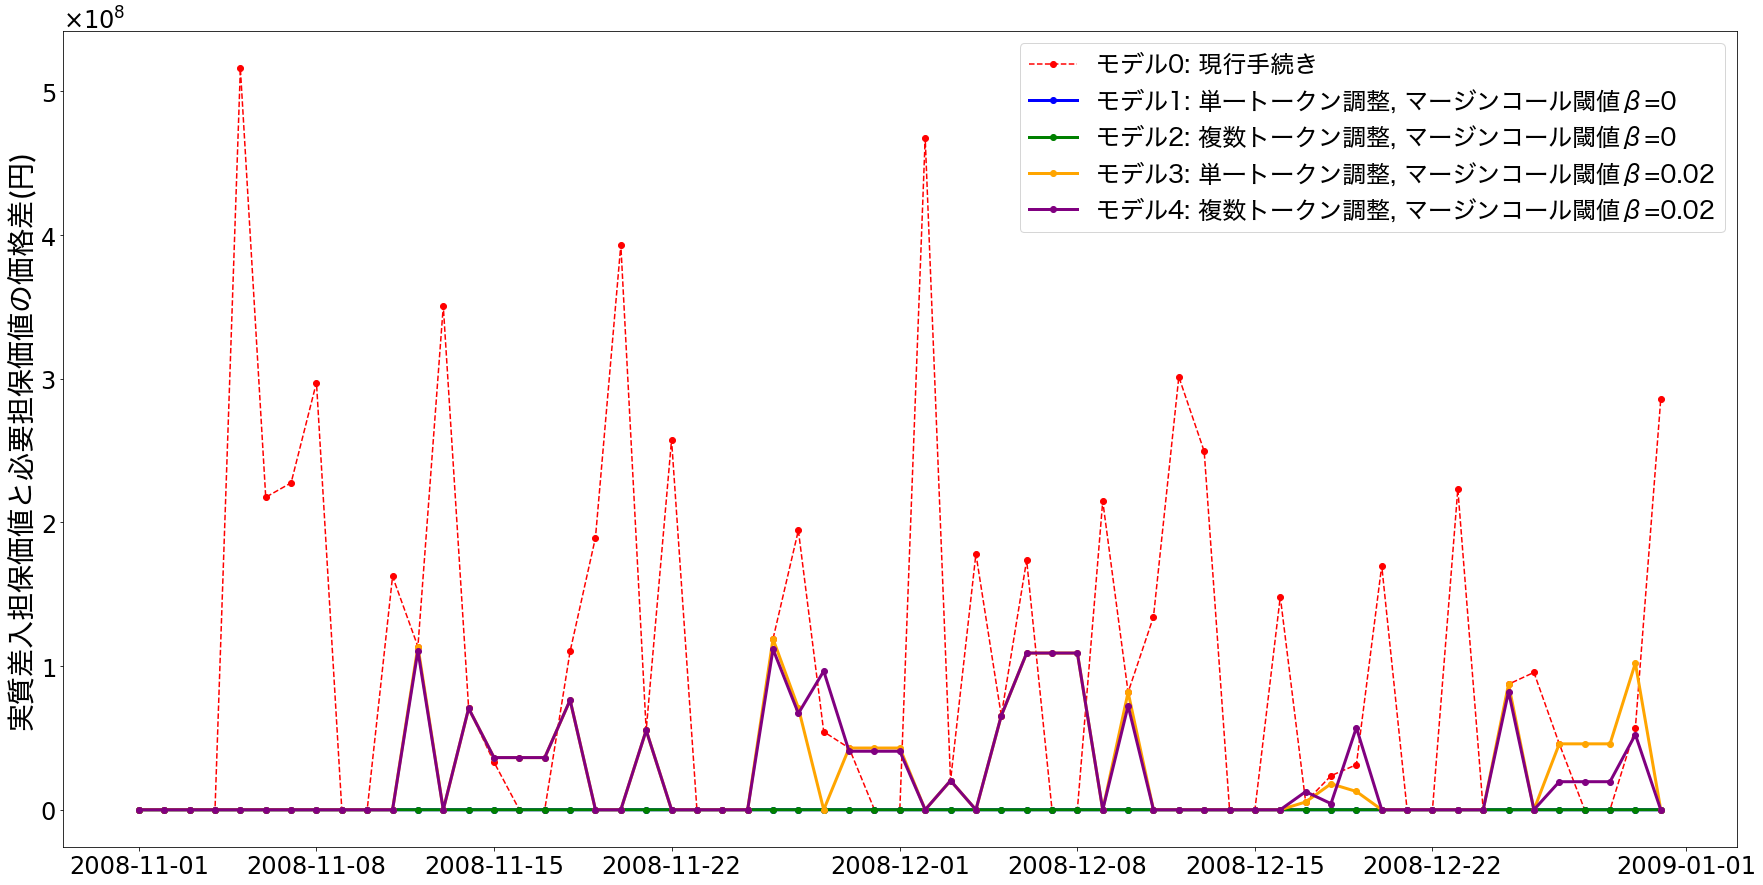

In [49]:
plt_all_price_diff(date_list_s4, price_diff_log_lists_s4, 's4')